In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime 
import json
import statistics

In [2]:
file = 'Resources/kc_house_data.csv'
df=pd.read_csv(file)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')
df.sort_values('date')



id        date      price  bedrooms  bathrooms  sqft_living  \
16768  5561000190  2014-05-02   437500.0         3       2.25         1970   
9596    472000620  2014-05-02   790000.0         3       2.50         2600   
9587   1024069009  2014-05-02   675000.0         5       2.50         2820   
20602  7853361370  2014-05-02   555000.0         4       2.50         3310   
11577  5056500260  2014-05-02   440000.0         4       2.25         2160   
...           ...         ...        ...       ...        ...          ...   
7898   1422700040  2015-05-14   183000.0         3       1.00         1170   
928    8730000270  2015-05-14   359000.0         2       2.75         1370   
5637   7923600250  2015-05-15   450000.0         5       2.00         1870   
13053  5101400871  2015-05-24   445500.0         2       1.75         1390   
16594  9106000005  2015-05-27  1310000.0         4       2.25         3750   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16768     35100     2.0           0     0  ...      9        1970   
9596       4750     1.0           0     0  ...      9        1700   
9587      67518     2.0           0     0  ...      8        2820   
20602      6500     2.0           0     0  ...      8        3310   
11577      8119     1.0           0     0  ...      8        1080   
...         ...     ...         ...   ...  ...    ...         ...   
7898       7320     1.0           0     0  ...      7        1170   
928        1140     2.0           0     0  ...      8        1080   
5637       7344     1.5           0     0  ...      7        1870   
13053      6670     1.0           0     0  ...      6         720   
16594      5000     2.0           0     0  ...      8        2440   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
16768              0      1977             0    98027  47.4635 -121.991   
9596             900      1951             0    98117  47.6833 -122.400   
9587               0      1979             0    98029  47.5794 -122.025   
20602              0      2012             0    98065  47.5150 -121.870   
11577           1080      1966             0    98006  47.5443 -122.177   
...              ...       ...           ...      ...      ...      ...   
7898               0      1962             0    98188  47.4685 -122.282   
928              290      2009             0    98133  47.7052 -122.343   
5637               0      1960             0    98007  47.5951 -122.144   
13053            670      1941             0    98115  47.6914 -122.308   
16594           1310      1924             0    98115  47.6747 -122.303   

       sqft_living15  sqft_lot15  
16768           2340       35100  
9596            2380        4750  
9587            2820       48351  
20602           2380        5000  
11577           1850        9000  
...              ...         ...  
7898            2040        7320  
928             1370        1090  
5637            1870        7650  
13053            920        6380  
16594           2170        4590  

[21613 rows x 21 columns]

In [4]:
dateym=[]
num = 0
for index, row in df.iterrows():
    print("working on "+ str(num))
    mdate = df['date'][num][0:7]
    dateym.append(mdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 556
working on 557
working on 558
working on 559
working on 560
working on 561
working on 562
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 570
working on 571
working on 572
working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on

working on 1274
working on 1275
working on 1276
working on 1277
working on 1278
working on 1279
working on 1280
working on 1281
working on 1282
working on 1283
working on 1284
working on 1285
working on 1286
working on 1287
working on 1288
working on 1289
working on 1290
working on 1291
working on 1292
working on 1293
working on 1294
working on 1295
working on 1296
working on 1297
working on 1298
working on 1299
working on 1300
working on 1301
working on 1302
working on 1303
working on 1304
working on 1305
working on 1306
working on 1307
working on 1308
working on 1309
working on 1310
working on 1311
working on 1312
working on 1313
working on 1314
working on 1315
working on 1316
working on 1317
working on 1318
working on 1319
working on 1320
working on 1321
working on 1322
working on 1323
working on 1324
working on 1325
working on 1326
working on 1327
working on 1328
working on 1329
working on 1330
working on 1331
working on 1332
working on 1333
working on 1334
working on 1335
working 

working on 1901
working on 1902
working on 1903
working on 1904
working on 1905
working on 1906
working on 1907
working on 1908
working on 1909
working on 1910
working on 1911
working on 1912
working on 1913
working on 1914
working on 1915
working on 1916
working on 1917
working on 1918
working on 1919
working on 1920
working on 1921
working on 1922
working on 1923
working on 1924
working on 1925
working on 1926
working on 1927
working on 1928
working on 1929
working on 1930
working on 1931
working on 1932
working on 1933
working on 1934
working on 1935
working on 1936
working on 1937
working on 1938
working on 1939
working on 1940
working on 1941
working on 1942
working on 1943
working on 1944
working on 1945
working on 1946
working on 1947
working on 1948
working on 1949
working on 1950
working on 1951
working on 1952
working on 1953
working on 1954
working on 1955
working on 1956
working on 1957
working on 1958
working on 1959
working on 1960
working on 1961
working on 1962
working 

working on 2553
working on 2554
working on 2555
working on 2556
working on 2557
working on 2558
working on 2559
working on 2560
working on 2561
working on 2562
working on 2563
working on 2564
working on 2565
working on 2566
working on 2567
working on 2568
working on 2569
working on 2570
working on 2571
working on 2572
working on 2573
working on 2574
working on 2575
working on 2576
working on 2577
working on 2578
working on 2579
working on 2580
working on 2581
working on 2582
working on 2583
working on 2584
working on 2585
working on 2586
working on 2587
working on 2588
working on 2589
working on 2590
working on 2591
working on 2592
working on 2593
working on 2594
working on 2595
working on 2596
working on 2597
working on 2598
working on 2599
working on 2600
working on 2601
working on 2602
working on 2603
working on 2604
working on 2605
working on 2606
working on 2607
working on 2608
working on 2609
working on 2610
working on 2611
working on 2612
working on 2613
working on 2614
working 

working on 3331
working on 3332
working on 3333
working on 3334
working on 3335
working on 3336
working on 3337
working on 3338
working on 3339
working on 3340
working on 3341
working on 3342
working on 3343
working on 3344
working on 3345
working on 3346
working on 3347
working on 3348
working on 3349
working on 3350
working on 3351
working on 3352
working on 3353
working on 3354
working on 3355
working on 3356
working on 3357
working on 3358
working on 3359
working on 3360
working on 3361
working on 3362
working on 3363
working on 3364
working on 3365
working on 3366
working on 3367
working on 3368
working on 3369
working on 3370
working on 3371
working on 3372
working on 3373
working on 3374
working on 3375
working on 3376
working on 3377
working on 3378
working on 3379
working on 3380
working on 3381
working on 3382
working on 3383
working on 3384
working on 3385
working on 3386
working on 3387
working on 3388
working on 3389
working on 3390
working on 3391
working on 3392
working 

working on 4064
working on 4065
working on 4066
working on 4067
working on 4068
working on 4069
working on 4070
working on 4071
working on 4072
working on 4073
working on 4074
working on 4075
working on 4076
working on 4077
working on 4078
working on 4079
working on 4080
working on 4081
working on 4082
working on 4083
working on 4084
working on 4085
working on 4086
working on 4087
working on 4088
working on 4089
working on 4090
working on 4091
working on 4092
working on 4093
working on 4094
working on 4095
working on 4096
working on 4097
working on 4098
working on 4099
working on 4100
working on 4101
working on 4102
working on 4103
working on 4104
working on 4105
working on 4106
working on 4107
working on 4108
working on 4109
working on 4110
working on 4111
working on 4112
working on 4113
working on 4114
working on 4115
working on 4116
working on 4117
working on 4118
working on 4119
working on 4120
working on 4121
working on 4122
working on 4123
working on 4124
working on 4125
working 

working on 4594
working on 4595
working on 4596
working on 4597
working on 4598
working on 4599
working on 4600
working on 4601
working on 4602
working on 4603
working on 4604
working on 4605
working on 4606
working on 4607
working on 4608
working on 4609
working on 4610
working on 4611
working on 4612
working on 4613
working on 4614
working on 4615
working on 4616
working on 4617
working on 4618
working on 4619
working on 4620
working on 4621
working on 4622
working on 4623
working on 4624
working on 4625
working on 4626
working on 4627
working on 4628
working on 4629
working on 4630
working on 4631
working on 4632
working on 4633
working on 4634
working on 4635
working on 4636
working on 4637
working on 4638
working on 4639
working on 4640
working on 4641
working on 4642
working on 4643
working on 4644
working on 4645
working on 4646
working on 4647
working on 4648
working on 4649
working on 4650
working on 4651
working on 4652
working on 4653
working on 4654
working on 4655
working 

working on 5424
working on 5425
working on 5426
working on 5427
working on 5428
working on 5429
working on 5430
working on 5431
working on 5432
working on 5433
working on 5434
working on 5435
working on 5436
working on 5437
working on 5438
working on 5439
working on 5440
working on 5441
working on 5442
working on 5443
working on 5444
working on 5445
working on 5446
working on 5447
working on 5448
working on 5449
working on 5450
working on 5451
working on 5452
working on 5453
working on 5454
working on 5455
working on 5456
working on 5457
working on 5458
working on 5459
working on 5460
working on 5461
working on 5462
working on 5463
working on 5464
working on 5465
working on 5466
working on 5467
working on 5468
working on 5469
working on 5470
working on 5471
working on 5472
working on 5473
working on 5474
working on 5475
working on 5476
working on 5477
working on 5478
working on 5479
working on 5480
working on 5481
working on 5482
working on 5483
working on 5484
working on 5485
working 

working on 6086
working on 6087
working on 6088
working on 6089
working on 6090
working on 6091
working on 6092
working on 6093
working on 6094
working on 6095
working on 6096
working on 6097
working on 6098
working on 6099
working on 6100
working on 6101
working on 6102
working on 6103
working on 6104
working on 6105
working on 6106
working on 6107
working on 6108
working on 6109
working on 6110
working on 6111
working on 6112
working on 6113
working on 6114
working on 6115
working on 6116
working on 6117
working on 6118
working on 6119
working on 6120
working on 6121
working on 6122
working on 6123
working on 6124
working on 6125
working on 6126
working on 6127
working on 6128
working on 6129
working on 6130
working on 6131
working on 6132
working on 6133
working on 6134
working on 6135
working on 6136
working on 6137
working on 6138
working on 6139
working on 6140
working on 6141
working on 6142
working on 6143
working on 6144
working on 6145
working on 6146
working on 6147
working 

working on 6805
working on 6806
working on 6807
working on 6808
working on 6809
working on 6810
working on 6811
working on 6812
working on 6813
working on 6814
working on 6815
working on 6816
working on 6817
working on 6818
working on 6819
working on 6820
working on 6821
working on 6822
working on 6823
working on 6824
working on 6825
working on 6826
working on 6827
working on 6828
working on 6829
working on 6830
working on 6831
working on 6832
working on 6833
working on 6834
working on 6835
working on 6836
working on 6837
working on 6838
working on 6839
working on 6840
working on 6841
working on 6842
working on 6843
working on 6844
working on 6845
working on 6846
working on 6847
working on 6848
working on 6849
working on 6850
working on 6851
working on 6852
working on 6853
working on 6854
working on 6855
working on 6856
working on 6857
working on 6858
working on 6859
working on 6860
working on 6861
working on 6862
working on 6863
working on 6864
working on 6865
working on 6866
working 

working on 7551
working on 7552
working on 7553
working on 7554
working on 7555
working on 7556
working on 7557
working on 7558
working on 7559
working on 7560
working on 7561
working on 7562
working on 7563
working on 7564
working on 7565
working on 7566
working on 7567
working on 7568
working on 7569
working on 7570
working on 7571
working on 7572
working on 7573
working on 7574
working on 7575
working on 7576
working on 7577
working on 7578
working on 7579
working on 7580
working on 7581
working on 7582
working on 7583
working on 7584
working on 7585
working on 7586
working on 7587
working on 7588
working on 7589
working on 7590
working on 7591
working on 7592
working on 7593
working on 7594
working on 7595
working on 7596
working on 7597
working on 7598
working on 7599
working on 7600
working on 7601
working on 7602
working on 7603
working on 7604
working on 7605
working on 7606
working on 7607
working on 7608
working on 7609
working on 7610
working on 7611
working on 7612
working 

working on 8213
working on 8214
working on 8215
working on 8216
working on 8217
working on 8218
working on 8219
working on 8220
working on 8221
working on 8222
working on 8223
working on 8224
working on 8225
working on 8226
working on 8227
working on 8228
working on 8229
working on 8230
working on 8231
working on 8232
working on 8233
working on 8234
working on 8235
working on 8236
working on 8237
working on 8238
working on 8239
working on 8240
working on 8241
working on 8242
working on 8243
working on 8244
working on 8245
working on 8246
working on 8247
working on 8248
working on 8249
working on 8250
working on 8251
working on 8252
working on 8253
working on 8254
working on 8255
working on 8256
working on 8257
working on 8258
working on 8259
working on 8260
working on 8261
working on 8262
working on 8263
working on 8264
working on 8265
working on 8266
working on 8267
working on 8268
working on 8269
working on 8270
working on 8271
working on 8272
working on 8273
working on 8274
working 

working on 8911
working on 8912
working on 8913
working on 8914
working on 8915
working on 8916
working on 8917
working on 8918
working on 8919
working on 8920
working on 8921
working on 8922
working on 8923
working on 8924
working on 8925
working on 8926
working on 8927
working on 8928
working on 8929
working on 8930
working on 8931
working on 8932
working on 8933
working on 8934
working on 8935
working on 8936
working on 8937
working on 8938
working on 8939
working on 8940
working on 8941
working on 8942
working on 8943
working on 8944
working on 8945
working on 8946
working on 8947
working on 8948
working on 8949
working on 8950
working on 8951
working on 8952
working on 8953
working on 8954
working on 8955
working on 8956
working on 8957
working on 8958
working on 8959
working on 8960
working on 8961
working on 8962
working on 8963
working on 8964
working on 8965
working on 8966
working on 8967
working on 8968
working on 8969
working on 8970
working on 8971
working on 8972
working 

working on 9610
working on 9611
working on 9612
working on 9613
working on 9614
working on 9615
working on 9616
working on 9617
working on 9618
working on 9619
working on 9620
working on 9621
working on 9622
working on 9623
working on 9624
working on 9625
working on 9626
working on 9627
working on 9628
working on 9629
working on 9630
working on 9631
working on 9632
working on 9633
working on 9634
working on 9635
working on 9636
working on 9637
working on 9638
working on 9639
working on 9640
working on 9641
working on 9642
working on 9643
working on 9644
working on 9645
working on 9646
working on 9647
working on 9648
working on 9649
working on 9650
working on 9651
working on 9652
working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working on 9661
working on 9662
working on 9663
working on 9664
working on 9665
working on 9666
working on 9667
working on 9668
working on 9669
working on 9670
working on 9671
working 

working on 10147
working on 10148
working on 10149
working on 10150
working on 10151
working on 10152
working on 10153
working on 10154
working on 10155
working on 10156
working on 10157
working on 10158
working on 10159
working on 10160
working on 10161
working on 10162
working on 10163
working on 10164
working on 10165
working on 10166
working on 10167
working on 10168
working on 10169
working on 10170
working on 10171
working on 10172
working on 10173
working on 10174
working on 10175
working on 10176
working on 10177
working on 10178
working on 10179
working on 10180
working on 10181
working on 10182
working on 10183
working on 10184
working on 10185
working on 10186
working on 10187
working on 10188
working on 10189
working on 10190
working on 10191
working on 10192
working on 10193
working on 10194
working on 10195
working on 10196
working on 10197
working on 10198
working on 10199
working on 10200
working on 10201
working on 10202
working on 10203
working on 10204
working on 102

working on 10904
working on 10905
working on 10906
working on 10907
working on 10908
working on 10909
working on 10910
working on 10911
working on 10912
working on 10913
working on 10914
working on 10915
working on 10916
working on 10917
working on 10918
working on 10919
working on 10920
working on 10921
working on 10922
working on 10923
working on 10924
working on 10925
working on 10926
working on 10927
working on 10928
working on 10929
working on 10930
working on 10931
working on 10932
working on 10933
working on 10934
working on 10935
working on 10936
working on 10937
working on 10938
working on 10939
working on 10940
working on 10941
working on 10942
working on 10943
working on 10944
working on 10945
working on 10946
working on 10947
working on 10948
working on 10949
working on 10950
working on 10951
working on 10952
working on 10953
working on 10954
working on 10955
working on 10956
working on 10957
working on 10958
working on 10959
working on 10960
working on 10961
working on 109

working on 11387
working on 11388
working on 11389
working on 11390
working on 11391
working on 11392
working on 11393
working on 11394
working on 11395
working on 11396
working on 11397
working on 11398
working on 11399
working on 11400
working on 11401
working on 11402
working on 11403
working on 11404
working on 11405
working on 11406
working on 11407
working on 11408
working on 11409
working on 11410
working on 11411
working on 11412
working on 11413
working on 11414
working on 11415
working on 11416
working on 11417
working on 11418
working on 11419
working on 11420
working on 11421
working on 11422
working on 11423
working on 11424
working on 11425
working on 11426
working on 11427
working on 11428
working on 11429
working on 11430
working on 11431
working on 11432
working on 11433
working on 11434
working on 11435
working on 11436
working on 11437
working on 11438
working on 11439
working on 11440
working on 11441
working on 11442
working on 11443
working on 11444
working on 114

working on 12004
working on 12005
working on 12006
working on 12007
working on 12008
working on 12009
working on 12010
working on 12011
working on 12012
working on 12013
working on 12014
working on 12015
working on 12016
working on 12017
working on 12018
working on 12019
working on 12020
working on 12021
working on 12022
working on 12023
working on 12024
working on 12025
working on 12026
working on 12027
working on 12028
working on 12029
working on 12030
working on 12031
working on 12032
working on 12033
working on 12034
working on 12035
working on 12036
working on 12037
working on 12038
working on 12039
working on 12040
working on 12041
working on 12042
working on 12043
working on 12044
working on 12045
working on 12046
working on 12047
working on 12048
working on 12049
working on 12050
working on 12051
working on 12052
working on 12053
working on 12054
working on 12055
working on 12056
working on 12057
working on 12058
working on 12059
working on 12060
working on 12061
working on 120

working on 12693
working on 12694
working on 12695
working on 12696
working on 12697
working on 12698
working on 12699
working on 12700
working on 12701
working on 12702
working on 12703
working on 12704
working on 12705
working on 12706
working on 12707
working on 12708
working on 12709
working on 12710
working on 12711
working on 12712
working on 12713
working on 12714
working on 12715
working on 12716
working on 12717
working on 12718
working on 12719
working on 12720
working on 12721
working on 12722
working on 12723
working on 12724
working on 12725
working on 12726
working on 12727
working on 12728
working on 12729
working on 12730
working on 12731
working on 12732
working on 12733
working on 12734
working on 12735
working on 12736
working on 12737
working on 12738
working on 12739
working on 12740
working on 12741
working on 12742
working on 12743
working on 12744
working on 12745
working on 12746
working on 12747
working on 12748
working on 12749
working on 12750
working on 127

working on 13487
working on 13488
working on 13489
working on 13490
working on 13491
working on 13492
working on 13493
working on 13494
working on 13495
working on 13496
working on 13497
working on 13498
working on 13499
working on 13500
working on 13501
working on 13502
working on 13503
working on 13504
working on 13505
working on 13506
working on 13507
working on 13508
working on 13509
working on 13510
working on 13511
working on 13512
working on 13513
working on 13514
working on 13515
working on 13516
working on 13517
working on 13518
working on 13519
working on 13520
working on 13521
working on 13522
working on 13523
working on 13524
working on 13525
working on 13526
working on 13527
working on 13528
working on 13529
working on 13530
working on 13531
working on 13532
working on 13533
working on 13534
working on 13535
working on 13536
working on 13537
working on 13538
working on 13539
working on 13540
working on 13541
working on 13542
working on 13543
working on 13544
working on 135

working on 14286
working on 14287
working on 14288
working on 14289
working on 14290
working on 14291
working on 14292
working on 14293
working on 14294
working on 14295
working on 14296
working on 14297
working on 14298
working on 14299
working on 14300
working on 14301
working on 14302
working on 14303
working on 14304
working on 14305
working on 14306
working on 14307
working on 14308
working on 14309
working on 14310
working on 14311
working on 14312
working on 14313
working on 14314
working on 14315
working on 14316
working on 14317
working on 14318
working on 14319
working on 14320
working on 14321
working on 14322
working on 14323
working on 14324
working on 14325
working on 14326
working on 14327
working on 14328
working on 14329
working on 14330
working on 14331
working on 14332
working on 14333
working on 14334
working on 14335
working on 14336
working on 14337
working on 14338
working on 14339
working on 14340
working on 14341
working on 14342
working on 14343
working on 143

working on 14981
working on 14982
working on 14983
working on 14984
working on 14985
working on 14986
working on 14987
working on 14988
working on 14989
working on 14990
working on 14991
working on 14992
working on 14993
working on 14994
working on 14995
working on 14996
working on 14997
working on 14998
working on 14999
working on 15000
working on 15001
working on 15002
working on 15003
working on 15004
working on 15005
working on 15006
working on 15007
working on 15008
working on 15009
working on 15010
working on 15011
working on 15012
working on 15013
working on 15014
working on 15015
working on 15016
working on 15017
working on 15018
working on 15019
working on 15020
working on 15021
working on 15022
working on 15023
working on 15024
working on 15025
working on 15026
working on 15027
working on 15028
working on 15029
working on 15030
working on 15031
working on 15032
working on 15033
working on 15034
working on 15035
working on 15036
working on 15037
working on 15038
working on 150

working on 15534
working on 15535
working on 15536
working on 15537
working on 15538
working on 15539
working on 15540
working on 15541
working on 15542
working on 15543
working on 15544
working on 15545
working on 15546
working on 15547
working on 15548
working on 15549
working on 15550
working on 15551
working on 15552
working on 15553
working on 15554
working on 15555
working on 15556
working on 15557
working on 15558
working on 15559
working on 15560
working on 15561
working on 15562
working on 15563
working on 15564
working on 15565
working on 15566
working on 15567
working on 15568
working on 15569
working on 15570
working on 15571
working on 15572
working on 15573
working on 15574
working on 15575
working on 15576
working on 15577
working on 15578
working on 15579
working on 15580
working on 15581
working on 15582
working on 15583
working on 15584
working on 15585
working on 15586
working on 15587
working on 15588
working on 15589
working on 15590
working on 15591
working on 155

working on 16340
working on 16341
working on 16342
working on 16343
working on 16344
working on 16345
working on 16346
working on 16347
working on 16348
working on 16349
working on 16350
working on 16351
working on 16352
working on 16353
working on 16354
working on 16355
working on 16356
working on 16357
working on 16358
working on 16359
working on 16360
working on 16361
working on 16362
working on 16363
working on 16364
working on 16365
working on 16366
working on 16367
working on 16368
working on 16369
working on 16370
working on 16371
working on 16372
working on 16373
working on 16374
working on 16375
working on 16376
working on 16377
working on 16378
working on 16379
working on 16380
working on 16381
working on 16382
working on 16383
working on 16384
working on 16385
working on 16386
working on 16387
working on 16388
working on 16389
working on 16390
working on 16391
working on 16392
working on 16393
working on 16394
working on 16395
working on 16396
working on 16397
working on 163

working on 17043
working on 17044
working on 17045
working on 17046
working on 17047
working on 17048
working on 17049
working on 17050
working on 17051
working on 17052
working on 17053
working on 17054
working on 17055
working on 17056
working on 17057
working on 17058
working on 17059
working on 17060
working on 17061
working on 17062
working on 17063
working on 17064
working on 17065
working on 17066
working on 17067
working on 17068
working on 17069
working on 17070
working on 17071
working on 17072
working on 17073
working on 17074
working on 17075
working on 17076
working on 17077
working on 17078
working on 17079
working on 17080
working on 17081
working on 17082
working on 17083
working on 17084
working on 17085
working on 17086
working on 17087
working on 17088
working on 17089
working on 17090
working on 17091
working on 17092
working on 17093
working on 17094
working on 17095
working on 17096
working on 17097
working on 17098
working on 17099
working on 17100
working on 171

working on 17732
working on 17733
working on 17734
working on 17735
working on 17736
working on 17737
working on 17738
working on 17739
working on 17740
working on 17741
working on 17742
working on 17743
working on 17744
working on 17745
working on 17746
working on 17747
working on 17748
working on 17749
working on 17750
working on 17751
working on 17752
working on 17753
working on 17754
working on 17755
working on 17756
working on 17757
working on 17758
working on 17759
working on 17760
working on 17761
working on 17762
working on 17763
working on 17764
working on 17765
working on 17766
working on 17767
working on 17768
working on 17769
working on 17770
working on 17771
working on 17772
working on 17773
working on 17774
working on 17775
working on 17776
working on 17777
working on 17778
working on 17779
working on 17780
working on 17781
working on 17782
working on 17783
working on 17784
working on 17785
working on 17786
working on 17787
working on 17788
working on 17789
working on 177

working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 18634
working on 18635
working on 18636
working on 18637
working on 18638
working on 18639
working on 18640
working on 18641
working on 18642
working on 18643
working on 18644
working on 18645
working on 18646
working on 18647
working on 18648
working on 18649
working on 18650
working on 18651
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 186

working on 19359
working on 19360
working on 19361
working on 19362
working on 19363
working on 19364
working on 19365
working on 19366
working on 19367
working on 19368
working on 19369
working on 19370
working on 19371
working on 19372
working on 19373
working on 19374
working on 19375
working on 19376
working on 19377
working on 19378
working on 19379
working on 19380
working on 19381
working on 19382
working on 19383
working on 19384
working on 19385
working on 19386
working on 19387
working on 19388
working on 19389
working on 19390
working on 19391
working on 19392
working on 19393
working on 19394
working on 19395
working on 19396
working on 19397
working on 19398
working on 19399
working on 19400
working on 19401
working on 19402
working on 19403
working on 19404
working on 19405
working on 19406
working on 19407
working on 19408
working on 19409
working on 19410
working on 19411
working on 19412
working on 19413
working on 19414
working on 19415
working on 19416
working on 194

working on 20090
working on 20091
working on 20092
working on 20093
working on 20094
working on 20095
working on 20096
working on 20097
working on 20098
working on 20099
working on 20100
working on 20101
working on 20102
working on 20103
working on 20104
working on 20105
working on 20106
working on 20107
working on 20108
working on 20109
working on 20110
working on 20111
working on 20112
working on 20113
working on 20114
working on 20115
working on 20116
working on 20117
working on 20118
working on 20119
working on 20120
working on 20121
working on 20122
working on 20123
working on 20124
working on 20125
working on 20126
working on 20127
working on 20128
working on 20129
working on 20130
working on 20131
working on 20132
working on 20133
working on 20134
working on 20135
working on 20136
working on 20137
working on 20138
working on 20139
working on 20140
working on 20141
working on 20142
working on 20143
working on 20144
working on 20145
working on 20146
working on 20147
working on 201

working on 20891
working on 20892
working on 20893
working on 20894
working on 20895
working on 20896
working on 20897
working on 20898
working on 20899
working on 20900
working on 20901
working on 20902
working on 20903
working on 20904
working on 20905
working on 20906
working on 20907
working on 20908
working on 20909
working on 20910
working on 20911
working on 20912
working on 20913
working on 20914
working on 20915
working on 20916
working on 20917
working on 20918
working on 20919
working on 20920
working on 20921
working on 20922
working on 20923
working on 20924
working on 20925
working on 20926
working on 20927
working on 20928
working on 20929
working on 20930
working on 20931
working on 20932
working on 20933
working on 20934
working on 20935
working on 20936
working on 20937
working on 20938
working on 20939
working on 20940
working on 20941
working on 20942
working on 20943
working on 20944
working on 20945
working on 20946
working on 20947
working on 20948
working on 209

In [5]:
df['date(Y/M)']=dateym

In [80]:
df.loc[df['bedrooms']==33]
df1=df[df.bedrooms != 33]
df1.loc[df1['sqft_lot']<1000]

id        date     price  bedrooms  bathrooms  sqft_living  \
547    7899800860  2015-03-19  259950.0         2       2.00         1070   
1206   5458300685  2014-05-20  479000.0         3       2.50         1260   
1256    993001629  2014-11-17  265000.0         3       2.75         1120   
1345   9301300751  2014-07-28  464950.0         3       1.50         1200   
1889   3319500922  2015-04-21  345000.0         2       1.50          830   
...           ...         ...       ...       ...        ...          ...   
21519  1702901618  2015-04-07  420000.0         1       2.00         1070   
21538  1865400076  2014-05-09  324000.0         3       2.25          998   
21552   688000017  2014-06-27  516500.0         1       1.25         1100   
21584   952006823  2014-12-02  380000.0         3       2.50         1260   
21595  1972201967  2014-10-31  520000.0         2       2.25         1530   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
547         649     2.0           0     0  ...            350      2008   
1206        889     3.0           0     0  ...              0      2008   
1256        881     3.0           0     0  ...              0      1999   
1345        890     2.0           0     0  ...            170      2008   
1889        920     2.0           0     0  ...              0      2005   
...         ...     ...         ...   ...  ...            ...       ...   
21519       675     2.0           0     0  ...            190      2007   
21538       904     2.0           0     0  ...            200      2007   
21552       638     3.0           0     0  ...              0      2014   
21584       900     2.0           0     0  ...            320      2007   
21595       981     3.0           0     0  ...             50      2006   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
547               0    98106  47.5213 -122.357           1070         928   
1206              0    98109  47.6277 -122.345           1340        1324   
1256              0    98103  47.6914 -122.343           1120        1087   
1345              0    98109  47.6384 -122.342           1230        2120   
1889              0    98144  47.5998 -122.306            830        1200   
...             ...      ...      ...      ...            ...         ...   
21519             0    98118  47.5574 -122.284           1220         788   
21538             0    98117  47.6983 -122.367            998        1110   
21552             0    98112  47.6228 -122.307           1110        1933   
21584             0    98116  47.5621 -122.384           1310        1415   
21595             0    98103  47.6533 -122.346           1530        1282   

       date(Y/M)  date(Y)  
547      2015-03     2015  
1206     2014-05     2014  
1256     2014-11     2014  
1345     2014-07     2014  
1889     2015-04     2015  
...          ...      ...  
21519    2015-04     2015  
21538    2014-05     2014  
21552    2014-06     2014  
21584    2014-12     2014  
21595    2014-10     2014  

[204 rows x 23 columns]

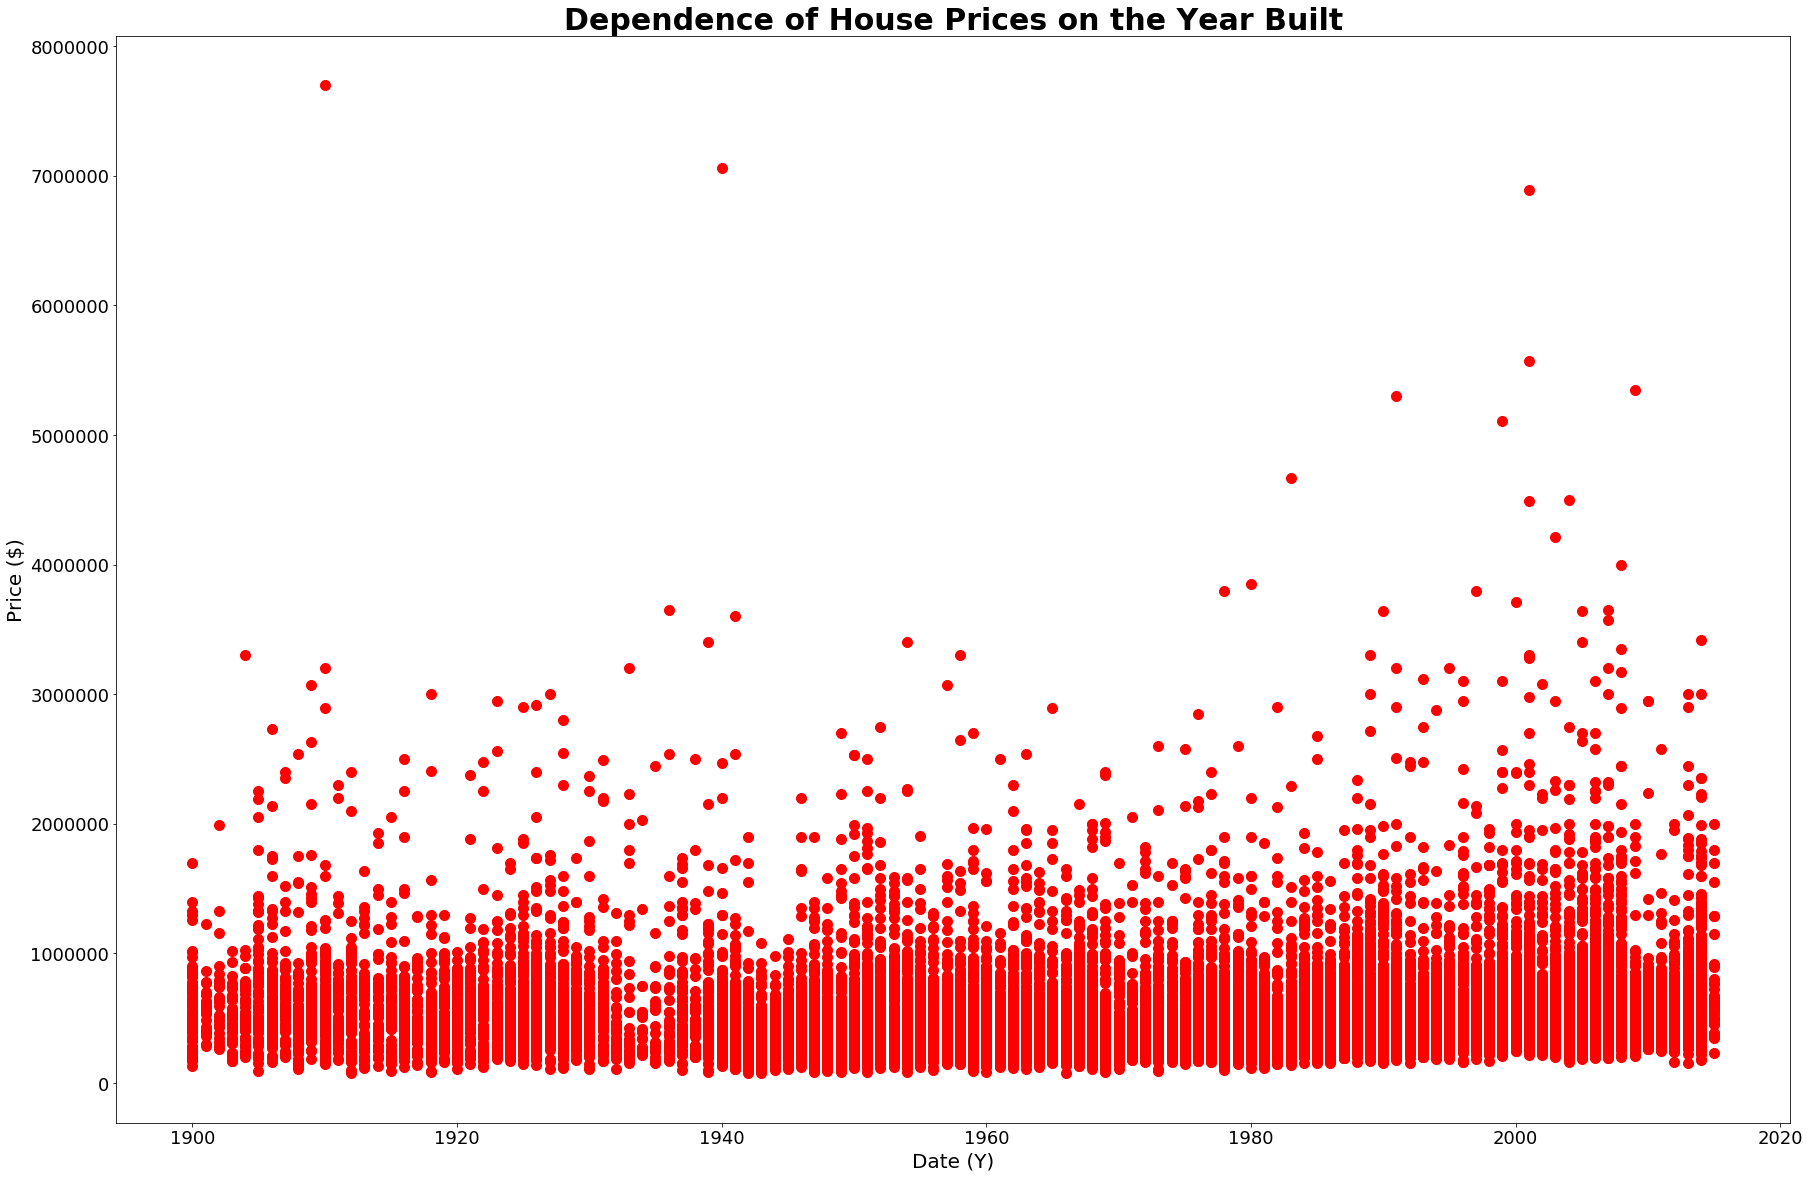

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [8]:
df1.plot(kind='scatter', x='yr_built', y='price', c='red',s=100)
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Year Built", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y)", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvsyearbuilt.png')


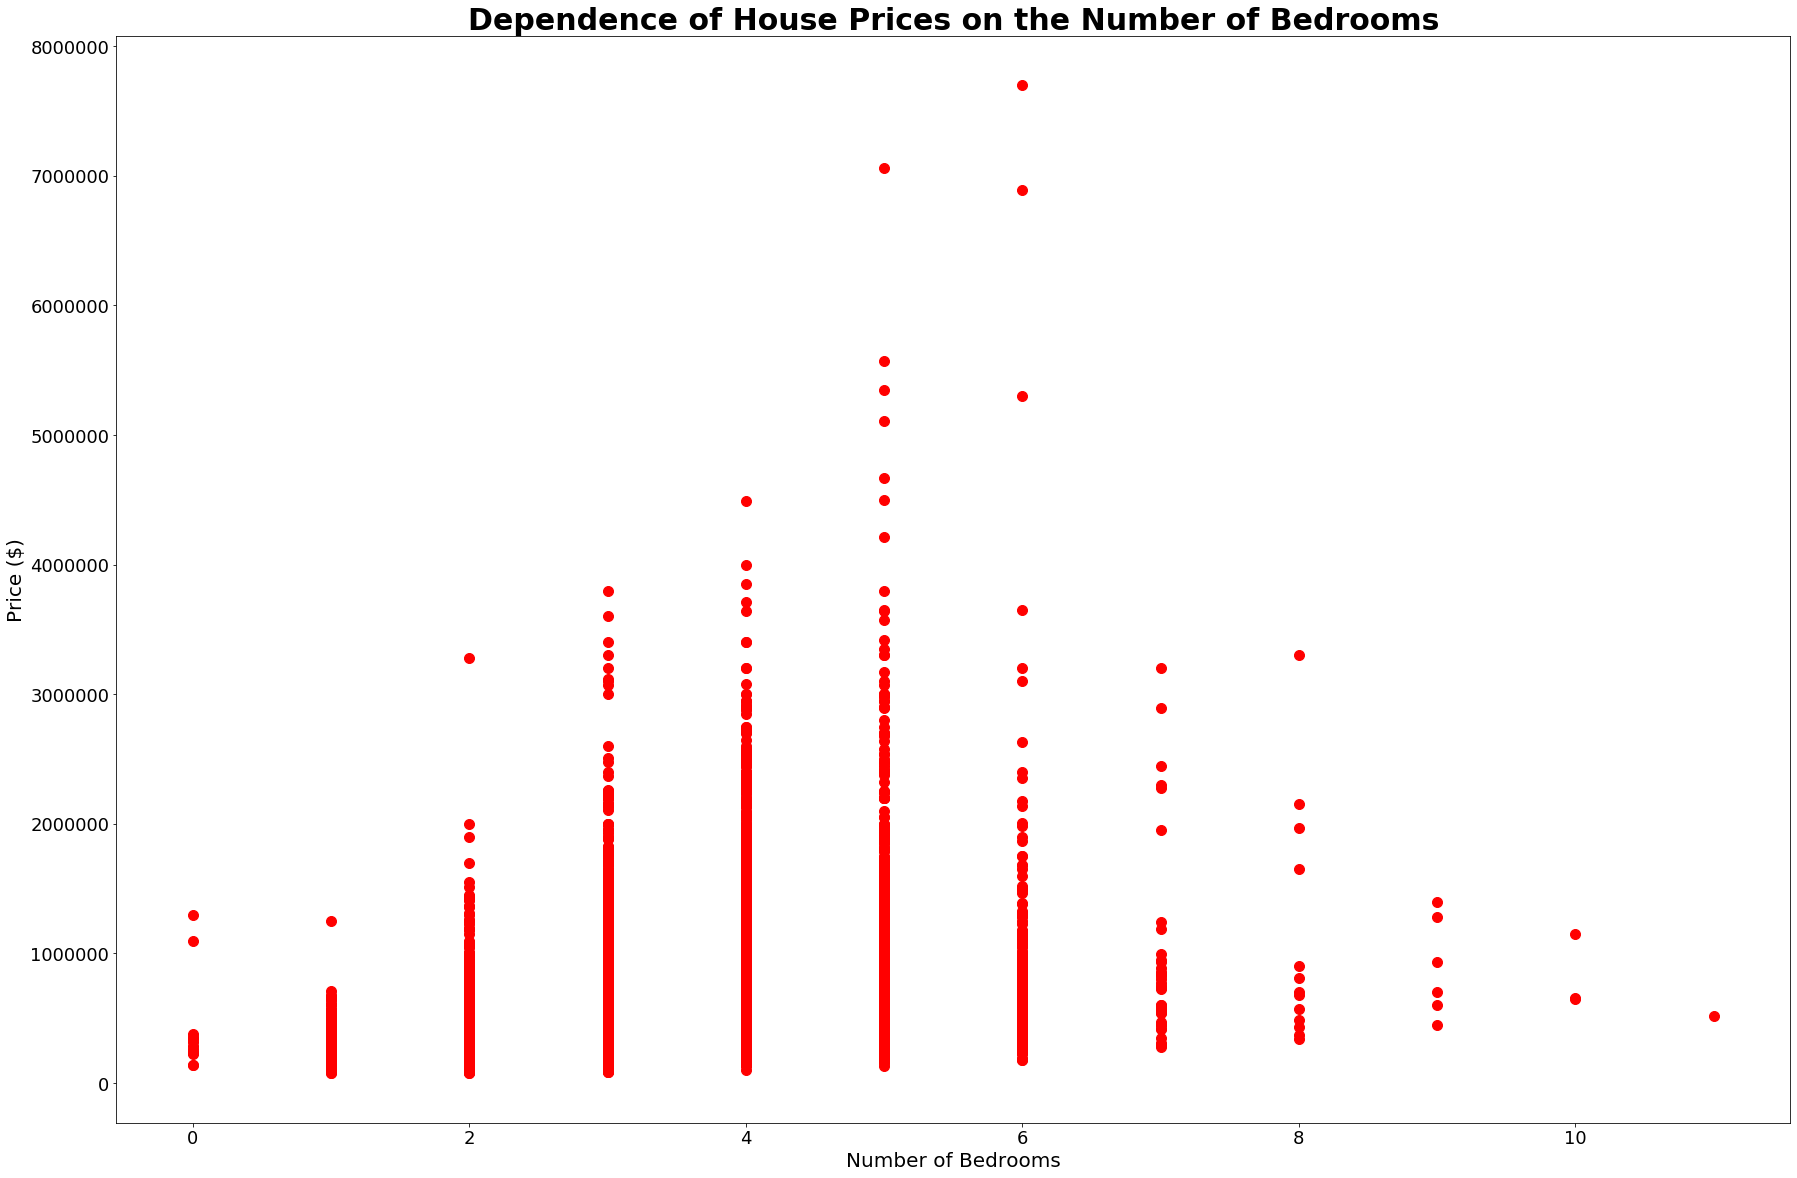

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [9]:
df1.plot(kind='scatter', x='bedrooms', y='price', c='red',s=100)
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Number of Bedrooms", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Number of Bedrooms", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvsbedrooms.png')

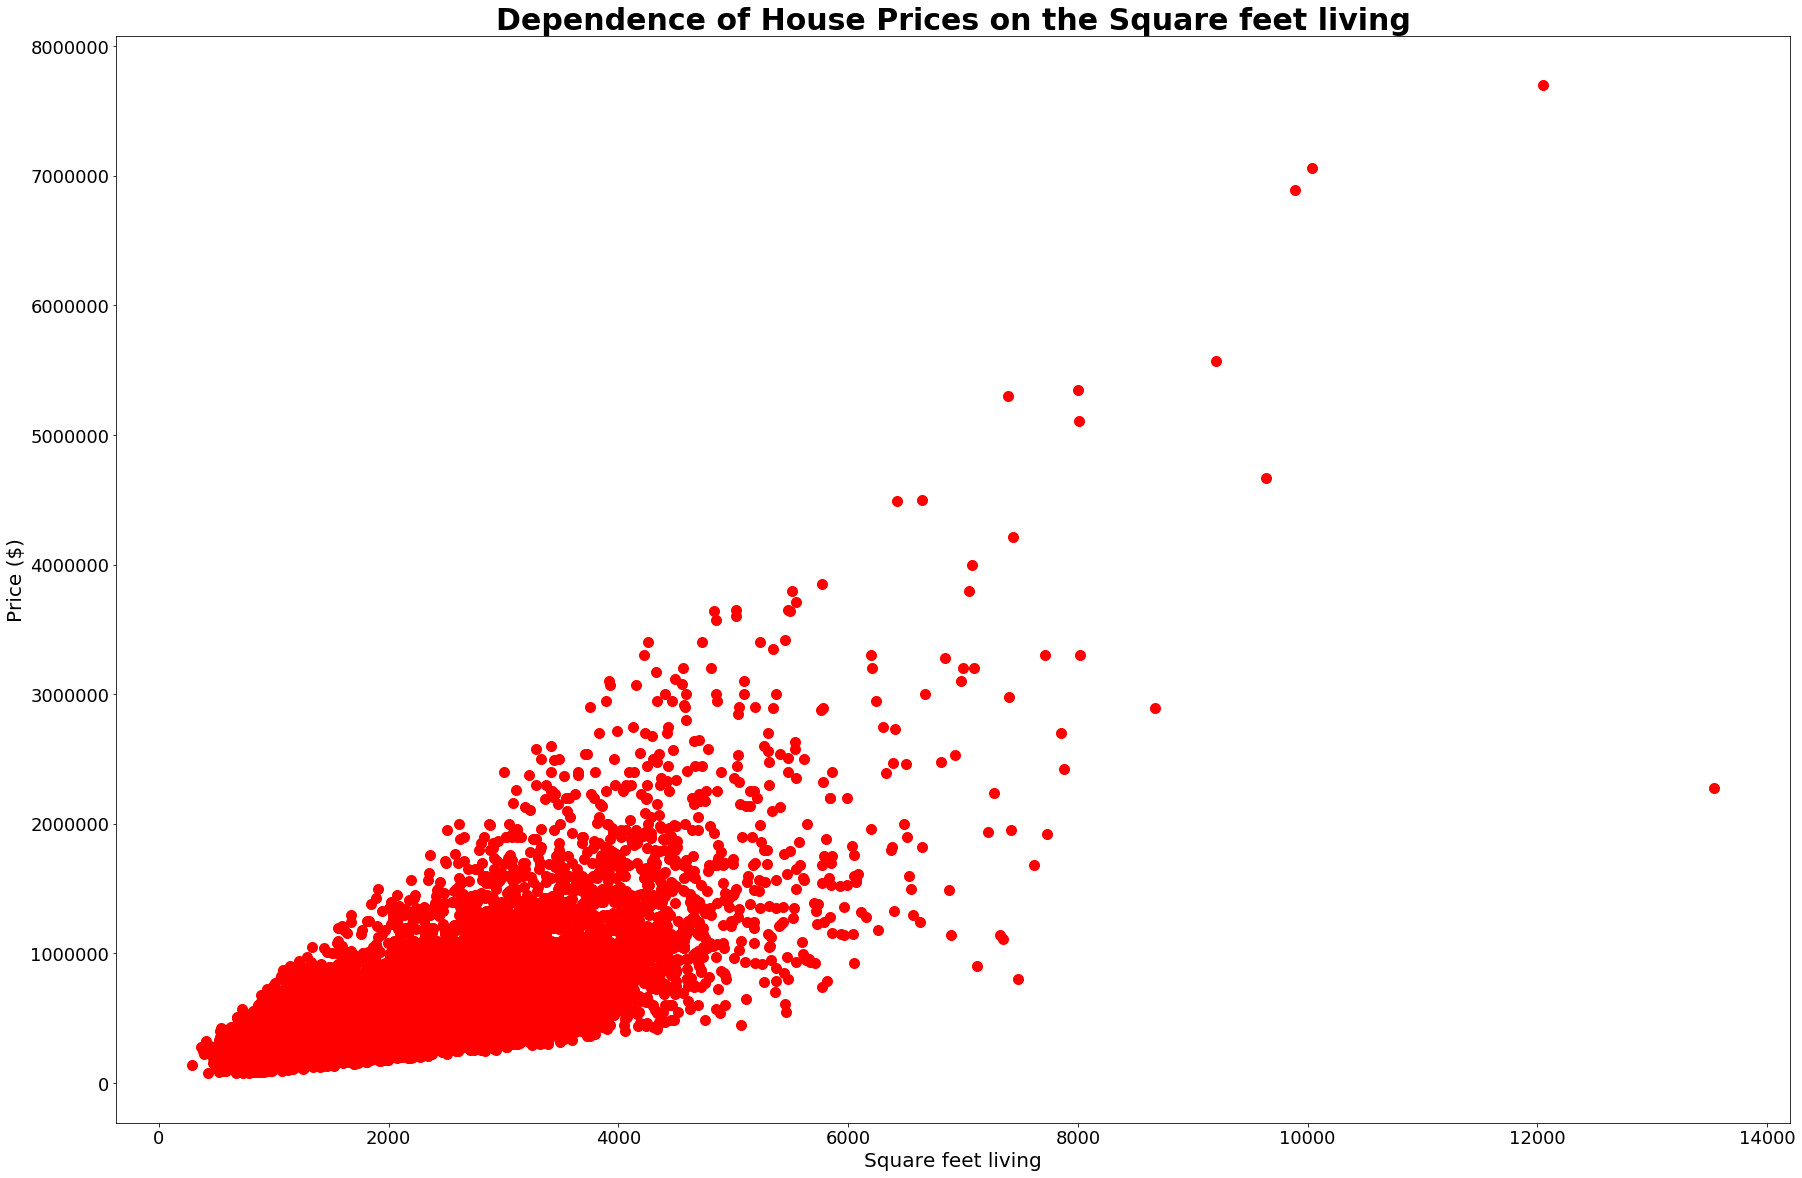

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [10]:
df1.plot(kind='scatter', x='sqft_living', y='price', c='red',s=100)
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Square feet living", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Square feet living", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftliving.png')

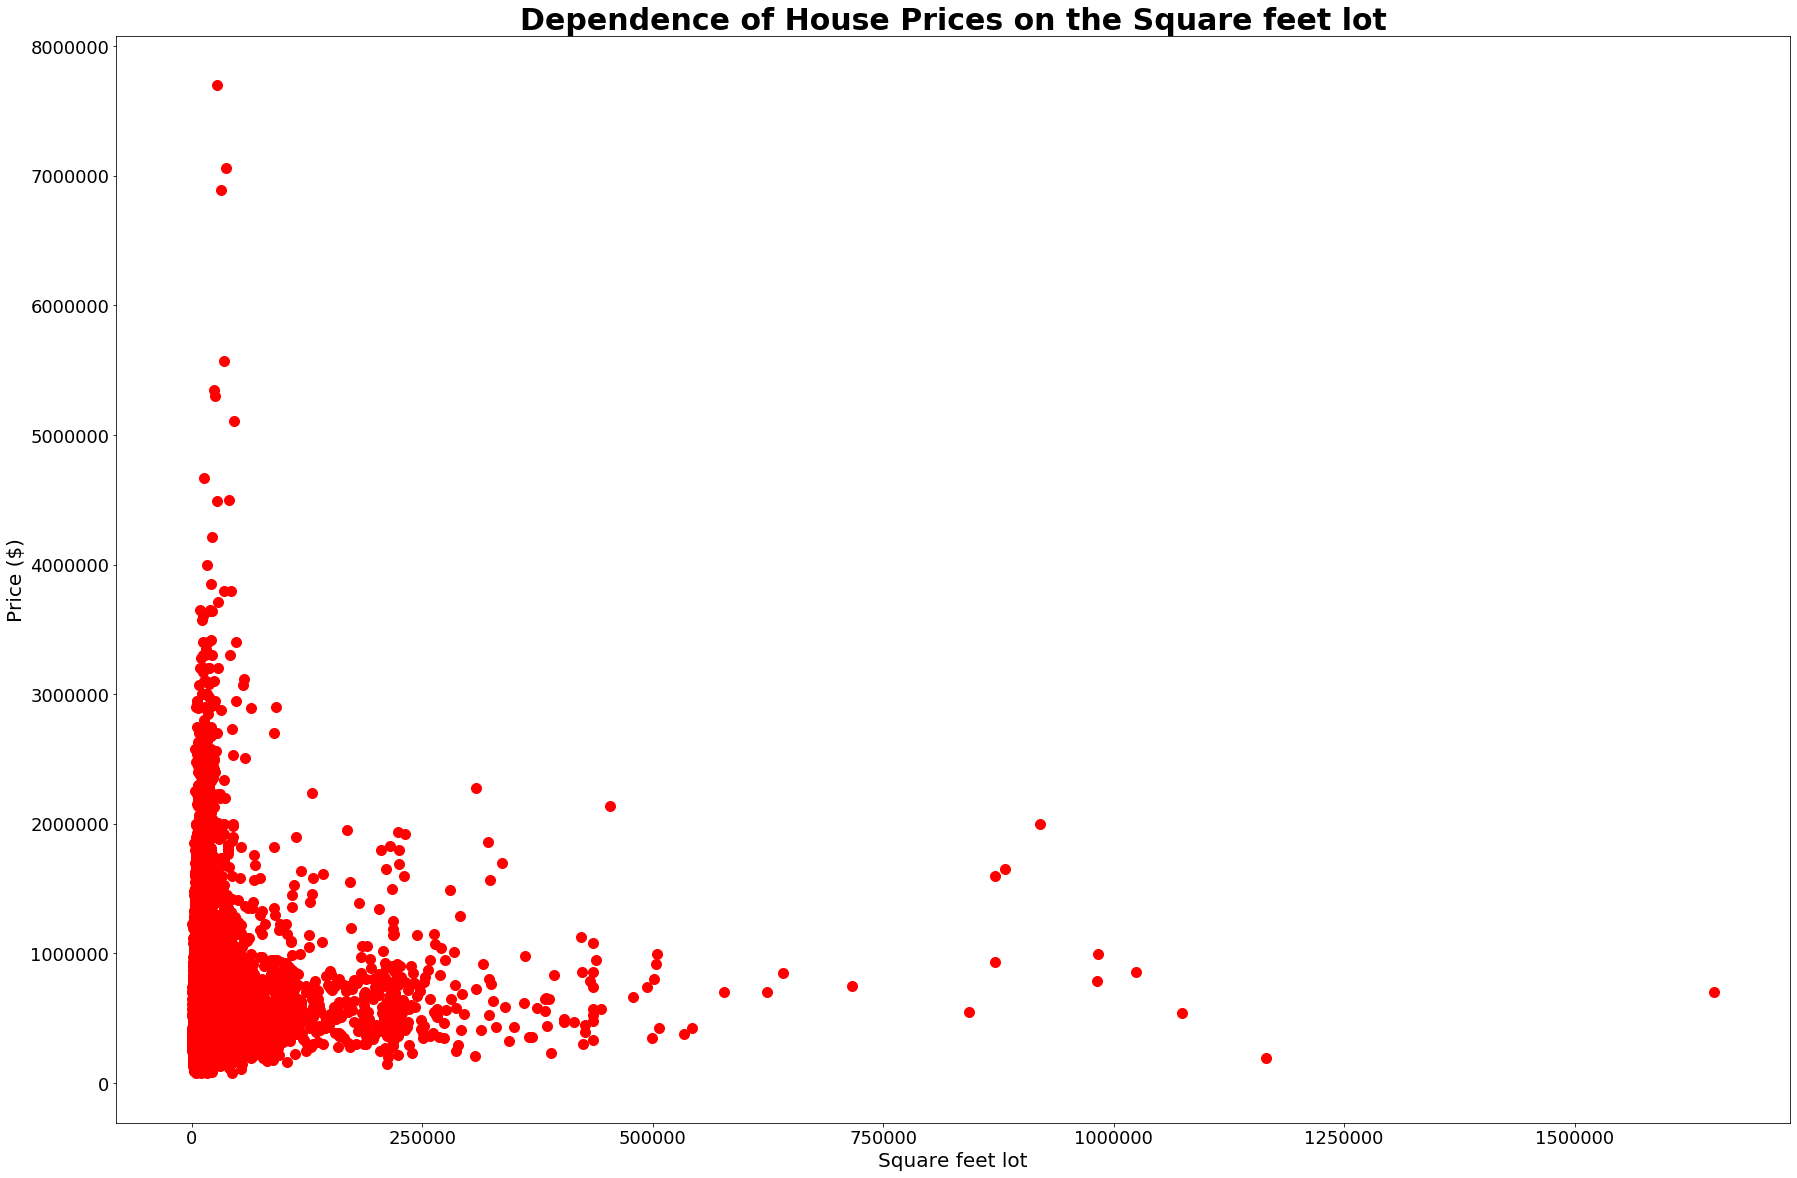

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [11]:
df1.plot(kind='scatter', x='sqft_lot', y='price', c='red',s=100)
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Square feet lot", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Square feet lot", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftlot.png')

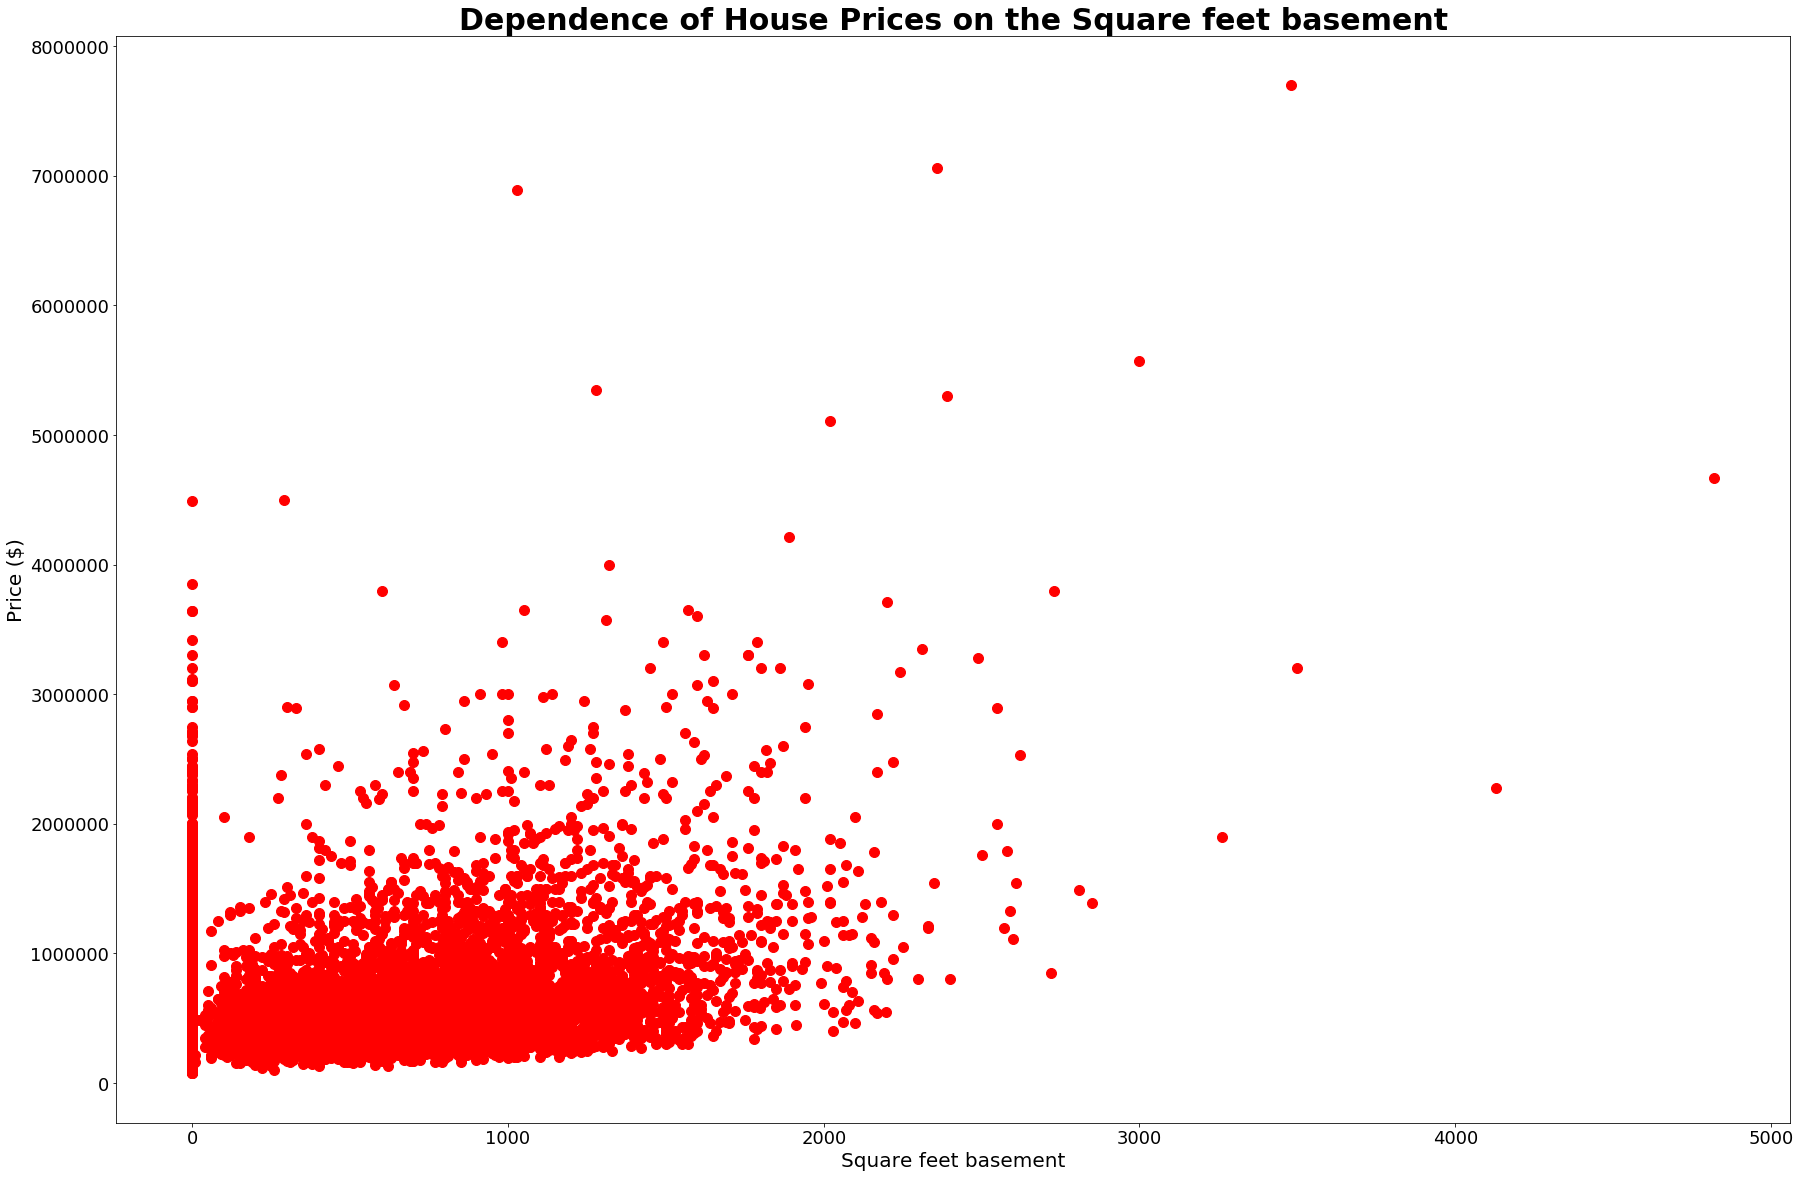

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [12]:
df1.plot(kind='scatter', x='sqft_basement', y='price', c='red',s=100)
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Square feet basement", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Square feet basement", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftbasement.png')

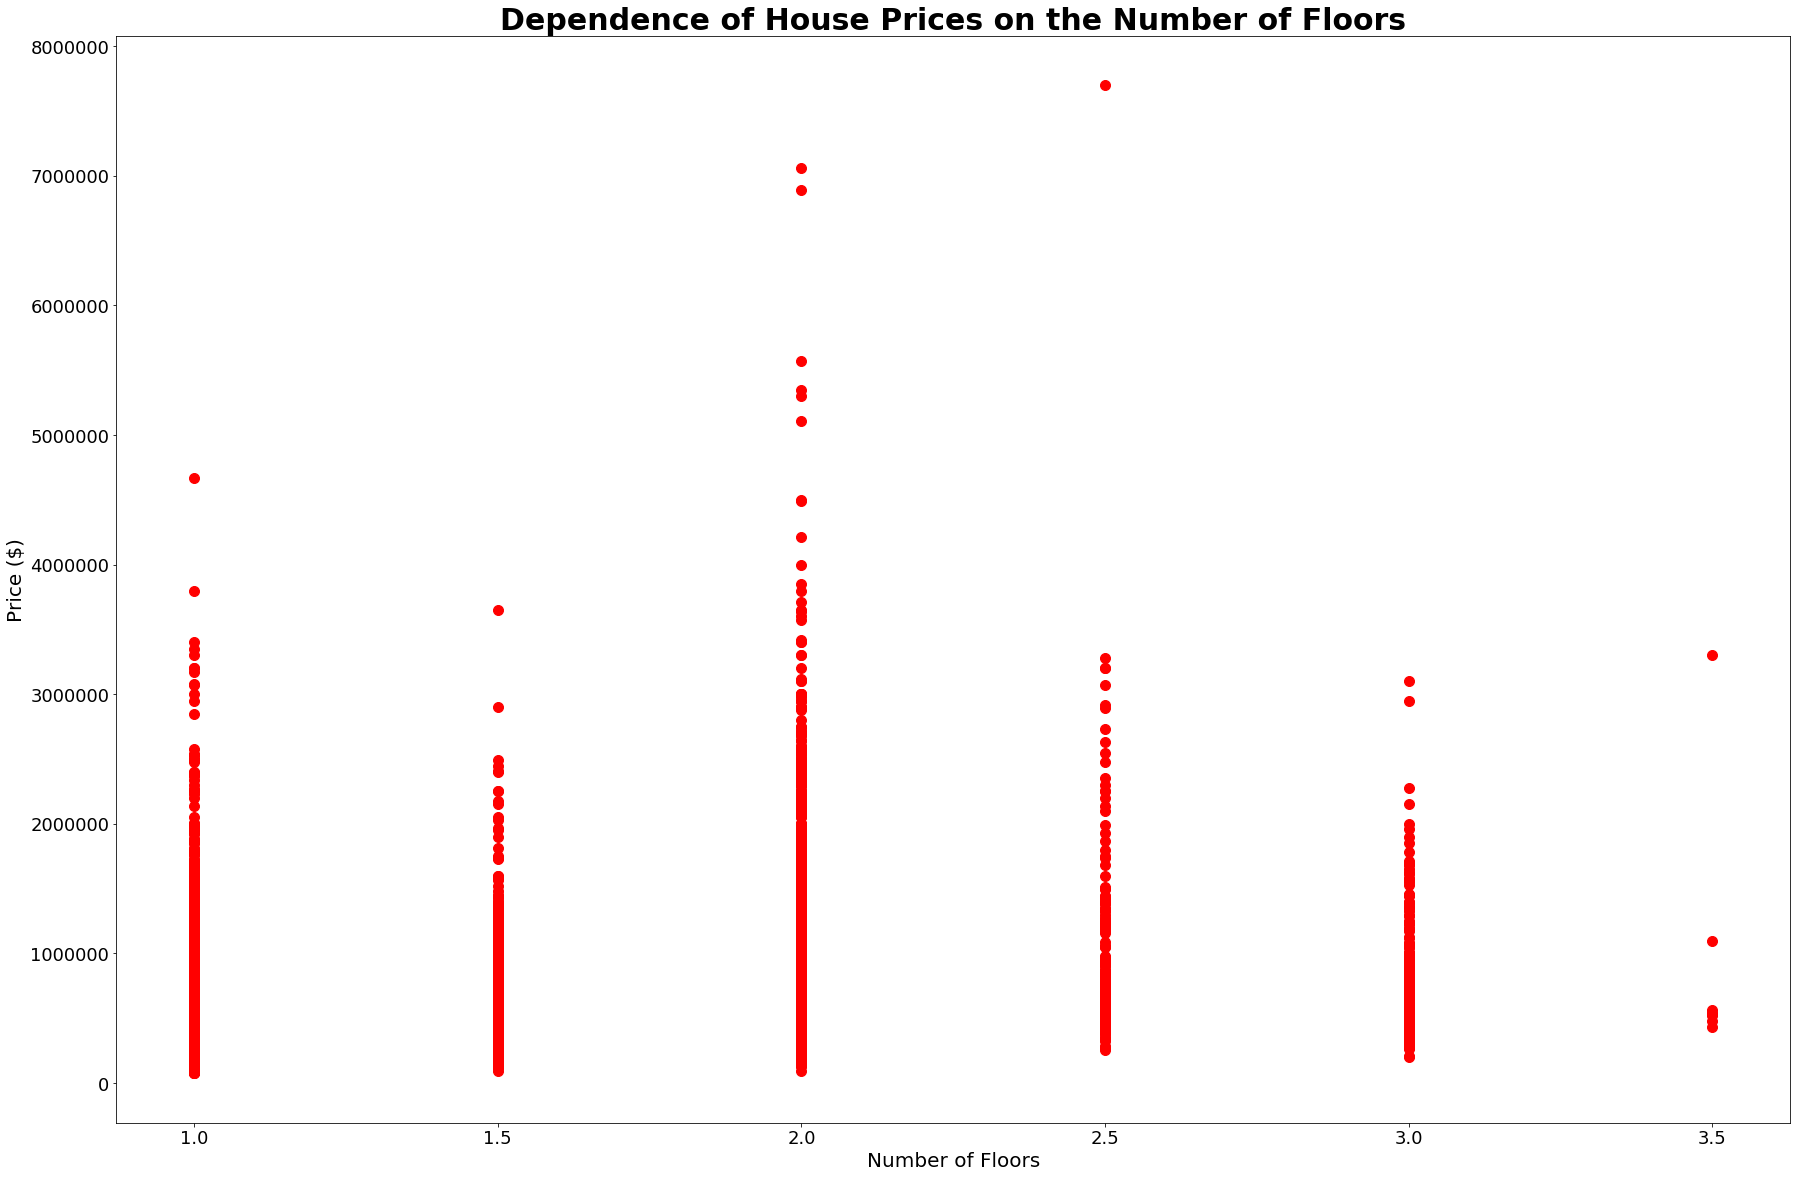

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [13]:
df1.plot(kind='scatter', x='floors', y='price', c='red',s=100)
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Number of Floors", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Number of Floors", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftfloors.png')

In [14]:
datey=[]
num1 = 0
for index, row in df.iterrows():
    print("working on "+ str(num1))
    ydate = df['date'][num1][0:4]
    datey.append(ydate)
    num1 = num1 + 1


working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 686
working on 687
working on 688
working on 689
working on 690
working on 691
working on 692
working on 693
working on 694
working on 695
working on 696
working on 697
working on 698
working on 699
working on 700
working on 701
working on 702
working on 703
working on 704
working on 705
working on 706
working on 707
working on 708
working on 709
working on 710
working on 711
working on 712
working on 713
working on 714
working on 715
working on 716
working on 717
working on 718
working on 719
working on 720
working on 721
working on 722
working on 723
working on 724
working on 725
working on 726
working on 727
working on 728
working on 729
working on 730
working on 731
working on 732
working on 733
working on 734
working on 735
working on 736
working on 737
working on 738
working on 739
working on 740
working on 741
working on 742
working on 743
working on 744
working on 745
working on 746
working on 747
working on 748
working on 749
working on 750
working on 751
working on

working on 1393
working on 1394
working on 1395
working on 1396
working on 1397
working on 1398
working on 1399
working on 1400
working on 1401
working on 1402
working on 1403
working on 1404
working on 1405
working on 1406
working on 1407
working on 1408
working on 1409
working on 1410
working on 1411
working on 1412
working on 1413
working on 1414
working on 1415
working on 1416
working on 1417
working on 1418
working on 1419
working on 1420
working on 1421
working on 1422
working on 1423
working on 1424
working on 1425
working on 1426
working on 1427
working on 1428
working on 1429
working on 1430
working on 1431
working on 1432
working on 1433
working on 1434
working on 1435
working on 1436
working on 1437
working on 1438
working on 1439
working on 1440
working on 1441
working on 1442
working on 1443
working on 1444
working on 1445
working on 1446
working on 1447
working on 1448
working on 1449
working on 1450
working on 1451
working on 1452
working on 1453
working on 1454
working 

working on 2042
working on 2043
working on 2044
working on 2045
working on 2046
working on 2047
working on 2048
working on 2049
working on 2050
working on 2051
working on 2052
working on 2053
working on 2054
working on 2055
working on 2056
working on 2057
working on 2058
working on 2059
working on 2060
working on 2061
working on 2062
working on 2063
working on 2064
working on 2065
working on 2066
working on 2067
working on 2068
working on 2069
working on 2070
working on 2071
working on 2072
working on 2073
working on 2074
working on 2075
working on 2076
working on 2077
working on 2078
working on 2079
working on 2080
working on 2081
working on 2082
working on 2083
working on 2084
working on 2085
working on 2086
working on 2087
working on 2088
working on 2089
working on 2090
working on 2091
working on 2092
working on 2093
working on 2094
working on 2095
working on 2096
working on 2097
working on 2098
working on 2099
working on 2100
working on 2101
working on 2102
working on 2103
working 

working on 2770
working on 2771
working on 2772
working on 2773
working on 2774
working on 2775
working on 2776
working on 2777
working on 2778
working on 2779
working on 2780
working on 2781
working on 2782
working on 2783
working on 2784
working on 2785
working on 2786
working on 2787
working on 2788
working on 2789
working on 2790
working on 2791
working on 2792
working on 2793
working on 2794
working on 2795
working on 2796
working on 2797
working on 2798
working on 2799
working on 2800
working on 2801
working on 2802
working on 2803
working on 2804
working on 2805
working on 2806
working on 2807
working on 2808
working on 2809
working on 2810
working on 2811
working on 2812
working on 2813
working on 2814
working on 2815
working on 2816
working on 2817
working on 2818
working on 2819
working on 2820
working on 2821
working on 2822
working on 2823
working on 2824
working on 2825
working on 2826
working on 2827
working on 2828
working on 2829
working on 2830
working on 2831
working 

working on 3536
working on 3537
working on 3538
working on 3539
working on 3540
working on 3541
working on 3542
working on 3543
working on 3544
working on 3545
working on 3546
working on 3547
working on 3548
working on 3549
working on 3550
working on 3551
working on 3552
working on 3553
working on 3554
working on 3555
working on 3556
working on 3557
working on 3558
working on 3559
working on 3560
working on 3561
working on 3562
working on 3563
working on 3564
working on 3565
working on 3566
working on 3567
working on 3568
working on 3569
working on 3570
working on 3571
working on 3572
working on 3573
working on 3574
working on 3575
working on 3576
working on 3577
working on 3578
working on 3579
working on 3580
working on 3581
working on 3582
working on 3583
working on 3584
working on 3585
working on 3586
working on 3587
working on 3588
working on 3589
working on 3590
working on 3591
working on 3592
working on 3593
working on 3594
working on 3595
working on 3596
working on 3597
working 

working on 4181
working on 4182
working on 4183
working on 4184
working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working on 4241
working on 4242
working 

working on 5027
working on 5028
working on 5029
working on 5030
working on 5031
working on 5032
working on 5033
working on 5034
working on 5035
working on 5036
working on 5037
working on 5038
working on 5039
working on 5040
working on 5041
working on 5042
working on 5043
working on 5044
working on 5045
working on 5046
working on 5047
working on 5048
working on 5049
working on 5050
working on 5051
working on 5052
working on 5053
working on 5054
working on 5055
working on 5056
working on 5057
working on 5058
working on 5059
working on 5060
working on 5061
working on 5062
working on 5063
working on 5064
working on 5065
working on 5066
working on 5067
working on 5068
working on 5069
working on 5070
working on 5071
working on 5072
working on 5073
working on 5074
working on 5075
working on 5076
working on 5077
working on 5078
working on 5079
working on 5080
working on 5081
working on 5082
working on 5083
working on 5084
working on 5085
working on 5086
working on 5087
working on 5088
working 

working on 5695
working on 5696
working on 5697
working on 5698
working on 5699
working on 5700
working on 5701
working on 5702
working on 5703
working on 5704
working on 5705
working on 5706
working on 5707
working on 5708
working on 5709
working on 5710
working on 5711
working on 5712
working on 5713
working on 5714
working on 5715
working on 5716
working on 5717
working on 5718
working on 5719
working on 5720
working on 5721
working on 5722
working on 5723
working on 5724
working on 5725
working on 5726
working on 5727
working on 5728
working on 5729
working on 5730
working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working 

working on 6421
working on 6422
working on 6423
working on 6424
working on 6425
working on 6426
working on 6427
working on 6428
working on 6429
working on 6430
working on 6431
working on 6432
working on 6433
working on 6434
working on 6435
working on 6436
working on 6437
working on 6438
working on 6439
working on 6440
working on 6441
working on 6442
working on 6443
working on 6444
working on 6445
working on 6446
working on 6447
working on 6448
working on 6449
working on 6450
working on 6451
working on 6452
working on 6453
working on 6454
working on 6455
working on 6456
working on 6457
working on 6458
working on 6459
working on 6460
working on 6461
working on 6462
working on 6463
working on 6464
working on 6465
working on 6466
working on 6467
working on 6468
working on 6469
working on 6470
working on 6471
working on 6472
working on 6473
working on 6474
working on 6475
working on 6476
working on 6477
working on 6478
working on 6479
working on 6480
working on 6481
working on 6482
working 

working on 7209
working on 7210
working on 7211
working on 7212
working on 7213
working on 7214
working on 7215
working on 7216
working on 7217
working on 7218
working on 7219
working on 7220
working on 7221
working on 7222
working on 7223
working on 7224
working on 7225
working on 7226
working on 7227
working on 7228
working on 7229
working on 7230
working on 7231
working on 7232
working on 7233
working on 7234
working on 7235
working on 7236
working on 7237
working on 7238
working on 7239
working on 7240
working on 7241
working on 7242
working on 7243
working on 7244
working on 7245
working on 7246
working on 7247
working on 7248
working on 7249
working on 7250
working on 7251
working on 7252
working on 7253
working on 7254
working on 7255
working on 7256
working on 7257
working on 7258
working on 7259
working on 7260
working on 7261
working on 7262
working on 7263
working on 7264
working on 7265
working on 7266
working on 7267
working on 7268
working on 7269
working on 7270
working 

working on 7920
working on 7921
working on 7922
working on 7923
working on 7924
working on 7925
working on 7926
working on 7927
working on 7928
working on 7929
working on 7930
working on 7931
working on 7932
working on 7933
working on 7934
working on 7935
working on 7936
working on 7937
working on 7938
working on 7939
working on 7940
working on 7941
working on 7942
working on 7943
working on 7944
working on 7945
working on 7946
working on 7947
working on 7948
working on 7949
working on 7950
working on 7951
working on 7952
working on 7953
working on 7954
working on 7955
working on 7956
working on 7957
working on 7958
working on 7959
working on 7960
working on 7961
working on 7962
working on 7963
working on 7964
working on 7965
working on 7966
working on 7967
working on 7968
working on 7969
working on 7970
working on 7971
working on 7972
working on 7973
working on 7974
working on 7975
working on 7976
working on 7977
working on 7978
working on 7979
working on 7980
working on 7981
working 

working on 8644
working on 8645
working on 8646
working on 8647
working on 8648
working on 8649
working on 8650
working on 8651
working on 8652
working on 8653
working on 8654
working on 8655
working on 8656
working on 8657
working on 8658
working on 8659
working on 8660
working on 8661
working on 8662
working on 8663
working on 8664
working on 8665
working on 8666
working on 8667
working on 8668
working on 8669
working on 8670
working on 8671
working on 8672
working on 8673
working on 8674
working on 8675
working on 8676
working on 8677
working on 8678
working on 8679
working on 8680
working on 8681
working on 8682
working on 8683
working on 8684
working on 8685
working on 8686
working on 8687
working on 8688
working on 8689
working on 8690
working on 8691
working on 8692
working on 8693
working on 8694
working on 8695
working on 8696
working on 8697
working on 8698
working on 8699
working on 8700
working on 8701
working on 8702
working on 8703
working on 8704
working on 8705
working 

working on 9311
working on 9312
working on 9313
working on 9314
working on 9315
working on 9316
working on 9317
working on 9318
working on 9319
working on 9320
working on 9321
working on 9322
working on 9323
working on 9324
working on 9325
working on 9326
working on 9327
working on 9328
working on 9329
working on 9330
working on 9331
working on 9332
working on 9333
working on 9334
working on 9335
working on 9336
working on 9337
working on 9338
working on 9339
working on 9340
working on 9341
working on 9342
working on 9343
working on 9344
working on 9345
working on 9346
working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working on 9352
working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working 

working on 10022
working on 10023
working on 10024
working on 10025
working on 10026
working on 10027
working on 10028
working on 10029
working on 10030
working on 10031
working on 10032
working on 10033
working on 10034
working on 10035
working on 10036
working on 10037
working on 10038
working on 10039
working on 10040
working on 10041
working on 10042
working on 10043
working on 10044
working on 10045
working on 10046
working on 10047
working on 10048
working on 10049
working on 10050
working on 10051
working on 10052
working on 10053
working on 10054
working on 10055
working on 10056
working on 10057
working on 10058
working on 10059
working on 10060
working on 10061
working on 10062
working on 10063
working on 10064
working on 10065
working on 10066
working on 10067
working on 10068
working on 10069
working on 10070
working on 10071
working on 10072
working on 10073
working on 10074
working on 10075
working on 10076
working on 10077
working on 10078
working on 10079
working on 100

working on 10690
working on 10691
working on 10692
working on 10693
working on 10694
working on 10695
working on 10696
working on 10697
working on 10698
working on 10699
working on 10700
working on 10701
working on 10702
working on 10703
working on 10704
working on 10705
working on 10706
working on 10707
working on 10708
working on 10709
working on 10710
working on 10711
working on 10712
working on 10713
working on 10714
working on 10715
working on 10716
working on 10717
working on 10718
working on 10719
working on 10720
working on 10721
working on 10722
working on 10723
working on 10724
working on 10725
working on 10726
working on 10727
working on 10728
working on 10729
working on 10730
working on 10731
working on 10732
working on 10733
working on 10734
working on 10735
working on 10736
working on 10737
working on 10738
working on 10739
working on 10740
working on 10741
working on 10742
working on 10743
working on 10744
working on 10745
working on 10746
working on 10747
working on 107

working on 11367
working on 11368
working on 11369
working on 11370
working on 11371
working on 11372
working on 11373
working on 11374
working on 11375
working on 11376
working on 11377
working on 11378
working on 11379
working on 11380
working on 11381
working on 11382
working on 11383
working on 11384
working on 11385
working on 11386
working on 11387
working on 11388
working on 11389
working on 11390
working on 11391
working on 11392
working on 11393
working on 11394
working on 11395
working on 11396
working on 11397
working on 11398
working on 11399
working on 11400
working on 11401
working on 11402
working on 11403
working on 11404
working on 11405
working on 11406
working on 11407
working on 11408
working on 11409
working on 11410
working on 11411
working on 11412
working on 11413
working on 11414
working on 11415
working on 11416
working on 11417
working on 11418
working on 11419
working on 11420
working on 11421
working on 11422
working on 11423
working on 11424
working on 114

working on 12168
working on 12169
working on 12170
working on 12171
working on 12172
working on 12173
working on 12174
working on 12175
working on 12176
working on 12177
working on 12178
working on 12179
working on 12180
working on 12181
working on 12182
working on 12183
working on 12184
working on 12185
working on 12186
working on 12187
working on 12188
working on 12189
working on 12190
working on 12191
working on 12192
working on 12193
working on 12194
working on 12195
working on 12196
working on 12197
working on 12198
working on 12199
working on 12200
working on 12201
working on 12202
working on 12203
working on 12204
working on 12205
working on 12206
working on 12207
working on 12208
working on 12209
working on 12210
working on 12211
working on 12212
working on 12213
working on 12214
working on 12215
working on 12216
working on 12217
working on 12218
working on 12219
working on 12220
working on 12221
working on 12222
working on 12223
working on 12224
working on 12225
working on 122

working on 12756
working on 12757
working on 12758
working on 12759
working on 12760
working on 12761
working on 12762
working on 12763
working on 12764
working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 12802
working on 12803
working on 12804
working on 12805
working on 12806
working on 12807
working on 12808
working on 12809
working on 12810
working on 12811
working on 12812
working on 12813
working on 128

working on 13348
working on 13349
working on 13350
working on 13351
working on 13352
working on 13353
working on 13354
working on 13355
working on 13356
working on 13357
working on 13358
working on 13359
working on 13360
working on 13361
working on 13362
working on 13363
working on 13364
working on 13365
working on 13366
working on 13367
working on 13368
working on 13369
working on 13370
working on 13371
working on 13372
working on 13373
working on 13374
working on 13375
working on 13376
working on 13377
working on 13378
working on 13379
working on 13380
working on 13381
working on 13382
working on 13383
working on 13384
working on 13385
working on 13386
working on 13387
working on 13388
working on 13389
working on 13390
working on 13391
working on 13392
working on 13393
working on 13394
working on 13395
working on 13396
working on 13397
working on 13398
working on 13399
working on 13400
working on 13401
working on 13402
working on 13403
working on 13404
working on 13405
working on 134

working on 13985
working on 13986
working on 13987
working on 13988
working on 13989
working on 13990
working on 13991
working on 13992
working on 13993
working on 13994
working on 13995
working on 13996
working on 13997
working on 13998
working on 13999
working on 14000
working on 14001
working on 14002
working on 14003
working on 14004
working on 14005
working on 14006
working on 14007
working on 14008
working on 14009
working on 14010
working on 14011
working on 14012
working on 14013
working on 14014
working on 14015
working on 14016
working on 14017
working on 14018
working on 14019
working on 14020
working on 14021
working on 14022
working on 14023
working on 14024
working on 14025
working on 14026
working on 14027
working on 14028
working on 14029
working on 14030
working on 14031
working on 14032
working on 14033
working on 14034
working on 14035
working on 14036
working on 14037
working on 14038
working on 14039
working on 14040
working on 14041
working on 14042
working on 140

working on 14708
working on 14709
working on 14710
working on 14711
working on 14712
working on 14713
working on 14714
working on 14715
working on 14716
working on 14717
working on 14718
working on 14719
working on 14720
working on 14721
working on 14722
working on 14723
working on 14724
working on 14725
working on 14726
working on 14727
working on 14728
working on 14729
working on 14730
working on 14731
working on 14732
working on 14733
working on 14734
working on 14735
working on 14736
working on 14737
working on 14738
working on 14739
working on 14740
working on 14741
working on 14742
working on 14743
working on 14744
working on 14745
working on 14746
working on 14747
working on 14748
working on 14749
working on 14750
working on 14751
working on 14752
working on 14753
working on 14754
working on 14755
working on 14756
working on 14757
working on 14758
working on 14759
working on 14760
working on 14761
working on 14762
working on 14763
working on 14764
working on 14765
working on 147

working on 15212
working on 15213
working on 15214
working on 15215
working on 15216
working on 15217
working on 15218
working on 15219
working on 15220
working on 15221
working on 15222
working on 15223
working on 15224
working on 15225
working on 15226
working on 15227
working on 15228
working on 15229
working on 15230
working on 15231
working on 15232
working on 15233
working on 15234
working on 15235
working on 15236
working on 15237
working on 15238
working on 15239
working on 15240
working on 15241
working on 15242
working on 15243
working on 15244
working on 15245
working on 15246
working on 15247
working on 15248
working on 15249
working on 15250
working on 15251
working on 15252
working on 15253
working on 15254
working on 15255
working on 15256
working on 15257
working on 15258
working on 15259
working on 15260
working on 15261
working on 15262
working on 15263
working on 15264
working on 15265
working on 15266
working on 15267
working on 15268
working on 15269
working on 152

working on 15795
working on 15796
working on 15797
working on 15798
working on 15799
working on 15800
working on 15801
working on 15802
working on 15803
working on 15804
working on 15805
working on 15806
working on 15807
working on 15808
working on 15809
working on 15810
working on 15811
working on 15812
working on 15813
working on 15814
working on 15815
working on 15816
working on 15817
working on 15818
working on 15819
working on 15820
working on 15821
working on 15822
working on 15823
working on 15824
working on 15825
working on 15826
working on 15827
working on 15828
working on 15829
working on 15830
working on 15831
working on 15832
working on 15833
working on 15834
working on 15835
working on 15836
working on 15837
working on 15838
working on 15839
working on 15840
working on 15841
working on 15842
working on 15843
working on 15844
working on 15845
working on 15846
working on 15847
working on 15848
working on 15849
working on 15850
working on 15851
working on 15852
working on 158

working on 16402
working on 16403
working on 16404
working on 16405
working on 16406
working on 16407
working on 16408
working on 16409
working on 16410
working on 16411
working on 16412
working on 16413
working on 16414
working on 16415
working on 16416
working on 16417
working on 16418
working on 16419
working on 16420
working on 16421
working on 16422
working on 16423
working on 16424
working on 16425
working on 16426
working on 16427
working on 16428
working on 16429
working on 16430
working on 16431
working on 16432
working on 16433
working on 16434
working on 16435
working on 16436
working on 16437
working on 16438
working on 16439
working on 16440
working on 16441
working on 16442
working on 16443
working on 16444
working on 16445
working on 16446
working on 16447
working on 16448
working on 16449
working on 16450
working on 16451
working on 16452
working on 16453
working on 16454
working on 16455
working on 16456
working on 16457
working on 16458
working on 16459
working on 164

working on 16997
working on 16998
working on 16999
working on 17000
working on 17001
working on 17002
working on 17003
working on 17004
working on 17005
working on 17006
working on 17007
working on 17008
working on 17009
working on 17010
working on 17011
working on 17012
working on 17013
working on 17014
working on 17015
working on 17016
working on 17017
working on 17018
working on 17019
working on 17020
working on 17021
working on 17022
working on 17023
working on 17024
working on 17025
working on 17026
working on 17027
working on 17028
working on 17029
working on 17030
working on 17031
working on 17032
working on 17033
working on 17034
working on 17035
working on 17036
working on 17037
working on 17038
working on 17039
working on 17040
working on 17041
working on 17042
working on 17043
working on 17044
working on 17045
working on 17046
working on 17047
working on 17048
working on 17049
working on 17050
working on 17051
working on 17052
working on 17053
working on 17054
working on 170

working on 17696
working on 17697
working on 17698
working on 17699
working on 17700
working on 17701
working on 17702
working on 17703
working on 17704
working on 17705
working on 17706
working on 17707
working on 17708
working on 17709
working on 17710
working on 17711
working on 17712
working on 17713
working on 17714
working on 17715
working on 17716
working on 17717
working on 17718
working on 17719
working on 17720
working on 17721
working on 17722
working on 17723
working on 17724
working on 17725
working on 17726
working on 17727
working on 17728
working on 17729
working on 17730
working on 17731
working on 17732
working on 17733
working on 17734
working on 17735
working on 17736
working on 17737
working on 17738
working on 17739
working on 17740
working on 17741
working on 17742
working on 17743
working on 17744
working on 17745
working on 17746
working on 17747
working on 17748
working on 17749
working on 17750
working on 17751
working on 17752
working on 17753
working on 177

working on 18639
working on 18640
working on 18641
working on 18642
working on 18643
working on 18644
working on 18645
working on 18646
working on 18647
working on 18648
working on 18649
working on 18650
working on 18651
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 18664
working on 18665
working on 18666
working on 18667
working on 18668
working on 18669
working on 18670
working on 18671
working on 18672
working on 18673
working on 18674
working on 18675
working on 18676
working on 18677
working on 18678
working on 18679
working on 18680
working on 18681
working on 18682
working on 18683
working on 18684
working on 18685
working on 18686
working on 18687
working on 18688
working on 18689
working on 18690
working on 18691
working on 18692
working on 18693
working on 18694
working on 18695
working on 18696
working on 186

working on 19335
working on 19336
working on 19337
working on 19338
working on 19339
working on 19340
working on 19341
working on 19342
working on 19343
working on 19344
working on 19345
working on 19346
working on 19347
working on 19348
working on 19349
working on 19350
working on 19351
working on 19352
working on 19353
working on 19354
working on 19355
working on 19356
working on 19357
working on 19358
working on 19359
working on 19360
working on 19361
working on 19362
working on 19363
working on 19364
working on 19365
working on 19366
working on 19367
working on 19368
working on 19369
working on 19370
working on 19371
working on 19372
working on 19373
working on 19374
working on 19375
working on 19376
working on 19377
working on 19378
working on 19379
working on 19380
working on 19381
working on 19382
working on 19383
working on 19384
working on 19385
working on 19386
working on 19387
working on 19388
working on 19389
working on 19390
working on 19391
working on 19392
working on 193

working on 20030
working on 20031
working on 20032
working on 20033
working on 20034
working on 20035
working on 20036
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20043
working on 20044
working on 20045
working on 20046
working on 20047
working on 20048
working on 20049
working on 20050
working on 20051
working on 20052
working on 20053
working on 20054
working on 20055
working on 20056
working on 20057
working on 20058
working on 20059
working on 20060
working on 20061
working on 20062
working on 20063
working on 20064
working on 20065
working on 20066
working on 20067
working on 20068
working on 20069
working on 20070
working on 20071
working on 20072
working on 20073
working on 20074
working on 20075
working on 20076
working on 20077
working on 20078
working on 20079
working on 20080
working on 20081
working on 20082
working on 20083
working on 20084
working on 20085
working on 20086
working on 20087
working on 200

working on 20928
working on 20929
working on 20930
working on 20931
working on 20932
working on 20933
working on 20934
working on 20935
working on 20936
working on 20937
working on 20938
working on 20939
working on 20940
working on 20941
working on 20942
working on 20943
working on 20944
working on 20945
working on 20946
working on 20947
working on 20948
working on 20949
working on 20950
working on 20951
working on 20952
working on 20953
working on 20954
working on 20955
working on 20956
working on 20957
working on 20958
working on 20959
working on 20960
working on 20961
working on 20962
working on 20963
working on 20964
working on 20965
working on 20966
working on 20967
working on 20968
working on 20969
working on 20970
working on 20971
working on 20972
working on 20973
working on 20974
working on 20975
working on 20976
working on 20977
working on 20978
working on 20979
working on 20980
working on 20981
working on 20982
working on 20983
working on 20984
working on 20985
working on 209

In [15]:
df['date(Y)']=datey

In [16]:
housesalesbydateymd=df.groupby('date').mean()
housesalesbydateymd

id         price  bedrooms  bathrooms  sqft_living  \
date                                                                       
2014-05-02  4.088342e+09  5.261918e+05  3.402985   2.138060  2102.835821   
2014-05-03  6.709662e+09  4.669700e+05  3.000000   1.812500  1620.000000   
2014-05-04  5.848658e+09  5.766900e+05  3.200000   2.400000  2508.000000   
2014-05-05  4.571210e+09  5.810577e+05  3.523810   2.193452  2257.845238   
2014-05-06  4.553568e+09  5.341684e+05  3.493976   2.171687  2102.168675   
...                  ...           ...       ...        ...          ...   
2015-05-13  4.625505e+09  5.116239e+05  3.193548   2.088710  1922.322581   
2015-05-14  6.159145e+09  6.038908e+05  3.818182   2.340909  2093.909091   
2015-05-15  7.923600e+09  4.500000e+05  5.000000   2.000000  1870.000000   
2015-05-24  5.101401e+09  4.455000e+05  2.000000   1.750000  1390.000000   
2015-05-27  9.106000e+09  1.310000e+06  4.000000   2.250000  3750.000000   

                sqft_lot    floors  waterfront      view  condition     grade  \
date                                                                            
2014-05-02  15640.477612  1.462687         0.0  0.223881   3.447761  7.835821   
2014-05-03   8901.000000  1.250000         0.0  0.000000   3.500000  7.000000   
2014-05-04   7563.000000  1.400000         0.0  0.400000   3.400000  8.400000   
2014-05-05  17966.309524  1.565476         0.0  0.202381   3.440476  7.833333   
2014-05-06  12127.662651  1.457831         0.0  0.120482   3.349398  7.650602   
...                  ...       ...         ...       ...        ...       ...   
2015-05-13   8165.096774  1.403226         0.0  0.032258   3.387097  7.548387   
2015-05-14   9393.363636  1.590909         0.0  0.090909   3.181818  7.909091   
2015-05-15   7344.000000  1.500000         0.0  0.000000   3.000000  7.000000   
2015-05-24   6670.000000  1.000000         0.0  0.000000   3.000000  6.000000   
2015-05-27   5000.000000  2.000000         0.0  0.000000   5.000000  8.000000   

             sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                
2014-05-02  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  1769.638554     332.530120  1969.108434    193.373494   
...                 ...            ...          ...           ...   
2015-05-13  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05-24  98115.000000  47.691400 -122.308000     920.000000   6380.000000  
2015-05-27  98115.000000  47.674700 -122.303000    2170.000000   4590.000000  

[372 rows x 20 columns]

In [17]:
housesalesbydateym=df.groupby('date(Y/M)').mean()
housesalesbydateym

id          price  bedrooms  bathrooms  sqft_living  \
date(Y/M)                                                                  
2014-05    4.628282e+09  548166.600113  3.389706   2.139847  2114.912896   
2014-06    4.573257e+09  558123.736239  3.418349   2.163876  2132.820642   
2014-07    4.578350e+09  544892.161013  3.391678   2.146540  2128.246495   
2014-08    4.616929e+09  536527.039691  3.355670   2.123067  2084.762887   
2014-09    4.458143e+09  529315.868095  3.360203   2.130919  2077.375986   
2014-10    4.525103e+09  539127.477636  3.360490   2.118876  2083.896166   
2014-11    4.523550e+09  522058.861800  3.333806   2.079376  2048.768958   
2014-12    4.559764e+09  524602.893270  3.390891   2.102991  2091.339225   
2015-01    4.574031e+09  525963.251534  3.387526   2.129346  2085.094070   
2015-02    4.600261e+09  507919.603200  3.340000   2.059600  2010.974400   
2015-03    4.600587e+09  544057.683200  3.367467   2.065333  2021.968533   
2015-04    4.693827e+09  561933.463021  3.364859   2.106006  2060.377409   
2015-05    4.556021e+09  558193.095975  3.292570   2.052632  2023.741486   

               sqft_lot    floors  waterfront      view  condition     grade  \
date(Y/M)                                                                      
2014-05    15959.428167  1.493495    0.005656  0.247738   3.436086  7.724548   
2014-06    14260.094954  1.513303    0.008716  0.241743   3.460092  7.738532   
2014-07    13857.654907  1.522162    0.006784  0.221167   3.442786  7.716870   
2014-08    14636.380928  1.500258    0.006186  0.223196   3.440206  7.685567   
2014-09    15367.856257  1.490981    0.008455  0.248591   3.430665  7.640361   
2014-10    15489.720980  1.502929    0.008520  0.244409   3.411076  7.640043   
2014-11    15258.856130  1.500709    0.010631  0.221120   3.401843  7.610914   
2014-12    15330.740313  1.487084    0.008158  0.216859   3.394969  7.657376   
2015-01    17869.721881  1.478528    0.008180  0.246421   3.347648  7.642127   
2015-02    13703.131200  1.467600    0.004800  0.243200   3.404800  7.554400   
2015-03    15604.088533  1.464267    0.006933  0.238933   3.355733  7.588267   
2015-04    14265.989691  1.495069    0.008516  0.230390   3.359032  7.651277   
2015-05    18645.713622  1.465944    0.004644  0.215170   3.377709  7.537152   

            sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                          
2014-05    1797.126131     317.786765  1970.536765    118.639706   
2014-06    1822.365138     310.455505  1970.741284     80.543119   
2014-07    1841.531886     286.714609  1971.777024     92.125283   
2014-08    1798.204639     286.558247  1972.058247     78.193814   
2014-09    1785.519166     291.856821  1970.535513     99.047914   
2014-10    1787.299255     296.596912  1970.119808     94.473376   
2014-11    1775.916371     272.852587  1970.090716     87.574061   
2014-12    1787.078858     304.260367  1971.276003     77.410605   
2015-01    1814.019427     271.074642  1971.749489     73.433538   
2015-02    1726.692800     284.281600  1971.464000     51.055200   
2015-03    1740.604800     281.363733  1970.597333     82.976533   
2015-04    1777.770955     282.606455  1971.713133     70.670551   
2015-05    1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831 -122.209811    1995.676289  12960.812887  
2014-09    98078.445885  47.560565 -122.212648    1982.601466  11894.253100  
2014-10    98078.614483  47.562153 -122.217433    1981.560703  12989.555911  
2014-11    98078.540043  47.557782

In [18]:
housesalesbydatey=df.groupby('date(Y)').mean()
housesalesbydatey

id          price  bedrooms  bathrooms  sqft_living  \
date(Y)                                                                  
2014     4.560180e+09  539280.460739  3.377161   2.128904  2098.319073   
2015     4.622485e+09  542072.495129  3.357593   2.085100  2041.285100   

             sqft_lot    floors  waterfront      view  condition     grade  \
date(Y)                                                                      
2014     14950.534272  1.502631    0.007791  0.233582   3.429919  7.681542   
2015     15434.917192  1.476862    0.007020  0.235817   3.366476  7.605158   

          sqft_above  sqft_basement     yr_built  yr_renovated       zipcode  \
date(Y)                                                                        
2014     1802.015240     296.303834  1970.933985     90.978883  98077.895852   
2015     1759.827937     281.457163  1971.154298     70.614900  98078.031948   

               lat        long  sqft_living15    sqft_lot15  
date(Y)                                                      
2014     47.562848 -122.213923    1996.840498  12770.057473  
2015     47.554192 -122.213841    1964.984527  12765.097564

In [19]:
housesalebyymdszc=df.groupby(['zipcode', 'date']).mean()
housesalebyymdszc

id         price  bedrooms  bathrooms  \
zipcode date                                                          
98001   2014-05-02  3.328500e+09  2.850000e+05  4.000000   2.500000   
        2014-05-05  4.736560e+09  2.145000e+05  3.000000   1.750000   
        2014-05-06  5.854715e+09  2.785000e+05  3.500000   1.875000   
        2014-05-07  5.255317e+09  2.916667e+05  3.000000   2.083333   
        2014-05-08  1.742451e+09  2.460000e+05  3.500000   1.750000   
...                          ...           ...       ...        ...   
98199   2015-05-04  6.179968e+09  5.820000e+05  3.333333   1.833333   
        2015-05-05  1.370801e+09  1.220000e+06  3.000000   3.250000   
        2015-05-07  6.821102e+09  6.800000e+05  2.000000   1.000000   
        2015-05-08  6.822101e+09  7.000000e+05  3.000000   1.750000   
        2015-05-09  8.710004e+08  8.120000e+05  4.000000   2.000000   

                    sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date                                                                    
98001   2014-05-02  2200.000000   9397.000000  2.000000         0.0  0.000000   
        2014-05-05  1705.000000   9715.500000  1.000000         0.0  0.000000   
        2014-05-06  2185.000000  13251.500000  1.000000         0.0  0.000000   
        2014-05-07  1722.000000  15822.000000  1.666667         0.0  0.000000   
        2014-05-08  1705.000000  11118.000000  1.500000         0.0  0.000000   
...                         ...           ...       ...         ...       ...   
98199   2015-05-04  1613.333333   4181.666667  1.333333         0.0  0.666667   
        2015-05-05  3960.000000   6132.000000  2.000000         0.0  3.000000   
        2015-05-07  2140.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-08  1500.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-09  2380.000000   6122.000000  1.000000         0.0  2.000000   

                    condition      grade   sqft_above  sqft_basement  \
zipcode date                                                           
98001   2014-05-02   3.000000   8.000000  2200.000000            0.0   
        2014-05-05   3.500000   7.000000  1245.000000          460.0   
        2014-05-06   4.500000   7.500000  1870.000000          315.0   
        2014-05-07   3.000000   7.333333  1722.000000            0.0   
        2014-05-08   3.500000   6.500000  1705.000000            0.0   
...                       ...        ...          ...            ...   
98199   2015-05-04   3.333333   7.333333  1363.333333          250.0   
        2015-05-05   3.000000  10.000000  2600.000000         1360.0   
        2015-05-07   4.000000   7.000000  1070.000000         1070.0   
        2015-05-08   5.000000   7.000000   850.000000          650.0   
        2015-05-09   4.000000   8.000000  1310.000000         1070.0   

                       yr_built  yr_renovated        lat        long  \
zipcode date                                                           
98001   2014-05-02  1987.000000           0.0  47.340600 -122.269000   
        2014-05-05  1973.000000           0.0  47.319700 -122.275500   
        2014-05-06  1970.500000           0.0  47.325300 -122.279500   
        2014-05-07  1990.000000           0.0  47.308067 -122.264333   
        2014-05-08  1981.000000           0.0  47.284700 -122.249000   
...                         ...           ...        ...         ...   
98199   2015-05-04  1951.666667           0.0  47.642200 -122.392000   
        2015-05-05  1933.000000           0.0  47.639600 -122.409000   
        2015-05-07  1946.000000           0.0  47.651000 -122.399000   
        2015-05-08  1940.000000           0.0  47.647400 -122.402000   
        2015-05-09  1949.000000           0.0  47.650600 -122.405000   

                    sqft_living15    sqft_lot15  
zipcode date                                     
98001   2014-05-02    2310.000000   9176.000000  
        2014-05-05    2174.0

In [20]:
housesalebyymszc=df.groupby(['zipcode', 'date(Y/M)']).mean()
housesalebyymszc

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
...                         ...            ...       ...        ...   
98199   2015-01    3.161592e+09  692500.000000  3.000000   1.925000   
        2015-02    4.023540e+09  709165.217391  2.913043   2.032609   
        2015-03    3.985691e+09  792118.392857  3.250000   2.160714   
        2015-04    3.327672e+09  862715.151515  3.272727   2.303030   
        2015-05    4.008323e+09  892277.777778  3.333333   2.083333   

                   sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y/M)                                                              
98001   2014-05    1718.090909  14026.878788  1.287879         0.0  0.000000   
        2014-06    1777.290323  14105.645161  1.451613         0.0  0.225806   
        2014-07    1963.878049  18358.512195  1.390244         0.0  0.341463   
        2014-08    1903.440000  12966.640000  1.320000         0.0  0.120000   
        2014-09    2124.257143  20230.028571  1.428571         0.0  0.057143   
...                        ...           ...       ...         ...       ...   
98199   2015-01    2015.000000   5251.100000  1.400000         0.0  0.300000   
        2015-02    1974.782609   5168.695652  1.413043         0.0  0.521739   
        2015-03    2223.214286   5258.321429  1.446429         0.0  0.392857   
        2015-04    2151.818182   5472.909091  1.575758         0.0  0.212121   
        2015-05    2302.222222   5588.777778  1.333333         0.0  1.000000   

                   condition     grade   sqft_above  sqft_basement  \
zipcode date(Y/M)                                                    
98001   2014-05     3.454545  6.969697  1543.848485     174.242424   
        2014-06     3.258065  7.258065  1626.322581     150.967742   
        2014-07     3.439024  7.341463  1728.804878     235.073171   
        2014-08     3.360000  7.320000  1693.680000     209.760000   
        2014-09     3.285714  7.400000  1895.971429     228.285714   
...                      ...       ...          ...            ...   
98199   2015-01     3.500000  7.700000  1520.000000     495.000000   
        2015-02     3.434783  7.739130  1400.434783     574.347826   
        2015-03     3.464286  7.928571  1631.428571     591.785714   
        2015-04     3.545455  8.272727  1666.060606     485.757576   
        2015-05     3.666667  8.222222  1525.555556     776.666667   

                      yr_built  yr_renovated        lat        long  \
zipcode date(Y/M)                                                     
98001   2014-05    1978.636364      0.000000  47.305942 -122.270909   
        2014-06    1980.935484      0.000000  47.311277 -122.274452   
        2014-07    1978.951220      0.000000  47.304263 -122.267024   
        2014-08    1978.320000      0.000000  47.309600 -122.270000   
        2014-09    1984.200000      0.000000  47.309689 -122.267629   
...                        ...           ...        ...         ...   
98199   2015-01    1946.700000      0.000000  47.644050 -122.398000   
        2015-02    1956.956522      0.000000  47.647600 -122.399043   
        2015-03    1953.964286    215.428571  47.648771 -122.395679   
        2015-04    1964.757576      0.000000  47.647539 -122.396273   
        2015-05    1945.777778    223.888889  47.645722 -122.399667   

                   sqft_living15    sqft_lot15  
zipcode date(Y/M)                               
98001   2014-05      1670.939394  10686.090909  
        2014-06      1837.225806  10817.000000  
        2014-07      1778.804878 

In [21]:
housesalebyyearszc=df.groupby(['zipcode', 'date(Y)']).mean()
housesalebyyearszc

id          price  bedrooms  bathrooms  \
zipcode date(Y)                                                     
98001   2014     4.634582e+09  275250.869388  3.355102   2.005102   
        2015     4.728035e+09  292434.487179  3.444444   2.008547   
98002   2014     4.827524e+09  234215.780303  3.371212   1.884470   
        2015     4.896937e+09  234418.507463  3.238806   1.750000   
98003   2014     4.439307e+09  292311.717391  3.342391   2.051630   
...                       ...            ...       ...        ...   
98188   2015     4.702387e+09  303355.188679  3.358491   1.882075   
98198   2014     4.912983e+09  310049.021978  3.192308   1.815934   
        2015     5.596721e+09  289613.928571  3.163265   1.737245   
98199   2014     3.267926e+09  790693.182243  3.233645   2.177570   
        2015     3.705289e+09  795293.349515  3.165049   2.148058   

                 sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y)                                                              
98001   2014     1889.016327  16177.853061  1.408163    0.000000  0.142857   
        2015     1925.649573  12340.025641  1.474359    0.000000  0.017094   
98002   2014     1640.143939   7465.681818  1.352273    0.000000  0.000000   
        2015     1603.313433   7619.985075  1.298507    0.000000  0.029851   
98003   2014     1930.500000  11223.744565  1.309783    0.000000  0.217391   
...                      ...           ...       ...         ...       ...   
98188   2015     1835.849057  10153.188679  1.254717    0.000000  0.169811   
98198   2014     1792.686813  10805.120879  1.214286    0.043956  0.697802   
        2015     1657.469388  10007.571429  1.244898    0.020408  0.397959   
98199   2014     2176.355140   5484.920561  1.469626    0.004673  0.621495   
        2015     2131.553398   5335.233010  1.466019    0.000000  0.407767   

                 condition     grade   sqft_above  sqft_basement     yr_built  \
zipcode date(Y)                                                                 
98001   2014      3.338776  7.285714  1698.885714     190.130612  1979.934694   
        2015      3.333333  7.316239  1768.316239     157.333333  1982.239316   
98002   2014      3.765152  6.712121  1526.916667     113.227273  1967.643939   
        2015      3.701493  6.656716  1513.910448      89.402985  1968.029851   
98003   2014      3.380435  7.527174  1663.706522     266.793478  1976.826087   
...                    ...       ...          ...            ...          ...   
98188   2015      3.339623  7.113208  1557.924528     277.924528  1967.169811   
98198   2014      3.461538  7.170330  1503.730769     288.956044  1966.225275   
        2015      3.408163  6.979592  1425.224490     232.244898  1967.683673   
98199   2014      3.509346  8.018692  1602.056075     574.299065  1956.457944   
        2015      3.504854  8.000000  1570.873786     560.679612  1956.669903   

                 yr_renovated        lat        long  sqft_living15  \
zipcode date(Y)                                                       
98001   2014        40.338776  47.309013 -122.270588    1804.359184   
        2015        51.051282  47.309034 -122.270769    1880.153846   
98002   2014        75.128788  47.310525 -122.212629    1524.962121   
        2015        29.865672  47.305342 -122.214791    1388.537313   
98003   2014        21.576087  47.315979 -122.310326    1848.831522   
...                       ...        ...         ...            ...   
98188   2015        74.377358  47.446996 -122.280943    1599.396226   
98198   2014       109.543956  47.389870 -122.315962    1728.895604   
        2015        40.826531  47.392493 -122.315337    1679.397959   
98199   2014       186.457944  47.648439 -122.399070    2016.158879   
        2015        78.126214  47.647390 -122.397194    1939.242718   

                   sqft_lot15  
zipcode date(Y)                
98001   2014     11782.314286  
        2015     10025.188034  
98002   

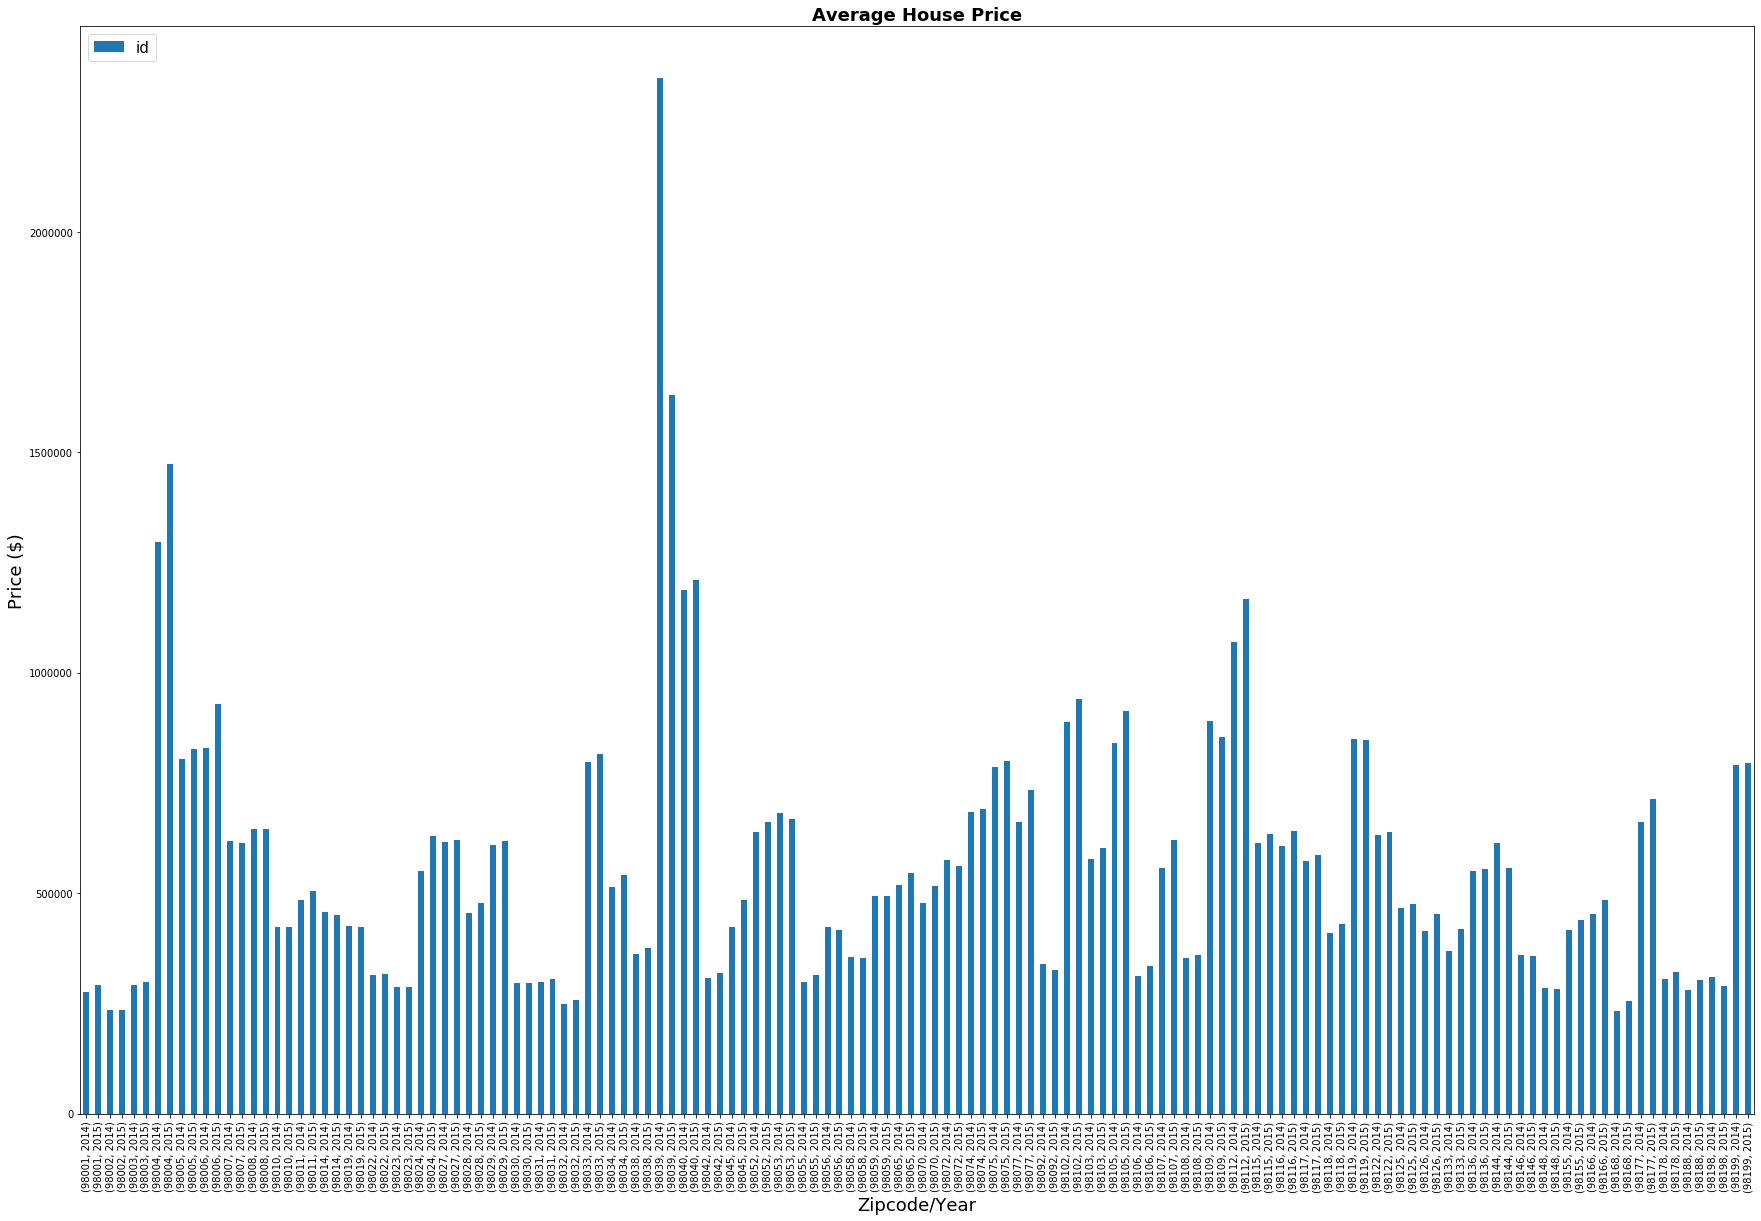

Current size: [30.0, 20.0]


<Figure size 6480x720 with 0 Axes>

In [22]:
housesalebyyearszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode/Year", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodebyyear.png')

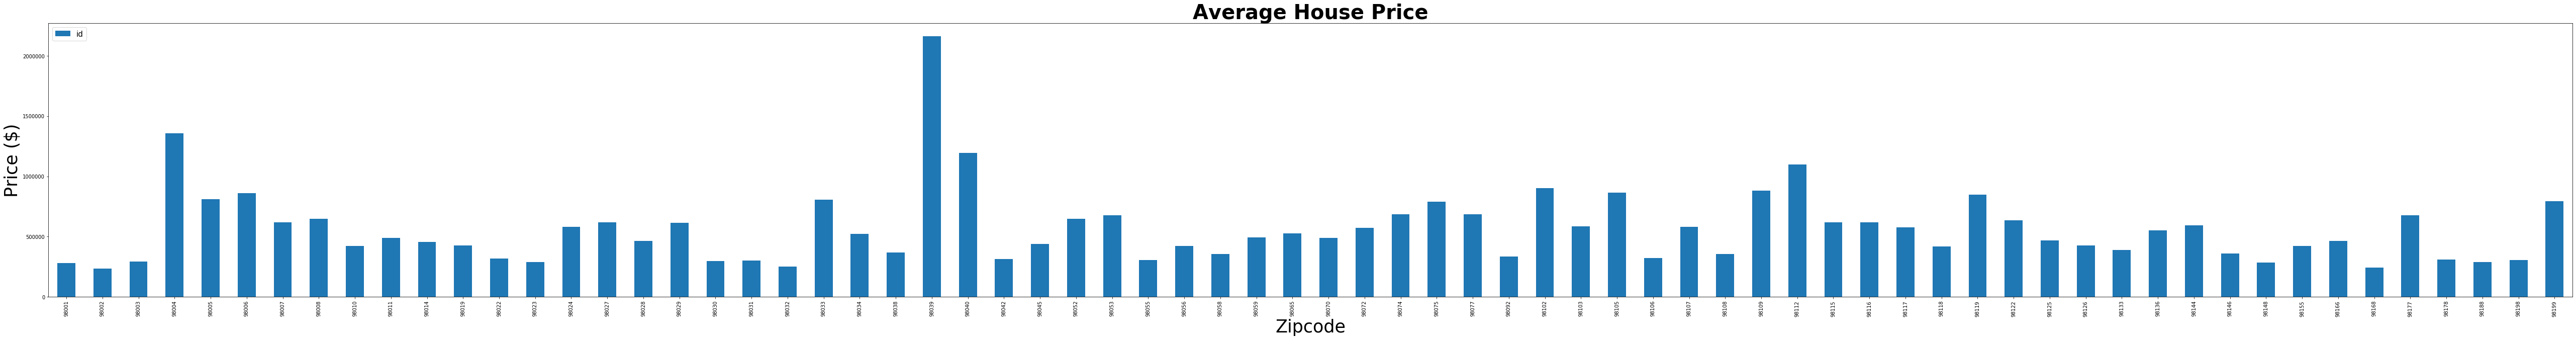

Current size: [90.0, 10.0]


<Figure size 6480x720 with 0 Axes>

In [23]:
byzipcode=df.groupby('zipcode').mean()

byzipcode.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 40, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode", fontdict = {'fontsize': 35})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 35})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodeoverall.png')

In [24]:
weatherdata = pd.read_json('Resources/23075d28543cff25d003a483a55b9d88.json')
weatherdata



city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN  
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN  
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN  
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN  
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN  
...                              ...                          ...  ...  
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN  
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN  
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN  
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN  
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN  

[26277 rows x 9 columns]

In [25]:
date=[]
num = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num))
    sdate = weatherdata['dt_iso'].str.split(" ")[num][0]
    date.append(sdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 554
working on 555
working on 556
working on 557
working on 558
working on 559
working on 560
working on 561
working on 562
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 570
working on 571
working on 572
working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on

working on 1097
working on 1098
working on 1099
working on 1100
working on 1101
working on 1102
working on 1103
working on 1104
working on 1105
working on 1106
working on 1107
working on 1108
working on 1109
working on 1110
working on 1111
working on 1112
working on 1113
working on 1114
working on 1115
working on 1116
working on 1117
working on 1118
working on 1119
working on 1120
working on 1121
working on 1122
working on 1123
working on 1124
working on 1125
working on 1126
working on 1127
working on 1128
working on 1129
working on 1130
working on 1131
working on 1132
working on 1133
working on 1134
working on 1135
working on 1136
working on 1137
working on 1138
working on 1139
working on 1140
working on 1141
working on 1142
working on 1143
working on 1144
working on 1145
working on 1146
working on 1147
working on 1148
working on 1149
working on 1150
working on 1151
working on 1152
working on 1153
working on 1154
working on 1155
working on 1156
working on 1157
working on 1158
working 

working on 1609
working on 1610
working on 1611
working on 1612
working on 1613
working on 1614
working on 1615
working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working on 1643
working on 1644
working on 1645
working on 1646
working on 1647
working on 1648
working on 1649
working on 1650
working on 1651
working on 1652
working on 1653
working on 1654
working on 1655
working on 1656
working on 1657
working on 1658
working on 1659
working on 1660
working on 1661
working on 1662
working on 1663
working on 1664
working on 1665
working on 1666
working on 1667
working on 1668
working on 1669
working on 1670
working 

working on 2124
working on 2125
working on 2126
working on 2127
working on 2128
working on 2129
working on 2130
working on 2131
working on 2132
working on 2133
working on 2134
working on 2135
working on 2136
working on 2137
working on 2138
working on 2139
working on 2140
working on 2141
working on 2142
working on 2143
working on 2144
working on 2145
working on 2146
working on 2147
working on 2148
working on 2149
working on 2150
working on 2151
working on 2152
working on 2153
working on 2154
working on 2155
working on 2156
working on 2157
working on 2158
working on 2159
working on 2160
working on 2161
working on 2162
working on 2163
working on 2164
working on 2165
working on 2166
working on 2167
working on 2168
working on 2169
working on 2170
working on 2171
working on 2172
working on 2173
working on 2174
working on 2175
working on 2176
working on 2177
working on 2178
working on 2179
working on 2180
working on 2181
working on 2182
working on 2183
working on 2184
working on 2185
working 

working on 2640
working on 2641
working on 2642
working on 2643
working on 2644
working on 2645
working on 2646
working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2666
working on 2667
working on 2668
working on 2669
working on 2670
working on 2671
working on 2672
working on 2673
working on 2674
working on 2675
working on 2676
working on 2677
working on 2678
working on 2679
working on 2680
working on 2681
working on 2682
working on 2683
working on 2684
working on 2685
working on 2686
working on 2687
working on 2688
working on 2689
working on 2690
working on 2691
working on 2692
working on 2693
working on 2694
working on 2695
working on 2696
working on 2697
working on 2698
working on 2699
working on 2700
working on 2701
working 

working on 3156
working on 3157
working on 3158
working on 3159
working on 3160
working on 3161
working on 3162
working on 3163
working on 3164
working on 3165
working on 3166
working on 3167
working on 3168
working on 3169
working on 3170
working on 3171
working on 3172
working on 3173
working on 3174
working on 3175
working on 3176
working on 3177
working on 3178
working on 3179
working on 3180
working on 3181
working on 3182
working on 3183
working on 3184
working on 3185
working on 3186
working on 3187
working on 3188
working on 3189
working on 3190
working on 3191
working on 3192
working on 3193
working on 3194
working on 3195
working on 3196
working on 3197
working on 3198
working on 3199
working on 3200
working on 3201
working on 3202
working on 3203
working on 3204
working on 3205
working on 3206
working on 3207
working on 3208
working on 3209
working on 3210
working on 3211
working on 3212
working on 3213
working on 3214
working on 3215
working on 3216
working on 3217
working 

working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working on 3717
working on 3718
working on 3719
working on 3720
working on 3721
working on 3722
working on 3723
working on 3724
working on 3725
working on 3726
working on 3727
working on 3728
working on 3729
working on 3730
working on 3731
working on 3732
working on 3733
working 

working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working on 4241
working on 4242
working on 4243
working on 4244
working on 4245
working on 4246
working on 4247
working on 4248
working 

working on 4703
working on 4704
working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working on 4737
working on 4738
working on 4739
working on 4740
working on 4741
working on 4742
working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working on 4752
working on 4753
working on 4754
working on 4755
working on 4756
working on 4757
working on 4758
working on 4759
working on 4760
working on 4761
working on 4762
working on 4763
working on 4764
working 

working on 5219
working on 5220
working on 5221
working on 5222
working on 5223
working on 5224
working on 5225
working on 5226
working on 5227
working on 5228
working on 5229
working on 5230
working on 5231
working on 5232
working on 5233
working on 5234
working on 5235
working on 5236
working on 5237
working on 5238
working on 5239
working on 5240
working on 5241
working on 5242
working on 5243
working on 5244
working on 5245
working on 5246
working on 5247
working on 5248
working on 5249
working on 5250
working on 5251
working on 5252
working on 5253
working on 5254
working on 5255
working on 5256
working on 5257
working on 5258
working on 5259
working on 5260
working on 5261
working on 5262
working on 5263
working on 5264
working on 5265
working on 5266
working on 5267
working on 5268
working on 5269
working on 5270
working on 5271
working on 5272
working on 5273
working on 5274
working on 5275
working on 5276
working on 5277
working on 5278
working on 5279
working on 5280
working 

working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working on 5777
working on 5778
working on 5779
working on 5780
working on 5781
working on 5782
working on 5783
working on 5784
working on 5785
working on 5786
working on 5787
working on 5788
working on 5789
working on 5790
working on 5791
working on 5792
working on 5793
working on 5794
working on 5795
working 

working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working on 6295
working on 6296
working on 6297
working on 6298
working on 6299
working on 6300
working on 6301
working on 6302
working on 6303
working on 6304
working on 6305
working on 6306
working on 6307
working on 6308
working on 6309
working 

working on 6763
working on 6764
working on 6765
working on 6766
working on 6767
working on 6768
working on 6769
working on 6770
working on 6771
working on 6772
working on 6773
working on 6774
working on 6775
working on 6776
working on 6777
working on 6778
working on 6779
working on 6780
working on 6781
working on 6782
working on 6783
working on 6784
working on 6785
working on 6786
working on 6787
working on 6788
working on 6789
working on 6790
working on 6791
working on 6792
working on 6793
working on 6794
working on 6795
working on 6796
working on 6797
working on 6798
working on 6799
working on 6800
working on 6801
working on 6802
working on 6803
working on 6804
working on 6805
working on 6806
working on 6807
working on 6808
working on 6809
working on 6810
working on 6811
working on 6812
working on 6813
working on 6814
working on 6815
working on 6816
working on 6817
working on 6818
working on 6819
working on 6820
working on 6821
working on 6822
working on 6823
working on 6824
working 

working on 7276
working on 7277
working on 7278
working on 7279
working on 7280
working on 7281
working on 7282
working on 7283
working on 7284
working on 7285
working on 7286
working on 7287
working on 7288
working on 7289
working on 7290
working on 7291
working on 7292
working on 7293
working on 7294
working on 7295
working on 7296
working on 7297
working on 7298
working on 7299
working on 7300
working on 7301
working on 7302
working on 7303
working on 7304
working on 7305
working on 7306
working on 7307
working on 7308
working on 7309
working on 7310
working on 7311
working on 7312
working on 7313
working on 7314
working on 7315
working on 7316
working on 7317
working on 7318
working on 7319
working on 7320
working on 7321
working on 7322
working on 7323
working on 7324
working on 7325
working on 7326
working on 7327
working on 7328
working on 7329
working on 7330
working on 7331
working on 7332
working on 7333
working on 7334
working on 7335
working on 7336
working on 7337
working 

working on 7792
working on 7793
working on 7794
working on 7795
working on 7796
working on 7797
working on 7798
working on 7799
working on 7800
working on 7801
working on 7802
working on 7803
working on 7804
working on 7805
working on 7806
working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working on 7823
working on 7824
working on 7825
working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working on 7848
working on 7849
working on 7850
working on 7851
working on 7852
working on 7853
working 

working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8315
working on 8316
working on 8317
working on 8318
working on 8319
working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325
working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331
working on 8332
working on 8333
working on 8334
working on 8335
working on 8336
working on 8337
working on 8338
working on 8339
working on 8340
working on 8341
working on 8342
working on 8343
working on 8344
working on 8345
working on 8346
working on 8347
working on 8348
working on 8349
working on 8350
working on 8351
working on 8352
working on 8353
working on 8354
working on 8355
working on 8356
working on 8357
working on 8358
working on 8359
working on 8360
working on 8361
working on 8362
working on 8363
working on 8364
working on 8365
working on 8366
working on 8367
working on 8368
working on 8369
working on 8370
working 

working on 8823
working on 8824
working on 8825
working on 8826
working on 8827
working on 8828
working on 8829
working on 8830
working on 8831
working on 8832
working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working on 8852
working on 8853
working on 8854
working on 8855
working on 8856
working on 8857
working on 8858
working on 8859
working on 8860
working on 8861
working on 8862
working on 8863
working on 8864
working on 8865
working on 8866
working on 8867
working on 8868
working on 8869
working on 8870
working on 8871
working on 8872
working on 8873
working on 8874
working on 8875
working on 8876
working on 8877
working on 8878
working on 8879
working on 8880
working on 8881
working on 8882
working on 8883
working on 8884
working 

working on 9340
working on 9341
working on 9342
working on 9343
working on 9344
working on 9345
working on 9346
working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working on 9352
working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working on 9393
working on 9394
working on 9395
working on 9396
working on 9397
working on 9398
working on 9399
working on 9400
working on 9401
working 

working on 9856
working on 9857
working on 9858
working on 9859
working on 9860
working on 9861
working on 9862
working on 9863
working on 9864
working on 9865
working on 9866
working on 9867
working on 9868
working on 9869
working on 9870
working on 9871
working on 9872
working on 9873
working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9879
working on 9880
working on 9881
working on 9882
working on 9883
working on 9884
working on 9885
working on 9886
working on 9887
working on 9888
working on 9889
working on 9890
working on 9891
working on 9892
working on 9893
working on 9894
working on 9895
working on 9896
working on 9897
working on 9898
working on 9899
working on 9900
working on 9901
working on 9902
working on 9903
working on 9904
working on 9905
working on 9906
working on 9907
working on 9908
working on 9909
working on 9910
working on 9911
working on 9912
working on 9913
working on 9914
working on 9915
working on 9916
working on 9917
working 

working on 10350
working on 10351
working on 10352
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 10372
working on 10373
working on 10374
working on 10375
working on 10376
working on 10377
working on 10378
working on 10379
working on 10380
working on 10381
working on 10382
working on 10383
working on 10384
working on 10385
working on 10386
working on 10387
working on 10388
working on 10389
working on 10390
working on 10391
working on 10392
working on 10393
working on 10394
working on 10395
working on 10396
working on 10397
working on 10398
working on 10399
working on 10400
working on 10401
working on 10402
working on 10403
working on 10404
working on 10405
working on 10406
working on 10407
working on 104

working on 10834
working on 10835
working on 10836
working on 10837
working on 10838
working on 10839
working on 10840
working on 10841
working on 10842
working on 10843
working on 10844
working on 10845
working on 10846
working on 10847
working on 10848
working on 10849
working on 10850
working on 10851
working on 10852
working on 10853
working on 10854
working on 10855
working on 10856
working on 10857
working on 10858
working on 10859
working on 10860
working on 10861
working on 10862
working on 10863
working on 10864
working on 10865
working on 10866
working on 10867
working on 10868
working on 10869
working on 10870
working on 10871
working on 10872
working on 10873
working on 10874
working on 10875
working on 10876
working on 10877
working on 10878
working on 10879
working on 10880
working on 10881
working on 10882
working on 10883
working on 10884
working on 10885
working on 10886
working on 10887
working on 10888
working on 10889
working on 10890
working on 10891
working on 108

working on 11318
working on 11319
working on 11320
working on 11321
working on 11322
working on 11323
working on 11324
working on 11325
working on 11326
working on 11327
working on 11328
working on 11329
working on 11330
working on 11331
working on 11332
working on 11333
working on 11334
working on 11335
working on 11336
working on 11337
working on 11338
working on 11339
working on 11340
working on 11341
working on 11342
working on 11343
working on 11344
working on 11345
working on 11346
working on 11347
working on 11348
working on 11349
working on 11350
working on 11351
working on 11352
working on 11353
working on 11354
working on 11355
working on 11356
working on 11357
working on 11358
working on 11359
working on 11360
working on 11361
working on 11362
working on 11363
working on 11364
working on 11365
working on 11366
working on 11367
working on 11368
working on 11369
working on 11370
working on 11371
working on 11372
working on 11373
working on 11374
working on 11375
working on 113

working on 11801
working on 11802
working on 11803
working on 11804
working on 11805
working on 11806
working on 11807
working on 11808
working on 11809
working on 11810
working on 11811
working on 11812
working on 11813
working on 11814
working on 11815
working on 11816
working on 11817
working on 11818
working on 11819
working on 11820
working on 11821
working on 11822
working on 11823
working on 11824
working on 11825
working on 11826
working on 11827
working on 11828
working on 11829
working on 11830
working on 11831
working on 11832
working on 11833
working on 11834
working on 11835
working on 11836
working on 11837
working on 11838
working on 11839
working on 11840
working on 11841
working on 11842
working on 11843
working on 11844
working on 11845
working on 11846
working on 11847
working on 11848
working on 11849
working on 11850
working on 11851
working on 11852
working on 11853
working on 11854
working on 11855
working on 11856
working on 11857
working on 11858
working on 118

working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12305
working on 12306
working on 12307
working on 12308
working on 12309
working on 12310
working on 12311
working on 12312
working on 12313
working on 12314
working on 12315
working on 12316
working on 12317
working on 12318
working on 12319
working on 12320
working on 12321
working on 12322
working on 12323
working on 12324
working on 12325
working on 12326
working on 12327
working on 12328
working on 12329
working on 12330
working on 12331
working on 12332
working on 12333
working on 12334
working on 12335
working on 12336
working on 12337
working on 12338
working on 12339
working on 12340
working on 12341
working on 12342
working on 12343
working on 123

working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 12802
working on 12803
working on 12804
working on 12805
working on 12806
working on 12807
working on 12808
working on 12809
working on 12810
working on 12811
working on 12812
working on 12813
working on 12814
working on 12815
working on 12816
working on 12817
working on 12818
working on 12819
working on 12820
working on 12821
working on 12822
working on 12823
working on 12824
working on 12825
working on 12826
working on 12827
working on 12828
working on 12829
working on 12830
working on 128

working on 13256
working on 13257
working on 13258
working on 13259
working on 13260
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13279
working on 13280
working on 13281
working on 13282
working on 13283
working on 13284
working on 13285
working on 13286
working on 13287
working on 13288
working on 13289
working on 13290
working on 13291
working on 13292
working on 13293
working on 13294
working on 13295
working on 13296
working on 13297
working on 13298
working on 13299
working on 13300
working on 13301
working on 13302
working on 13303
working on 13304
working on 13305
working on 13306
working on 13307
working on 13308
working on 13309
working on 13310
working on 13311
working on 13312
working on 13313
working on 133

working on 13742
working on 13743
working on 13744
working on 13745
working on 13746
working on 13747
working on 13748
working on 13749
working on 13750
working on 13751
working on 13752
working on 13753
working on 13754
working on 13755
working on 13756
working on 13757
working on 13758
working on 13759
working on 13760
working on 13761
working on 13762
working on 13763
working on 13764
working on 13765
working on 13766
working on 13767
working on 13768
working on 13769
working on 13770
working on 13771
working on 13772
working on 13773
working on 13774
working on 13775
working on 13776
working on 13777
working on 13778
working on 13779
working on 13780
working on 13781
working on 13782
working on 13783
working on 13784
working on 13785
working on 13786
working on 13787
working on 13788
working on 13789
working on 13790
working on 13791
working on 13792
working on 13793
working on 13794
working on 13795
working on 13796
working on 13797
working on 13798
working on 13799
working on 138

working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248
working on 14249
working on 14250
working on 14251
working on 14252
working on 14253
working on 14254
working on 14255
working on 14256
working on 14257
working on 14258
working on 14259
working on 14260
working on 14261
working on 14262
working on 14263
working on 14264
working on 14265
working on 14266
working on 14267
working on 14268
working on 14269
working on 14270
working on 14271
working on 14272
working on 14273
working on 14274
working on 14275
working on 14276
working on 14277
working on 14278
working on 14279
working on 14280
working on 14281
working on 14282
working on 14283
working on 14284
working on 142

working on 14709
working on 14710
working on 14711
working on 14712
working on 14713
working on 14714
working on 14715
working on 14716
working on 14717
working on 14718
working on 14719
working on 14720
working on 14721
working on 14722
working on 14723
working on 14724
working on 14725
working on 14726
working on 14727
working on 14728
working on 14729
working on 14730
working on 14731
working on 14732
working on 14733
working on 14734
working on 14735
working on 14736
working on 14737
working on 14738
working on 14739
working on 14740
working on 14741
working on 14742
working on 14743
working on 14744
working on 14745
working on 14746
working on 14747
working on 14748
working on 14749
working on 14750
working on 14751
working on 14752
working on 14753
working on 14754
working on 14755
working on 14756
working on 14757
working on 14758
working on 14759
working on 14760
working on 14761
working on 14762
working on 14763
working on 14764
working on 14765
working on 14766
working on 147

working on 15192
working on 15193
working on 15194
working on 15195
working on 15196
working on 15197
working on 15198
working on 15199
working on 15200
working on 15201
working on 15202
working on 15203
working on 15204
working on 15205
working on 15206
working on 15207
working on 15208
working on 15209
working on 15210
working on 15211
working on 15212
working on 15213
working on 15214
working on 15215
working on 15216
working on 15217
working on 15218
working on 15219
working on 15220
working on 15221
working on 15222
working on 15223
working on 15224
working on 15225
working on 15226
working on 15227
working on 15228
working on 15229
working on 15230
working on 15231
working on 15232
working on 15233
working on 15234
working on 15235
working on 15236
working on 15237
working on 15238
working on 15239
working on 15240
working on 15241
working on 15242
working on 15243
working on 15244
working on 15245
working on 15246
working on 15247
working on 15248
working on 15249
working on 152

working on 15676
working on 15677
working on 15678
working on 15679
working on 15680
working on 15681
working on 15682
working on 15683
working on 15684
working on 15685
working on 15686
working on 15687
working on 15688
working on 15689
working on 15690
working on 15691
working on 15692
working on 15693
working on 15694
working on 15695
working on 15696
working on 15697
working on 15698
working on 15699
working on 15700
working on 15701
working on 15702
working on 15703
working on 15704
working on 15705
working on 15706
working on 15707
working on 15708
working on 15709
working on 15710
working on 15711
working on 15712
working on 15713
working on 15714
working on 15715
working on 15716
working on 15717
working on 15718
working on 15719
working on 15720
working on 15721
working on 15722
working on 15723
working on 15724
working on 15725
working on 15726
working on 15727
working on 15728
working on 15729
working on 15730
working on 15731
working on 15732
working on 15733
working on 157

working on 16157
working on 16158
working on 16159
working on 16160
working on 16161
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 16179
working on 16180
working on 16181
working on 16182
working on 16183
working on 16184
working on 16185
working on 16186
working on 16187
working on 16188
working on 16189
working on 16190
working on 16191
working on 16192
working on 16193
working on 16194
working on 16195
working on 16196
working on 16197
working on 16198
working on 16199
working on 16200
working on 16201
working on 16202
working on 16203
working on 16204
working on 16205
working on 16206
working on 16207
working on 16208
working on 16209
working on 16210
working on 16211
working on 16212
working on 16213
working on 16214
working on 162

working on 16643
working on 16644
working on 16645
working on 16646
working on 16647
working on 16648
working on 16649
working on 16650
working on 16651
working on 16652
working on 16653
working on 16654
working on 16655
working on 16656
working on 16657
working on 16658
working on 16659
working on 16660
working on 16661
working on 16662
working on 16663
working on 16664
working on 16665
working on 16666
working on 16667
working on 16668
working on 16669
working on 16670
working on 16671
working on 16672
working on 16673
working on 16674
working on 16675
working on 16676
working on 16677
working on 16678
working on 16679
working on 16680
working on 16681
working on 16682
working on 16683
working on 16684
working on 16685
working on 16686
working on 16687
working on 16688
working on 16689
working on 16690
working on 16691
working on 16692
working on 16693
working on 16694
working on 16695
working on 16696
working on 16697
working on 16698
working on 16699
working on 16700
working on 167

working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17148
working on 17149
working on 17150
working on 17151
working on 17152
working on 17153
working on 17154
working on 17155
working on 17156
working on 17157
working on 17158
working on 17159
working on 17160
working on 17161
working on 17162
working on 17163
working on 17164
working on 17165
working on 17166
working on 17167
working on 17168
working on 17169
working on 17170
working on 17171
working on 17172
working on 17173
working on 17174
working on 17175
working on 17176
working on 17177
working on 17178
working on 17179
working on 17180
working on 17181
working on 17182
working on 17183
working on 17184
working on 17185
working on 17186
working on 171

working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17636
working on 17637
working on 17638
working on 17639
working on 17640
working on 17641
working on 17642
working on 17643
working on 17644
working on 17645
working on 17646
working on 17647
working on 17648
working on 17649
working on 17650
working on 17651
working on 17652
working on 17653
working on 17654
working on 17655
working on 17656
working on 17657
working on 17658
working on 17659
working on 17660
working on 17661
working on 17662
working on 17663
working on 17664
working on 17665
working on 17666
working on 17667
working on 17668
working on 17669
working on 17670
working on 17671
working on 176

working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 18132
working on 18133
working on 18134
working on 18135
working on 18136
working on 18137
working on 18138
working on 18139
working on 18140
working on 18141
working on 18142
working on 18143
working on 18144
working on 18145
working on 18146
working on 18147
working on 18148
working on 18149
working on 18150
working on 18151
working on 18152
working on 18153
working on 18154
working on 18155
working on 18156
working on 181

working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 18634
working on 18635
working on 18636
working on 18637
working on 18638
working on 18639
working on 18640
working on 18641
working on 186

working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 19091
working on 19092
working on 19093
working on 19094
working on 19095
working on 19096
working on 19097
working on 19098
working on 19099
working on 19100
working on 19101
working on 19102
working on 19103
working on 19104
working on 19105
working on 19106
working on 19107
working on 19108
working on 19109
working on 19110
working on 19111
working on 19112
working on 19113
working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 19120
working on 19121
working on 19122
working on 19123
working on 19124
working on 19125
working on 191

working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 19575
working on 19576
working on 19577
working on 19578
working on 19579
working on 19580
working on 19581
working on 19582
working on 19583
working on 19584
working on 19585
working on 19586
working on 19587
working on 19588
working on 19589
working on 19590
working on 19591
working on 19592
working on 19593
working on 19594
working on 19595
working on 19596
working on 19597
working on 19598
working on 19599
working on 19600
working on 19601
working on 19602
working on 19603
working on 19604
working on 19605
working on 19606
working on 19607
working on 19608
working on 196

working on 20036
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20043
working on 20044
working on 20045
working on 20046
working on 20047
working on 20048
working on 20049
working on 20050
working on 20051
working on 20052
working on 20053
working on 20054
working on 20055
working on 20056
working on 20057
working on 20058
working on 20059
working on 20060
working on 20061
working on 20062
working on 20063
working on 20064
working on 20065
working on 20066
working on 20067
working on 20068
working on 20069
working on 20070
working on 20071
working on 20072
working on 20073
working on 20074
working on 20075
working on 20076
working on 20077
working on 20078
working on 20079
working on 20080
working on 20081
working on 20082
working on 20083
working on 20084
working on 20085
working on 20086
working on 20087
working on 20088
working on 20089
working on 20090
working on 20091
working on 20092
working on 20093
working on 200

working on 20521
working on 20522
working on 20523
working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20531
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20538
working on 20539
working on 20540
working on 20541
working on 20542
working on 20543
working on 20544
working on 20545
working on 20546
working on 20547
working on 20548
working on 20549
working on 20550
working on 20551
working on 20552
working on 20553
working on 20554
working on 20555
working on 20556
working on 20557
working on 20558
working on 20559
working on 20560
working on 20561
working on 20562
working on 20563
working on 20564
working on 20565
working on 20566
working on 20567
working on 20568
working on 20569
working on 20570
working on 20571
working on 20572
working on 20573
working on 20574
working on 20575
working on 20576
working on 20577
working on 20578
working on 205

working on 21006
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21013
working on 21014
working on 21015
working on 21016
working on 21017
working on 21018
working on 21019
working on 21020
working on 21021
working on 21022
working on 21023
working on 21024
working on 21025
working on 21026
working on 21027
working on 21028
working on 21029
working on 21030
working on 21031
working on 21032
working on 21033
working on 21034
working on 21035
working on 21036
working on 21037
working on 21038
working on 21039
working on 21040
working on 21041
working on 21042
working on 21043
working on 21044
working on 21045
working on 21046
working on 21047
working on 21048
working on 21049
working on 21050
working on 21051
working on 21052
working on 21053
working on 21054
working on 21055
working on 21056
working on 21057
working on 21058
working on 21059
working on 21060
working on 21061
working on 21062
working on 21063
working on 210

working on 21488
working on 21489
working on 21490
working on 21491
working on 21492
working on 21493
working on 21494
working on 21495
working on 21496
working on 21497
working on 21498
working on 21499
working on 21500
working on 21501
working on 21502
working on 21503
working on 21504
working on 21505
working on 21506
working on 21507
working on 21508
working on 21509
working on 21510
working on 21511
working on 21512
working on 21513
working on 21514
working on 21515
working on 21516
working on 21517
working on 21518
working on 21519
working on 21520
working on 21521
working on 21522
working on 21523
working on 21524
working on 21525
working on 21526
working on 21527
working on 21528
working on 21529
working on 21530
working on 21531
working on 21532
working on 21533
working on 21534
working on 21535
working on 21536
working on 21537
working on 21538
working on 21539
working on 21540
working on 21541
working on 21542
working on 21543
working on 21544
working on 21545
working on 215

working on 21970
working on 21971
working on 21972
working on 21973
working on 21974
working on 21975
working on 21976
working on 21977
working on 21978
working on 21979
working on 21980
working on 21981
working on 21982
working on 21983
working on 21984
working on 21985
working on 21986
working on 21987
working on 21988
working on 21989
working on 21990
working on 21991
working on 21992
working on 21993
working on 21994
working on 21995
working on 21996
working on 21997
working on 21998
working on 21999
working on 22000
working on 22001
working on 22002
working on 22003
working on 22004
working on 22005
working on 22006
working on 22007
working on 22008
working on 22009
working on 22010
working on 22011
working on 22012
working on 22013
working on 22014
working on 22015
working on 22016
working on 22017
working on 22018
working on 22019
working on 22020
working on 22021
working on 22022
working on 22023
working on 22024
working on 22025
working on 22026
working on 22027
working on 220

working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 22477
working on 22478
working on 22479
working on 22480
working on 22481
working on 22482
working on 22483
working on 22484
working on 22485
working on 22486
working on 22487
working on 22488
working on 22489
working on 22490
working on 22491
working on 22492
working on 22493
working on 22494
working on 22495
working on 22496
working on 22497
working on 22498
working on 22499
working on 22500
working on 22501
working on 22502
working on 22503
working on 22504
working on 22505
working on 22506
working on 22507
working on 22508
working on 225

working on 22935
working on 22936
working on 22937
working on 22938
working on 22939
working on 22940
working on 22941
working on 22942
working on 22943
working on 22944
working on 22945
working on 22946
working on 22947
working on 22948
working on 22949
working on 22950
working on 22951
working on 22952
working on 22953
working on 22954
working on 22955
working on 22956
working on 22957
working on 22958
working on 22959
working on 22960
working on 22961
working on 22962
working on 22963
working on 22964
working on 22965
working on 22966
working on 22967
working on 22968
working on 22969
working on 22970
working on 22971
working on 22972
working on 22973
working on 22974
working on 22975
working on 22976
working on 22977
working on 22978
working on 22979
working on 22980
working on 22981
working on 22982
working on 22983
working on 22984
working on 22985
working on 22986
working on 22987
working on 22988
working on 22989
working on 22990
working on 22991
working on 22992
working on 229

working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432
working on 23433
working on 23434
working on 23435
working on 23436
working on 23437
working on 23438
working on 23439
working on 23440
working on 23441
working on 23442
working on 23443
working on 23444
working on 23445
working on 23446
working on 23447
working on 23448
working on 23449
working on 23450
working on 23451
working on 23452
working on 23453
working on 23454
working on 23455
working on 23456
working on 23457
working on 23458
working on 23459
working on 23460
working on 23461
working on 23462
working on 23463
working on 23464
working on 23465
working on 23466
working on 23467
working on 23468
working on 23469
working on 23470
working on 23471
working on 23472
working on 23473
working on 23474
working on 23475
working on 23476
working on 23477
working on 234

working on 23904
working on 23905
working on 23906
working on 23907
working on 23908
working on 23909
working on 23910
working on 23911
working on 23912
working on 23913
working on 23914
working on 23915
working on 23916
working on 23917
working on 23918
working on 23919
working on 23920
working on 23921
working on 23922
working on 23923
working on 23924
working on 23925
working on 23926
working on 23927
working on 23928
working on 23929
working on 23930
working on 23931
working on 23932
working on 23933
working on 23934
working on 23935
working on 23936
working on 23937
working on 23938
working on 23939
working on 23940
working on 23941
working on 23942
working on 23943
working on 23944
working on 23945
working on 23946
working on 23947
working on 23948
working on 23949
working on 23950
working on 23951
working on 23952
working on 23953
working on 23954
working on 23955
working on 23956
working on 23957
working on 23958
working on 23959
working on 23960
working on 23961
working on 239

working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 24401
working on 24402
working on 24403
working on 24404
working on 24405
working on 24406
working on 24407
working on 24408
working on 24409
working on 24410
working on 24411
working on 24412
working on 24413
working on 24414
working on 24415
working on 24416
working on 24417
working on 24418
working on 24419
working on 24420
working on 24421
working on 24422
working on 24423
working on 24424
working on 24425
working on 24426
working on 24427
working on 24428
working on 24429
working on 24430
working on 24431
working on 24432
working on 24433
working on 24434
working on 24435
working on 24436
working on 24437
working on 24438
working on 24439
working on 24440
working on 24441
working on 24442
working on 24443
working on 24444
working on 24445
working on 24446
working on 24447
working on 244

working on 24872
working on 24873
working on 24874
working on 24875
working on 24876
working on 24877
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24883
working on 24884
working on 24885
working on 24886
working on 24887
working on 24888
working on 24889
working on 24890
working on 24891
working on 24892
working on 24893
working on 24894
working on 24895
working on 24896
working on 24897
working on 24898
working on 24899
working on 24900
working on 24901
working on 24902
working on 24903
working on 24904
working on 24905
working on 24906
working on 24907
working on 24908
working on 24909
working on 24910
working on 24911
working on 24912
working on 24913
working on 24914
working on 24915
working on 24916
working on 24917
working on 24918
working on 24919
working on 24920
working on 24921
working on 24922
working on 24923
working on 24924
working on 24925
working on 24926
working on 24927
working on 24928
working on 24929
working on 249

working on 25354
working on 25355
working on 25356
working on 25357
working on 25358
working on 25359
working on 25360
working on 25361
working on 25362
working on 25363
working on 25364
working on 25365
working on 25366
working on 25367
working on 25368
working on 25369
working on 25370
working on 25371
working on 25372
working on 25373
working on 25374
working on 25375
working on 25376
working on 25377
working on 25378
working on 25379
working on 25380
working on 25381
working on 25382
working on 25383
working on 25384
working on 25385
working on 25386
working on 25387
working on 25388
working on 25389
working on 25390
working on 25391
working on 25392
working on 25393
working on 25394
working on 25395
working on 25396
working on 25397
working on 25398
working on 25399
working on 25400
working on 25401
working on 25402
working on 25403
working on 25404
working on 25405
working on 25406
working on 25407
working on 25408
working on 25409
working on 25410
working on 25411
working on 254

working on 25838
working on 25839
working on 25840
working on 25841
working on 25842
working on 25843
working on 25844
working on 25845
working on 25846
working on 25847
working on 25848
working on 25849
working on 25850
working on 25851
working on 25852
working on 25853
working on 25854
working on 25855
working on 25856
working on 25857
working on 25858
working on 25859
working on 25860
working on 25861
working on 25862
working on 25863
working on 25864
working on 25865
working on 25866
working on 25867
working on 25868
working on 25869
working on 25870
working on 25871
working on 25872
working on 25873
working on 25874
working on 25875
working on 25876
working on 25877
working on 25878
working on 25879
working on 25880
working on 25881
working on 25882
working on 25883
working on 25884
working on 25885
working on 25886
working on 25887
working on 25888
working on 25889
working on 25890
working on 25891
working on 25892
working on 25893
working on 25894
working on 25895
working on 258

In [26]:
weatherdata['date']= date
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  
0      2013-01-01  
1      2013-01-01  
2      2013-01-01  
3      2013-01-01  
4      2013-01-01  
...           ...  
26272  2015-12-31  
26273  2015-12-31  
26274  2015-12-31  
26275  2015-12-31  
26276  2016-01-01  

[26277 rows x 10 columns]

In [27]:
weatherdata.sort_values('date')


city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
23     5799783  {'temp': 276.67, 'temp_min': 275.37, 'temp_max...   
22     5799783  {'temp': 275.94, 'temp_min': 270.93, 'temp_max...   
21     5799783  {'temp': 275.66, 'temp_min': 272.04, 'temp_max...   
20     5799783  {'temp': 275.39, 'temp_min': 272.04, 'temp_max...   
...        ...                                                ...   
26253  5799783  {'temp': 273.1445, 'temp_min': 273.1445, 'temp...   
26252  5799783  {'temp': 277.51, 'temp_min': 275.15, 'temp_max...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26263  5799783  {'temp': 270.22, 'temp_min': 266.15, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
23     {'speed': 1, 'deg': 320}  {'all': 90}   
22       {'speed': 0, 'deg': 0}  {'all': 75}   
21     {'speed': 1, 'deg': 290}  {'all': 90}   
20       {'speed': 0, 'deg': 0}   {'all': 1}   
...                         ...          ...   
26253   {'speed': 0, 'deg': 85}   {'all': 0}   
26252   {'speed': 0, 'deg': 86}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26263   {'speed': 0, 'deg': 96}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
23     [{'id': 804, 'main': 'Clouds', 'description': ...  1357081200   
22     [{'id': 803, 'main': 'Clouds', 'description': ...  1357077600   
21     [{'id': 804, 'main': 'Clouds', 'description': ...  1357074000   
20     [{'id': 800, 'main': 'Clear', 'description': '...  1357070400   
...                                                  ...         ...   
26253  [{'id': 800, 'main': 'Clear', 'description': '...  1451523600   
26252  [{'id': 800, 'main': 'Clear', 'description': '...  1451520000   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26263  [{'id': 800, 'main': 'Clear', 'description': '...  1451559600   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso       rain       snow        date  
0      2013-01-01 00:00:00 +0000 UTC        NaN        NaN  2013-01-01  
23     2013-01-01 23:00:00 +0000 UTC        NaN        NaN  2013-01-01  
22     2013-01-01 22:00:00 +0000 UTC        NaN        NaN  2013-01-01  
21     2013-01-01 21:00:00 +0000 UTC        NaN        NaN  2013-01-01  
20     2013-01-01 20:00:00 +0000 UTC        NaN        NaN  2013-01-01  
...                              ...        ...        ...         ...  
26253  2015-12-31 01:00:00 +0000 UTC  {'3h': 0}  {'3h': 0}  2015-12-31  
26252  2015-12-31 00:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26275  2015-12-31 23:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26263  2015-12-31 11:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26276  2016-01-01 00:00:00 +0000 UTC        NaN        NaN  2016-01-01  

[26277 rows x 10 columns]

In [28]:
temp=[]
humidity=[]
windspeed = []
clouds = []
weathercondition =[]

num1 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num1))
    stemp = weatherdata['main'][num1]['temp']
    shumidity = weatherdata['main'][num1]['humidity']
    swind = weatherdata['wind'][num1]['speed']
    sclouds = weatherdata['clouds'][num1]['all']
    sweathercondition = weatherdata['weather'][num1][0]['main']
    temp.append(stemp)
    humidity.append(shumidity)
    windspeed.append(swind)
    clouds.append(sclouds)
    weathercondition.append(sweathercondition)
    num1 = num1 + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on

working on 1304
working on 1305
working on 1306
working on 1307
working on 1308
working on 1309
working on 1310
working on 1311
working on 1312
working on 1313
working on 1314
working on 1315
working on 1316
working on 1317
working on 1318
working on 1319
working on 1320
working on 1321
working on 1322
working on 1323
working on 1324
working on 1325
working on 1326
working on 1327
working on 1328
working on 1329
working on 1330
working on 1331
working on 1332
working on 1333
working on 1334
working on 1335
working on 1336
working on 1337
working on 1338
working on 1339
working on 1340
working on 1341
working on 1342
working on 1343
working on 1344
working on 1345
working on 1346
working on 1347
working on 1348
working on 1349
working on 1350
working on 1351
working on 1352
working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working 

working on 1948
working on 1949
working on 1950
working on 1951
working on 1952
working on 1953
working on 1954
working on 1955
working on 1956
working on 1957
working on 1958
working on 1959
working on 1960
working on 1961
working on 1962
working on 1963
working on 1964
working on 1965
working on 1966
working on 1967
working on 1968
working on 1969
working on 1970
working on 1971
working on 1972
working on 1973
working on 1974
working on 1975
working on 1976
working on 1977
working on 1978
working on 1979
working on 1980
working on 1981
working on 1982
working on 1983
working on 1984
working on 1985
working on 1986
working on 1987
working on 1988
working on 1989
working on 1990
working on 1991
working on 1992
working on 1993
working on 1994
working on 1995
working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working 

working on 2723
working on 2724
working on 2725
working on 2726
working on 2727
working on 2728
working on 2729
working on 2730
working on 2731
working on 2732
working on 2733
working on 2734
working on 2735
working on 2736
working on 2737
working on 2738
working on 2739
working on 2740
working on 2741
working on 2742
working on 2743
working on 2744
working on 2745
working on 2746
working on 2747
working on 2748
working on 2749
working on 2750
working on 2751
working on 2752
working on 2753
working on 2754
working on 2755
working on 2756
working on 2757
working on 2758
working on 2759
working on 2760
working on 2761
working on 2762
working on 2763
working on 2764
working on 2765
working on 2766
working on 2767
working on 2768
working on 2769
working on 2770
working on 2771
working on 2772
working on 2773
working on 2774
working on 2775
working on 2776
working on 2777
working on 2778
working on 2779
working on 2780
working on 2781
working on 2782
working on 2783
working on 2784
working 

working on 3431
working on 3432
working on 3433
working on 3434
working on 3435
working on 3436
working on 3437
working on 3438
working on 3439
working on 3440
working on 3441
working on 3442
working on 3443
working on 3444
working on 3445
working on 3446
working on 3447
working on 3448
working on 3449
working on 3450
working on 3451
working on 3452
working on 3453
working on 3454
working on 3455
working on 3456
working on 3457
working on 3458
working on 3459
working on 3460
working on 3461
working on 3462
working on 3463
working on 3464
working on 3465
working on 3466
working on 3467
working on 3468
working on 3469
working on 3470
working on 3471
working on 3472
working on 3473
working on 3474
working on 3475
working on 3476
working on 3477
working on 3478
working on 3479
working on 3480
working on 3481
working on 3482
working on 3483
working on 3484
working on 3485
working on 3486
working on 3487
working on 3488
working on 3489
working on 3490
working on 3491
working on 3492
working 

working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working on 4241
working on 4242
working on 4243
working on 4244
working on 4245
working on 4246
working on 4247
working on 4248
working on 4249
working on 4250
working on 4251
working on 4252
working on 4253
working on 4254
working on 4255
working on 4256
working on 4257
working on 4258
working on 4259
working on 4260
working on 4261
working on 4262
working on 4263
working on 4264
working on 4265
working on 4266
working on 4267
working on 4268
working on 4269
working on 4270
working on 4271
working on 4272
working on 4273
working on 4274
working on 4275
working 

working on 5017
working on 5018
working on 5019
working on 5020
working on 5021
working on 5022
working on 5023
working on 5024
working on 5025
working on 5026
working on 5027
working on 5028
working on 5029
working on 5030
working on 5031
working on 5032
working on 5033
working on 5034
working on 5035
working on 5036
working on 5037
working on 5038
working on 5039
working on 5040
working on 5041
working on 5042
working on 5043
working on 5044
working on 5045
working on 5046
working on 5047
working on 5048
working on 5049
working on 5050
working on 5051
working on 5052
working on 5053
working on 5054
working on 5055
working on 5056
working on 5057
working on 5058
working on 5059
working on 5060
working on 5061
working on 5062
working on 5063
working on 5064
working on 5065
working on 5066
working on 5067
working on 5068
working on 5069
working on 5070
working on 5071
working on 5072
working on 5073
working on 5074
working on 5075
working on 5076
working on 5077
working on 5078
working 

working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working on 5777
working on 5778
working on 5779
working on 5780
working on 5781
working on 5782
working on 5783
working on 5784
working on 5785
working on 5786
working on 5787
working on 5788
working on 5789
working on 5790
working on 5791
working on 5792
working on 5793
working on 5794
working on 5795
working on 5796
working on 5797
working on 5798
working on 5799
working on 5800
working on 5801
working on 5802
working on 5803
working on 5804
working on 5805
working on 5806
working on 5807
working on 5808
working on 5809
working on 5810
working on 5811
working on 5812
working on 5813
working on 5814
working 

working on 6333
working on 6334
working on 6335
working on 6336
working on 6337
working on 6338
working on 6339
working on 6340
working on 6341
working on 6342
working on 6343
working on 6344
working on 6345
working on 6346
working on 6347
working on 6348
working on 6349
working on 6350
working on 6351
working on 6352
working on 6353
working on 6354
working on 6355
working on 6356
working on 6357
working on 6358
working on 6359
working on 6360
working on 6361
working on 6362
working on 6363
working on 6364
working on 6365
working on 6366
working on 6367
working on 6368
working on 6369
working on 6370
working on 6371
working on 6372
working on 6373
working on 6374
working on 6375
working on 6376
working on 6377
working on 6378
working on 6379
working on 6380
working on 6381
working on 6382
working on 6383
working on 6384
working on 6385
working on 6386
working on 6387
working on 6388
working on 6389
working on 6390
working on 6391
working on 6392
working on 6393
working on 6394
working 

working on 6902
working on 6903
working on 6904
working on 6905
working on 6906
working on 6907
working on 6908
working on 6909
working on 6910
working on 6911
working on 6912
working on 6913
working on 6914
working on 6915
working on 6916
working on 6917
working on 6918
working on 6919
working on 6920
working on 6921
working on 6922
working on 6923
working on 6924
working on 6925
working on 6926
working on 6927
working on 6928
working on 6929
working on 6930
working on 6931
working on 6932
working on 6933
working on 6934
working on 6935
working on 6936
working on 6937
working on 6938
working on 6939
working on 6940
working on 6941
working on 6942
working on 6943
working on 6944
working on 6945
working on 6946
working on 6947
working on 6948
working on 6949
working on 6950
working on 6951
working on 6952
working on 6953
working on 6954
working on 6955
working on 6956
working on 6957
working on 6958
working on 6959
working on 6960
working on 6961
working on 6962
working on 6963
working 

working on 7654
working on 7655
working on 7656
working on 7657
working on 7658
working on 7659
working on 7660
working on 7661
working on 7662
working on 7663
working on 7664
working on 7665
working on 7666
working on 7667
working on 7668
working on 7669
working on 7670
working on 7671
working on 7672
working on 7673
working on 7674
working on 7675
working on 7676
working on 7677
working on 7678
working on 7679
working on 7680
working on 7681
working on 7682
working on 7683
working on 7684
working on 7685
working on 7686
working on 7687
working on 7688
working on 7689
working on 7690
working on 7691
working on 7692
working on 7693
working on 7694
working on 7695
working on 7696
working on 7697
working on 7698
working on 7699
working on 7700
working on 7701
working on 7702
working on 7703
working on 7704
working on 7705
working on 7706
working on 7707
working on 7708
working on 7709
working on 7710
working on 7711
working on 7712
working on 7713
working on 7714
working on 7715
working 

working on 8207
working on 8208
working on 8209
working on 8210
working on 8211
working on 8212
working on 8213
working on 8214
working on 8215
working on 8216
working on 8217
working on 8218
working on 8219
working on 8220
working on 8221
working on 8222
working on 8223
working on 8224
working on 8225
working on 8226
working on 8227
working on 8228
working on 8229
working on 8230
working on 8231
working on 8232
working on 8233
working on 8234
working on 8235
working on 8236
working on 8237
working on 8238
working on 8239
working on 8240
working on 8241
working on 8242
working on 8243
working on 8244
working on 8245
working on 8246
working on 8247
working on 8248
working on 8249
working on 8250
working on 8251
working on 8252
working on 8253
working on 8254
working on 8255
working on 8256
working on 8257
working on 8258
working on 8259
working on 8260
working on 8261
working on 8262
working on 8263
working on 8264
working on 8265
working on 8266
working on 8267
working on 8268
working 

working on 9010
working on 9011
working on 9012
working on 9013
working on 9014
working on 9015
working on 9016
working on 9017
working on 9018
working on 9019
working on 9020
working on 9021
working on 9022
working on 9023
working on 9024
working on 9025
working on 9026
working on 9027
working on 9028
working on 9029
working on 9030
working on 9031
working on 9032
working on 9033
working on 9034
working on 9035
working on 9036
working on 9037
working on 9038
working on 9039
working on 9040
working on 9041
working on 9042
working on 9043
working on 9044
working on 9045
working on 9046
working on 9047
working on 9048
working on 9049
working on 9050
working on 9051
working on 9052
working on 9053
working on 9054
working on 9055
working on 9056
working on 9057
working on 9058
working on 9059
working on 9060
working on 9061
working on 9062
working on 9063
working on 9064
working on 9065
working on 9066
working on 9067
working on 9068
working on 9069
working on 9070
working on 9071
working 

working on 9753
working on 9754
working on 9755
working on 9756
working on 9757
working on 9758
working on 9759
working on 9760
working on 9761
working on 9762
working on 9763
working on 9764
working on 9765
working on 9766
working on 9767
working on 9768
working on 9769
working on 9770
working on 9771
working on 9772
working on 9773
working on 9774
working on 9775
working on 9776
working on 9777
working on 9778
working on 9779
working on 9780
working on 9781
working on 9782
working on 9783
working on 9784
working on 9785
working on 9786
working on 9787
working on 9788
working on 9789
working on 9790
working on 9791
working on 9792
working on 9793
working on 9794
working on 9795
working on 9796
working on 9797
working on 9798
working on 9799
working on 9800
working on 9801
working on 9802
working on 9803
working on 9804
working on 9805
working on 9806
working on 9807
working on 9808
working on 9809
working on 9810
working on 9811
working on 9812
working on 9813
working on 9814
working 

working on 10483
working on 10484
working on 10485
working on 10486
working on 10487
working on 10488
working on 10489
working on 10490
working on 10491
working on 10492
working on 10493
working on 10494
working on 10495
working on 10496
working on 10497
working on 10498
working on 10499
working on 10500
working on 10501
working on 10502
working on 10503
working on 10504
working on 10505
working on 10506
working on 10507
working on 10508
working on 10509
working on 10510
working on 10511
working on 10512
working on 10513
working on 10514
working on 10515
working on 10516
working on 10517
working on 10518
working on 10519
working on 10520
working on 10521
working on 10522
working on 10523
working on 10524
working on 10525
working on 10526
working on 10527
working on 10528
working on 10529
working on 10530
working on 10531
working on 10532
working on 10533
working on 10534
working on 10535
working on 10536
working on 10537
working on 10538
working on 10539
working on 10540
working on 105

working on 11039
working on 11040
working on 11041
working on 11042
working on 11043
working on 11044
working on 11045
working on 11046
working on 11047
working on 11048
working on 11049
working on 11050
working on 11051
working on 11052
working on 11053
working on 11054
working on 11055
working on 11056
working on 11057
working on 11058
working on 11059
working on 11060
working on 11061
working on 11062
working on 11063
working on 11064
working on 11065
working on 11066
working on 11067
working on 11068
working on 11069
working on 11070
working on 11071
working on 11072
working on 11073
working on 11074
working on 11075
working on 11076
working on 11077
working on 11078
working on 11079
working on 11080
working on 11081
working on 11082
working on 11083
working on 11084
working on 11085
working on 11086
working on 11087
working on 11088
working on 11089
working on 11090
working on 11091
working on 11092
working on 11093
working on 11094
working on 11095
working on 11096
working on 110

working on 11573
working on 11574
working on 11575
working on 11576
working on 11577
working on 11578
working on 11579
working on 11580
working on 11581
working on 11582
working on 11583
working on 11584
working on 11585
working on 11586
working on 11587
working on 11588
working on 11589
working on 11590
working on 11591
working on 11592
working on 11593
working on 11594
working on 11595
working on 11596
working on 11597
working on 11598
working on 11599
working on 11600
working on 11601
working on 11602
working on 11603
working on 11604
working on 11605
working on 11606
working on 11607
working on 11608
working on 11609
working on 11610
working on 11611
working on 11612
working on 11613
working on 11614
working on 11615
working on 11616
working on 11617
working on 11618
working on 11619
working on 11620
working on 11621
working on 11622
working on 11623
working on 11624
working on 11625
working on 11626
working on 11627
working on 11628
working on 11629
working on 11630
working on 116

working on 12089
working on 12090
working on 12091
working on 12092
working on 12093
working on 12094
working on 12095
working on 12096
working on 12097
working on 12098
working on 12099
working on 12100
working on 12101
working on 12102
working on 12103
working on 12104
working on 12105
working on 12106
working on 12107
working on 12108
working on 12109
working on 12110
working on 12111
working on 12112
working on 12113
working on 12114
working on 12115
working on 12116
working on 12117
working on 12118
working on 12119
working on 12120
working on 12121
working on 12122
working on 12123
working on 12124
working on 12125
working on 12126
working on 12127
working on 12128
working on 12129
working on 12130
working on 12131
working on 12132
working on 12133
working on 12134
working on 12135
working on 12136
working on 12137
working on 12138
working on 12139
working on 12140
working on 12141
working on 12142
working on 12143
working on 12144
working on 12145
working on 12146
working on 121

working on 12574
working on 12575
working on 12576
working on 12577
working on 12578
working on 12579
working on 12580
working on 12581
working on 12582
working on 12583
working on 12584
working on 12585
working on 12586
working on 12587
working on 12588
working on 12589
working on 12590
working on 12591
working on 12592
working on 12593
working on 12594
working on 12595
working on 12596
working on 12597
working on 12598
working on 12599
working on 12600
working on 12601
working on 12602
working on 12603
working on 12604
working on 12605
working on 12606
working on 12607
working on 12608
working on 12609
working on 12610
working on 12611
working on 12612
working on 12613
working on 12614
working on 12615
working on 12616
working on 12617
working on 12618
working on 12619
working on 12620
working on 12621
working on 12622
working on 12623
working on 12624
working on 12625
working on 12626
working on 12627
working on 12628
working on 12629
working on 12630
working on 12631
working on 126

working on 13065
working on 13066
working on 13067
working on 13068
working on 13069
working on 13070
working on 13071
working on 13072
working on 13073
working on 13074
working on 13075
working on 13076
working on 13077
working on 13078
working on 13079
working on 13080
working on 13081
working on 13082
working on 13083
working on 13084
working on 13085
working on 13086
working on 13087
working on 13088
working on 13089
working on 13090
working on 13091
working on 13092
working on 13093
working on 13094
working on 13095
working on 13096
working on 13097
working on 13098
working on 13099
working on 13100
working on 13101
working on 13102
working on 13103
working on 13104
working on 13105
working on 13106
working on 13107
working on 13108
working on 13109
working on 13110
working on 13111
working on 13112
working on 13113
working on 13114
working on 13115
working on 13116
working on 13117
working on 13118
working on 13119
working on 13120
working on 13121
working on 13122
working on 131

working on 13642
working on 13643
working on 13644
working on 13645
working on 13646
working on 13647
working on 13648
working on 13649
working on 13650
working on 13651
working on 13652
working on 13653
working on 13654
working on 13655
working on 13656
working on 13657
working on 13658
working on 13659
working on 13660
working on 13661
working on 13662
working on 13663
working on 13664
working on 13665
working on 13666
working on 13667
working on 13668
working on 13669
working on 13670
working on 13671
working on 13672
working on 13673
working on 13674
working on 13675
working on 13676
working on 13677
working on 13678
working on 13679
working on 13680
working on 13681
working on 13682
working on 13683
working on 13684
working on 13685
working on 13686
working on 13687
working on 13688
working on 13689
working on 13690
working on 13691
working on 13692
working on 13693
working on 13694
working on 13695
working on 13696
working on 13697
working on 13698
working on 13699
working on 137

working on 14174
working on 14175
working on 14176
working on 14177
working on 14178
working on 14179
working on 14180
working on 14181
working on 14182
working on 14183
working on 14184
working on 14185
working on 14186
working on 14187
working on 14188
working on 14189
working on 14190
working on 14191
working on 14192
working on 14193
working on 14194
working on 14195
working on 14196
working on 14197
working on 14198
working on 14199
working on 14200
working on 14201
working on 14202
working on 14203
working on 14204
working on 14205
working on 14206
working on 14207
working on 14208
working on 14209
working on 14210
working on 14211
working on 14212
working on 14213
working on 14214
working on 14215
working on 14216
working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14223
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 142

working on 14924
working on 14925
working on 14926
working on 14927
working on 14928
working on 14929
working on 14930
working on 14931
working on 14932
working on 14933
working on 14934
working on 14935
working on 14936
working on 14937
working on 14938
working on 14939
working on 14940
working on 14941
working on 14942
working on 14943
working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14965
working on 14966
working on 14967
working on 14968
working on 14969
working on 14970
working on 14971
working on 14972
working on 14973
working on 14974
working on 14975
working on 14976
working on 14977
working on 14978
working on 14979
working on 14980
working on 14981
working on 149

working on 15436
working on 15437
working on 15438
working on 15439
working on 15440
working on 15441
working on 15442
working on 15443
working on 15444
working on 15445
working on 15446
working on 15447
working on 15448
working on 15449
working on 15450
working on 15451
working on 15452
working on 15453
working on 15454
working on 15455
working on 15456
working on 15457
working on 15458
working on 15459
working on 15460
working on 15461
working on 15462
working on 15463
working on 15464
working on 15465
working on 15466
working on 15467
working on 15468
working on 15469
working on 15470
working on 15471
working on 15472
working on 15473
working on 15474
working on 15475
working on 15476
working on 15477
working on 15478
working on 15479
working on 15480
working on 15481
working on 15482
working on 15483
working on 15484
working on 15485
working on 15486
working on 15487
working on 15488
working on 15489
working on 15490
working on 15491
working on 15492
working on 15493
working on 154

working on 15993
working on 15994
working on 15995
working on 15996
working on 15997
working on 15998
working on 15999
working on 16000
working on 16001
working on 16002
working on 16003
working on 16004
working on 16005
working on 16006
working on 16007
working on 16008
working on 16009
working on 16010
working on 16011
working on 16012
working on 16013
working on 16014
working on 16015
working on 16016
working on 16017
working on 16018
working on 16019
working on 16020
working on 16021
working on 16022
working on 16023
working on 16024
working on 16025
working on 16026
working on 16027
working on 16028
working on 16029
working on 16030
working on 16031
working on 16032
working on 16033
working on 16034
working on 16035
working on 16036
working on 16037
working on 16038
working on 16039
working on 16040
working on 16041
working on 16042
working on 16043
working on 16044
working on 16045
working on 16046
working on 16047
working on 16048
working on 16049
working on 16050
working on 160

working on 16567
working on 16568
working on 16569
working on 16570
working on 16571
working on 16572
working on 16573
working on 16574
working on 16575
working on 16576
working on 16577
working on 16578
working on 16579
working on 16580
working on 16581
working on 16582
working on 16583
working on 16584
working on 16585
working on 16586
working on 16587
working on 16588
working on 16589
working on 16590
working on 16591
working on 16592
working on 16593
working on 16594
working on 16595
working on 16596
working on 16597
working on 16598
working on 16599
working on 16600
working on 16601
working on 16602
working on 16603
working on 16604
working on 16605
working on 16606
working on 16607
working on 16608
working on 16609
working on 16610
working on 16611
working on 16612
working on 16613
working on 16614
working on 16615
working on 16616
working on 16617
working on 16618
working on 16619
working on 16620
working on 16621
working on 16622
working on 16623
working on 16624
working on 166

working on 17091
working on 17092
working on 17093
working on 17094
working on 17095
working on 17096
working on 17097
working on 17098
working on 17099
working on 17100
working on 17101
working on 17102
working on 17103
working on 17104
working on 17105
working on 17106
working on 17107
working on 17108
working on 17109
working on 17110
working on 17111
working on 17112
working on 17113
working on 17114
working on 17115
working on 17116
working on 17117
working on 17118
working on 17119
working on 17120
working on 17121
working on 17122
working on 17123
working on 17124
working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17148
working on 171

working on 17586
working on 17587
working on 17588
working on 17589
working on 17590
working on 17591
working on 17592
working on 17593
working on 17594
working on 17595
working on 17596
working on 17597
working on 17598
working on 17599
working on 17600
working on 17601
working on 17602
working on 17603
working on 17604
working on 17605
working on 17606
working on 17607
working on 17608
working on 17609
working on 17610
working on 17611
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17636
working on 17637
working on 17638
working on 17639
working on 17640
working on 17641
working on 17642
working on 17643
working on 176

working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 18132
working on 18133
working on 18134
working on 18135
working on 18136
working on 18137
working on 18138
working on 18139
working on 18140
working on 18141
working on 18142
working on 18143
working on 18144
working on 18145
working on 18146
working on 18147
working on 18148
working on 18149
working on 18150
working on 18151
working on 18152
working on 18153
working on 18154
working on 18155
working on 18156
working on 18157
working on 18158
working on 18159
working on 181

working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 18634
working on 18635
working on 18636
working on 18637
working on 18638
working on 18639
working on 18640
working on 18641
working on 18642
working on 18643
working on 18644
working on 18645
working on 18646
working on 18647
working on 18648
working on 18649
working on 18650
working on 18651
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 18664
working on 18665
working on 18666
working on 18667
working on 186

working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 19120
working on 19121
working on 19122
working on 19123
working on 19124
working on 19125
working on 19126
working on 19127
working on 19128
working on 19129
working on 19130
working on 19131
working on 19132
working on 19133
working on 19134
working on 19135
working on 19136
working on 19137
working on 19138
working on 19139
working on 19140
working on 19141
working on 19142
working on 19143
working on 19144
working on 19145
working on 19146
working on 19147
working on 19148
working on 19149
working on 19150
working on 19151
working on 19152
working on 19153
working on 19154
working on 19155
working on 19156
working on 19157
working on 19158
working on 19159
working on 19160
working on 19161
working on 19162
working on 19163
working on 19164
working on 19165
working on 19166
working on 19167
working on 19168
working on 19169
working on 19170
working on 19171
working on 191

working on 19603
working on 19604
working on 19605
working on 19606
working on 19607
working on 19608
working on 19609
working on 19610
working on 19611
working on 19612
working on 19613
working on 19614
working on 19615
working on 19616
working on 19617
working on 19618
working on 19619
working on 19620
working on 19621
working on 19622
working on 19623
working on 19624
working on 19625
working on 19626
working on 19627
working on 19628
working on 19629
working on 19630
working on 19631
working on 19632
working on 19633
working on 19634
working on 19635
working on 19636
working on 19637
working on 19638
working on 19639
working on 19640
working on 19641
working on 19642
working on 19643
working on 19644
working on 19645
working on 19646
working on 19647
working on 19648
working on 19649
working on 19650
working on 19651
working on 19652
working on 19653
working on 19654
working on 19655
working on 19656
working on 19657
working on 19658
working on 19659
working on 19660
working on 196

working on 20135
working on 20136
working on 20137
working on 20138
working on 20139
working on 20140
working on 20141
working on 20142
working on 20143
working on 20144
working on 20145
working on 20146
working on 20147
working on 20148
working on 20149
working on 20150
working on 20151
working on 20152
working on 20153
working on 20154
working on 20155
working on 20156
working on 20157
working on 20158
working on 20159
working on 20160
working on 20161
working on 20162
working on 20163
working on 20164
working on 20165
working on 20166
working on 20167
working on 20168
working on 20169
working on 20170
working on 20171
working on 20172
working on 20173
working on 20174
working on 20175
working on 20176
working on 20177
working on 20178
working on 20179
working on 20180
working on 20181
working on 20182
working on 20183
working on 20184
working on 20185
working on 20186
working on 20187
working on 20188
working on 20189
working on 20190
working on 20191
working on 20192
working on 201

working on 20702
working on 20703
working on 20704
working on 20705
working on 20706
working on 20707
working on 20708
working on 20709
working on 20710
working on 20711
working on 20712
working on 20713
working on 20714
working on 20715
working on 20716
working on 20717
working on 20718
working on 20719
working on 20720
working on 20721
working on 20722
working on 20723
working on 20724
working on 20725
working on 20726
working on 20727
working on 20728
working on 20729
working on 20730
working on 20731
working on 20732
working on 20733
working on 20734
working on 20735
working on 20736
working on 20737
working on 20738
working on 20739
working on 20740
working on 20741
working on 20742
working on 20743
working on 20744
working on 20745
working on 20746
working on 20747
working on 20748
working on 20749
working on 20750
working on 20751
working on 20752
working on 20753
working on 20754
working on 20755
working on 20756
working on 20757
working on 20758
working on 20759
working on 207

working on 21195
working on 21196
working on 21197
working on 21198
working on 21199
working on 21200
working on 21201
working on 21202
working on 21203
working on 21204
working on 21205
working on 21206
working on 21207
working on 21208
working on 21209
working on 21210
working on 21211
working on 21212
working on 21213
working on 21214
working on 21215
working on 21216
working on 21217
working on 21218
working on 21219
working on 21220
working on 21221
working on 21222
working on 21223
working on 21224
working on 21225
working on 21226
working on 21227
working on 21228
working on 21229
working on 21230
working on 21231
working on 21232
working on 21233
working on 21234
working on 21235
working on 21236
working on 21237
working on 21238
working on 21239
working on 21240
working on 21241
working on 21242
working on 21243
working on 21244
working on 21245
working on 21246
working on 21247
working on 21248
working on 21249
working on 21250
working on 21251
working on 21252
working on 212

working on 21804
working on 21805
working on 21806
working on 21807
working on 21808
working on 21809
working on 21810
working on 21811
working on 21812
working on 21813
working on 21814
working on 21815
working on 21816
working on 21817
working on 21818
working on 21819
working on 21820
working on 21821
working on 21822
working on 21823
working on 21824
working on 21825
working on 21826
working on 21827
working on 21828
working on 21829
working on 21830
working on 21831
working on 21832
working on 21833
working on 21834
working on 21835
working on 21836
working on 21837
working on 21838
working on 21839
working on 21840
working on 21841
working on 21842
working on 21843
working on 21844
working on 21845
working on 21846
working on 21847
working on 21848
working on 21849
working on 21850
working on 21851
working on 21852
working on 21853
working on 21854
working on 21855
working on 21856
working on 21857
working on 21858
working on 21859
working on 21860
working on 21861
working on 218

working on 22328
working on 22329
working on 22330
working on 22331
working on 22332
working on 22333
working on 22334
working on 22335
working on 22336
working on 22337
working on 22338
working on 22339
working on 22340
working on 22341
working on 22342
working on 22343
working on 22344
working on 22345
working on 22346
working on 22347
working on 22348
working on 22349
working on 22350
working on 22351
working on 22352
working on 22353
working on 22354
working on 22355
working on 22356
working on 22357
working on 22358
working on 22359
working on 22360
working on 22361
working on 22362
working on 22363
working on 22364
working on 22365
working on 22366
working on 22367
working on 22368
working on 22369
working on 22370
working on 22371
working on 22372
working on 22373
working on 22374
working on 22375
working on 22376
working on 22377
working on 22378
working on 22379
working on 22380
working on 22381
working on 22382
working on 22383
working on 22384
working on 22385
working on 223

working on 23036
working on 23037
working on 23038
working on 23039
working on 23040
working on 23041
working on 23042
working on 23043
working on 23044
working on 23045
working on 23046
working on 23047
working on 23048
working on 23049
working on 23050
working on 23051
working on 23052
working on 23053
working on 23054
working on 23055
working on 23056
working on 23057
working on 23058
working on 23059
working on 23060
working on 23061
working on 23062
working on 23063
working on 23064
working on 23065
working on 23066
working on 23067
working on 23068
working on 23069
working on 23070
working on 23071
working on 23072
working on 23073
working on 23074
working on 23075
working on 23076
working on 23077
working on 23078
working on 23079
working on 23080
working on 23081
working on 23082
working on 23083
working on 23084
working on 23085
working on 23086
working on 23087
working on 23088
working on 23089
working on 23090
working on 23091
working on 23092
working on 23093
working on 230

working on 23588
working on 23589
working on 23590
working on 23591
working on 23592
working on 23593
working on 23594
working on 23595
working on 23596
working on 23597
working on 23598
working on 23599
working on 23600
working on 23601
working on 23602
working on 23603
working on 23604
working on 23605
working on 23606
working on 23607
working on 23608
working on 23609
working on 23610
working on 23611
working on 23612
working on 23613
working on 23614
working on 23615
working on 23616
working on 23617
working on 23618
working on 23619
working on 23620
working on 23621
working on 23622
working on 23623
working on 23624
working on 23625
working on 23626
working on 23627
working on 23628
working on 23629
working on 23630
working on 23631
working on 23632
working on 23633
working on 23634
working on 23635
working on 23636
working on 23637
working on 23638
working on 23639
working on 23640
working on 23641
working on 23642
working on 23643
working on 23644
working on 23645
working on 236

working on 24108
working on 24109
working on 24110
working on 24111
working on 24112
working on 24113
working on 24114
working on 24115
working on 24116
working on 24117
working on 24118
working on 24119
working on 24120
working on 24121
working on 24122
working on 24123
working on 24124
working on 24125
working on 24126
working on 24127
working on 24128
working on 24129
working on 24130
working on 24131
working on 24132
working on 24133
working on 24134
working on 24135
working on 24136
working on 24137
working on 24138
working on 24139
working on 24140
working on 24141
working on 24142
working on 24143
working on 24144
working on 24145
working on 24146
working on 24147
working on 24148
working on 24149
working on 24150
working on 24151
working on 24152
working on 24153
working on 24154
working on 24155
working on 24156
working on 24157
working on 24158
working on 24159
working on 24160
working on 24161
working on 24162
working on 24163
working on 24164
working on 24165
working on 241

working on 24855
working on 24856
working on 24857
working on 24858
working on 24859
working on 24860
working on 24861
working on 24862
working on 24863
working on 24864
working on 24865
working on 24866
working on 24867
working on 24868
working on 24869
working on 24870
working on 24871
working on 24872
working on 24873
working on 24874
working on 24875
working on 24876
working on 24877
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24883
working on 24884
working on 24885
working on 24886
working on 24887
working on 24888
working on 24889
working on 24890
working on 24891
working on 24892
working on 24893
working on 24894
working on 24895
working on 24896
working on 24897
working on 24898
working on 24899
working on 24900
working on 24901
working on 24902
working on 24903
working on 24904
working on 24905
working on 24906
working on 24907
working on 24908
working on 24909
working on 24910
working on 24911
working on 24912
working on 249

working on 25549
working on 25550
working on 25551
working on 25552
working on 25553
working on 25554
working on 25555
working on 25556
working on 25557
working on 25558
working on 25559
working on 25560
working on 25561
working on 25562
working on 25563
working on 25564
working on 25565
working on 25566
working on 25567
working on 25568
working on 25569
working on 25570
working on 25571
working on 25572
working on 25573
working on 25574
working on 25575
working on 25576
working on 25577
working on 25578
working on 25579
working on 25580
working on 25581
working on 25582
working on 25583
working on 25584
working on 25585
working on 25586
working on 25587
working on 25588
working on 25589
working on 25590
working on 25591
working on 25592
working on 25593
working on 25594
working on 25595
working on 25596
working on 25597
working on 25598
working on 25599
working on 25600
working on 25601
working on 25602
working on 25603
working on 25604
working on 25605
working on 25606
working on 256

working on 26267
working on 26268
working on 26269
working on 26270
working on 26271
working on 26272
working on 26273
working on 26274
working on 26275
working on 26276


In [29]:
weatherdata['Temperature']=temp
weatherdata['Humidity']=humidity
weatherdata['Cloudliness']=clouds
weatherdata['Weather Condition']=weathercondition
weatherdata['Wind Speed']=windspeed
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  Temperature  Humidity  Cloudliness Weather Condition  \
0      2013-01-01      275.620        93            1             Clear   
1      2013-01-01      275.610        93            1             Clear   
2      2013-01-01      274.230        93           20            Clouds   
3      2013-01-01      273.950         0            1              Mist   
4      2013-01-01      273.550         0           75              Mist   
...           ...          ...       ...          ...               ...   
26272  2015-12-31      275.500        74            1              Rain   
26273  2015-12-31      277.200        41            1             Clear   
26274  2015-12-31      277.525        44            1             Clear   
26275  2015-12-31      277.850        48            1             Clear   
26276  2016-01-01     

In [30]:
tempc = []
num2 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num2))
    ctemp = weatherdata['Temperature'] - 273.15
    tempc.append(ctemp)
    num2=num2+1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on

working on 1233
working on 1234
working on 1235
working on 1236
working on 1237
working on 1238
working on 1239
working on 1240
working on 1241
working on 1242
working on 1243
working on 1244
working on 1245
working on 1246
working on 1247
working on 1248
working on 1249
working on 1250
working on 1251
working on 1252
working on 1253
working on 1254
working on 1255
working on 1256
working on 1257
working on 1258
working on 1259
working on 1260
working on 1261
working on 1262
working on 1263
working on 1264
working on 1265
working on 1266
working on 1267
working on 1268
working on 1269
working on 1270
working on 1271
working on 1272
working on 1273
working on 1274
working on 1275
working on 1276
working on 1277
working on 1278
working on 1279
working on 1280
working on 1281
working on 1282
working on 1283
working on 1284
working on 1285
working on 1286
working on 1287
working on 1288
working on 1289
working on 1290
working on 1291
working on 1292
working on 1293
working on 1294
working 

working on 1817
working on 1818
working on 1819
working on 1820
working on 1821
working on 1822
working on 1823
working on 1824
working on 1825
working on 1826
working on 1827
working on 1828
working on 1829
working on 1830
working on 1831
working on 1832
working on 1833
working on 1834
working on 1835
working on 1836
working on 1837
working on 1838
working on 1839
working on 1840
working on 1841
working on 1842
working on 1843
working on 1844
working on 1845
working on 1846
working on 1847
working on 1848
working on 1849
working on 1850
working on 1851
working on 1852
working on 1853
working on 1854
working on 1855
working on 1856
working on 1857
working on 1858
working on 1859
working on 1860
working on 1861
working on 1862
working on 1863
working on 1864
working on 1865
working on 1866
working on 1867
working on 1868
working on 1869
working on 1870
working on 1871
working on 1872
working on 1873
working on 1874
working on 1875
working on 1876
working on 1877
working on 1878
working 

working on 2358
working on 2359
working on 2360
working on 2361
working on 2362
working on 2363
working on 2364
working on 2365
working on 2366
working on 2367
working on 2368
working on 2369
working on 2370
working on 2371
working on 2372
working on 2373
working on 2374
working on 2375
working on 2376
working on 2377
working on 2378
working on 2379
working on 2380
working on 2381
working on 2382
working on 2383
working on 2384
working on 2385
working on 2386
working on 2387
working on 2388
working on 2389
working on 2390
working on 2391
working on 2392
working on 2393
working on 2394
working on 2395
working on 2396
working on 2397
working on 2398
working on 2399
working on 2400
working on 2401
working on 2402
working on 2403
working on 2404
working on 2405
working on 2406
working on 2407
working on 2408
working on 2409
working on 2410
working on 2411
working on 2412
working on 2413
working on 2414
working on 2415
working on 2416
working on 2417
working on 2418
working on 2419
working 

working on 2930
working on 2931
working on 2932
working on 2933
working on 2934
working on 2935
working on 2936
working on 2937
working on 2938
working on 2939
working on 2940
working on 2941
working on 2942
working on 2943
working on 2944
working on 2945
working on 2946
working on 2947
working on 2948
working on 2949
working on 2950
working on 2951
working on 2952
working on 2953
working on 2954
working on 2955
working on 2956
working on 2957
working on 2958
working on 2959
working on 2960
working on 2961
working on 2962
working on 2963
working on 2964
working on 2965
working on 2966
working on 2967
working on 2968
working on 2969
working on 2970
working on 2971
working on 2972
working on 2973
working on 2974
working on 2975
working on 2976
working on 2977
working on 2978
working on 2979
working on 2980
working on 2981
working on 2982
working on 2983
working on 2984
working on 2985
working on 2986
working on 2987
working on 2988
working on 2989
working on 2990
working on 2991
working 

working on 3448
working on 3449
working on 3450
working on 3451
working on 3452
working on 3453
working on 3454
working on 3455
working on 3456
working on 3457
working on 3458
working on 3459
working on 3460
working on 3461
working on 3462
working on 3463
working on 3464
working on 3465
working on 3466
working on 3467
working on 3468
working on 3469
working on 3470
working on 3471
working on 3472
working on 3473
working on 3474
working on 3475
working on 3476
working on 3477
working on 3478
working on 3479
working on 3480
working on 3481
working on 3482
working on 3483
working on 3484
working on 3485
working on 3486
working on 3487
working on 3488
working on 3489
working on 3490
working on 3491
working on 3492
working on 3493
working on 3494
working on 3495
working on 3496
working on 3497
working on 3498
working on 3499
working on 3500
working on 3501
working on 3502
working on 3503
working on 3504
working on 3505
working on 3506
working on 3507
working on 3508
working on 3509
working 

working on 4049
working on 4050
working on 4051
working on 4052
working on 4053
working on 4054
working on 4055
working on 4056
working on 4057
working on 4058
working on 4059
working on 4060
working on 4061
working on 4062
working on 4063
working on 4064
working on 4065
working on 4066
working on 4067
working on 4068
working on 4069
working on 4070
working on 4071
working on 4072
working on 4073
working on 4074
working on 4075
working on 4076
working on 4077
working on 4078
working on 4079
working on 4080
working on 4081
working on 4082
working on 4083
working on 4084
working on 4085
working on 4086
working on 4087
working on 4088
working on 4089
working on 4090
working on 4091
working on 4092
working on 4093
working on 4094
working on 4095
working on 4096
working on 4097
working on 4098
working on 4099
working on 4100
working on 4101
working on 4102
working on 4103
working on 4104
working on 4105
working on 4106
working on 4107
working on 4108
working on 4109
working on 4110
working 

working on 4646
working on 4647
working on 4648
working on 4649
working on 4650
working on 4651
working on 4652
working on 4653
working on 4654
working on 4655
working on 4656
working on 4657
working on 4658
working on 4659
working on 4660
working on 4661
working on 4662
working on 4663
working on 4664
working on 4665
working on 4666
working on 4667
working on 4668
working on 4669
working on 4670
working on 4671
working on 4672
working on 4673
working on 4674
working on 4675
working on 4676
working on 4677
working on 4678
working on 4679
working on 4680
working on 4681
working on 4682
working on 4683
working on 4684
working on 4685
working on 4686
working on 4687
working on 4688
working on 4689
working on 4690
working on 4691
working on 4692
working on 4693
working on 4694
working on 4695
working on 4696
working on 4697
working on 4698
working on 4699
working on 4700
working on 4701
working on 4702
working on 4703
working on 4704
working on 4705
working on 4706
working on 4707
working 

working on 5262
working on 5263
working on 5264
working on 5265
working on 5266
working on 5267
working on 5268
working on 5269
working on 5270
working on 5271
working on 5272
working on 5273
working on 5274
working on 5275
working on 5276
working on 5277
working on 5278
working on 5279
working on 5280
working on 5281
working on 5282
working on 5283
working on 5284
working on 5285
working on 5286
working on 5287
working on 5288
working on 5289
working on 5290
working on 5291
working on 5292
working on 5293
working on 5294
working on 5295
working on 5296
working on 5297
working on 5298
working on 5299
working on 5300
working on 5301
working on 5302
working on 5303
working on 5304
working on 5305
working on 5306
working on 5307
working on 5308
working on 5309
working on 5310
working on 5311
working on 5312
working on 5313
working on 5314
working on 5315
working on 5316
working on 5317
working on 5318
working on 5319
working on 5320
working on 5321
working on 5322
working on 5323
working 

working on 5856
working on 5857
working on 5858
working on 5859
working on 5860
working on 5861
working on 5862
working on 5863
working on 5864
working on 5865
working on 5866
working on 5867
working on 5868
working on 5869
working on 5870
working on 5871
working on 5872
working on 5873
working on 5874
working on 5875
working on 5876
working on 5877
working on 5878
working on 5879
working on 5880
working on 5881
working on 5882
working on 5883
working on 5884
working on 5885
working on 5886
working on 5887
working on 5888
working on 5889
working on 5890
working on 5891
working on 5892
working on 5893
working on 5894
working on 5895
working on 5896
working on 5897
working on 5898
working on 5899
working on 5900
working on 5901
working on 5902
working on 5903
working on 5904
working on 5905
working on 5906
working on 5907
working on 5908
working on 5909
working on 5910
working on 5911
working on 5912
working on 5913
working on 5914
working on 5915
working on 5916
working on 5917
working 

working on 6472
working on 6473
working on 6474
working on 6475
working on 6476
working on 6477
working on 6478
working on 6479
working on 6480
working on 6481
working on 6482
working on 6483
working on 6484
working on 6485
working on 6486
working on 6487
working on 6488
working on 6489
working on 6490
working on 6491
working on 6492
working on 6493
working on 6494
working on 6495
working on 6496
working on 6497
working on 6498
working on 6499
working on 6500
working on 6501
working on 6502
working on 6503
working on 6504
working on 6505
working on 6506
working on 6507
working on 6508
working on 6509
working on 6510
working on 6511
working on 6512
working on 6513
working on 6514
working on 6515
working on 6516
working on 6517
working on 6518
working on 6519
working on 6520
working on 6521
working on 6522
working on 6523
working on 6524
working on 6525
working on 6526
working on 6527
working on 6528
working on 6529
working on 6530
working on 6531
working on 6532
working on 6533
working 

working on 7073
working on 7074
working on 7075
working on 7076
working on 7077
working on 7078
working on 7079
working on 7080
working on 7081
working on 7082
working on 7083
working on 7084
working on 7085
working on 7086
working on 7087
working on 7088
working on 7089
working on 7090
working on 7091
working on 7092
working on 7093
working on 7094
working on 7095
working on 7096
working on 7097
working on 7098
working on 7099
working on 7100
working on 7101
working on 7102
working on 7103
working on 7104
working on 7105
working on 7106
working on 7107
working on 7108
working on 7109
working on 7110
working on 7111
working on 7112
working on 7113
working on 7114
working on 7115
working on 7116
working on 7117
working on 7118
working on 7119
working on 7120
working on 7121
working on 7122
working on 7123
working on 7124
working on 7125
working on 7126
working on 7127
working on 7128
working on 7129
working on 7130
working on 7131
working on 7132
working on 7133
working on 7134
working 

working on 7624
working on 7625
working on 7626
working on 7627
working on 7628
working on 7629
working on 7630
working on 7631
working on 7632
working on 7633
working on 7634
working on 7635
working on 7636
working on 7637
working on 7638
working on 7639
working on 7640
working on 7641
working on 7642
working on 7643
working on 7644
working on 7645
working on 7646
working on 7647
working on 7648
working on 7649
working on 7650
working on 7651
working on 7652
working on 7653
working on 7654
working on 7655
working on 7656
working on 7657
working on 7658
working on 7659
working on 7660
working on 7661
working on 7662
working on 7663
working on 7664
working on 7665
working on 7666
working on 7667
working on 7668
working on 7669
working on 7670
working on 7671
working on 7672
working on 7673
working on 7674
working on 7675
working on 7676
working on 7677
working on 7678
working on 7679
working on 7680
working on 7681
working on 7682
working on 7683
working on 7684
working on 7685
working 

working on 8157
working on 8158
working on 8159
working on 8160
working on 8161
working on 8162
working on 8163
working on 8164
working on 8165
working on 8166
working on 8167
working on 8168
working on 8169
working on 8170
working on 8171
working on 8172
working on 8173
working on 8174
working on 8175
working on 8176
working on 8177
working on 8178
working on 8179
working on 8180
working on 8181
working on 8182
working on 8183
working on 8184
working on 8185
working on 8186
working on 8187
working on 8188
working on 8189
working on 8190
working on 8191
working on 8192
working on 8193
working on 8194
working on 8195
working on 8196
working on 8197
working on 8198
working on 8199
working on 8200
working on 8201
working on 8202
working on 8203
working on 8204
working on 8205
working on 8206
working on 8207
working on 8208
working on 8209
working on 8210
working on 8211
working on 8212
working on 8213
working on 8214
working on 8215
working on 8216
working on 8217
working on 8218
working 

working on 8720
working on 8721
working on 8722
working on 8723
working on 8724
working on 8725
working on 8726
working on 8727
working on 8728
working on 8729
working on 8730
working on 8731
working on 8732
working on 8733
working on 8734
working on 8735
working on 8736
working on 8737
working on 8738
working on 8739
working on 8740
working on 8741
working on 8742
working on 8743
working on 8744
working on 8745
working on 8746
working on 8747
working on 8748
working on 8749
working on 8750
working on 8751
working on 8752
working on 8753
working on 8754
working on 8755
working on 8756
working on 8757
working on 8758
working on 8759
working on 8760
working on 8761
working on 8762
working on 8763
working on 8764
working on 8765
working on 8766
working on 8767
working on 8768
working on 8769
working on 8770
working on 8771
working on 8772
working on 8773
working on 8774
working on 8775
working on 8776
working on 8777
working on 8778
working on 8779
working on 8780
working on 8781
working 

working on 9248
working on 9249
working on 9250
working on 9251
working on 9252
working on 9253
working on 9254
working on 9255
working on 9256
working on 9257
working on 9258
working on 9259
working on 9260
working on 9261
working on 9262
working on 9263
working on 9264
working on 9265
working on 9266
working on 9267
working on 9268
working on 9269
working on 9270
working on 9271
working on 9272
working on 9273
working on 9274
working on 9275
working on 9276
working on 9277
working on 9278
working on 9279
working on 9280
working on 9281
working on 9282
working on 9283
working on 9284
working on 9285
working on 9286
working on 9287
working on 9288
working on 9289
working on 9290
working on 9291
working on 9292
working on 9293
working on 9294
working on 9295
working on 9296
working on 9297
working on 9298
working on 9299
working on 9300
working on 9301
working on 9302
working on 9303
working on 9304
working on 9305
working on 9306
working on 9307
working on 9308
working on 9309
working 

working on 9761
working on 9762
working on 9763
working on 9764
working on 9765
working on 9766
working on 9767
working on 9768
working on 9769
working on 9770
working on 9771
working on 9772
working on 9773
working on 9774
working on 9775
working on 9776
working on 9777
working on 9778
working on 9779
working on 9780
working on 9781
working on 9782
working on 9783
working on 9784
working on 9785
working on 9786
working on 9787
working on 9788
working on 9789
working on 9790
working on 9791
working on 9792
working on 9793
working on 9794
working on 9795
working on 9796
working on 9797
working on 9798
working on 9799
working on 9800
working on 9801
working on 9802
working on 9803
working on 9804
working on 9805
working on 9806
working on 9807
working on 9808
working on 9809
working on 9810
working on 9811
working on 9812
working on 9813
working on 9814
working on 9815
working on 9816
working on 9817
working on 9818
working on 9819
working on 9820
working on 9821
working on 9822
working 

working on 10319
working on 10320
working on 10321
working on 10322
working on 10323
working on 10324
working on 10325
working on 10326
working on 10327
working on 10328
working on 10329
working on 10330
working on 10331
working on 10332
working on 10333
working on 10334
working on 10335
working on 10336
working on 10337
working on 10338
working on 10339
working on 10340
working on 10341
working on 10342
working on 10343
working on 10344
working on 10345
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 10351
working on 10352
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 10372
working on 10373
working on 10374
working on 10375
working on 10376
working on 103

working on 10863
working on 10864
working on 10865
working on 10866
working on 10867
working on 10868
working on 10869
working on 10870
working on 10871
working on 10872
working on 10873
working on 10874
working on 10875
working on 10876
working on 10877
working on 10878
working on 10879
working on 10880
working on 10881
working on 10882
working on 10883
working on 10884
working on 10885
working on 10886
working on 10887
working on 10888
working on 10889
working on 10890
working on 10891
working on 10892
working on 10893
working on 10894
working on 10895
working on 10896
working on 10897
working on 10898
working on 10899
working on 10900
working on 10901
working on 10902
working on 10903
working on 10904
working on 10905
working on 10906
working on 10907
working on 10908
working on 10909
working on 10910
working on 10911
working on 10912
working on 10913
working on 10914
working on 10915
working on 10916
working on 10917
working on 10918
working on 10919
working on 10920
working on 109

working on 11371
working on 11372
working on 11373
working on 11374
working on 11375
working on 11376
working on 11377
working on 11378
working on 11379
working on 11380
working on 11381
working on 11382
working on 11383
working on 11384
working on 11385
working on 11386
working on 11387
working on 11388
working on 11389
working on 11390
working on 11391
working on 11392
working on 11393
working on 11394
working on 11395
working on 11396
working on 11397
working on 11398
working on 11399
working on 11400
working on 11401
working on 11402
working on 11403
working on 11404
working on 11405
working on 11406
working on 11407
working on 11408
working on 11409
working on 11410
working on 11411
working on 11412
working on 11413
working on 11414
working on 11415
working on 11416
working on 11417
working on 11418
working on 11419
working on 11420
working on 11421
working on 11422
working on 11423
working on 11424
working on 11425
working on 11426
working on 11427
working on 11428
working on 114

working on 11853
working on 11854
working on 11855
working on 11856
working on 11857
working on 11858
working on 11859
working on 11860
working on 11861
working on 11862
working on 11863
working on 11864
working on 11865
working on 11866
working on 11867
working on 11868
working on 11869
working on 11870
working on 11871
working on 11872
working on 11873
working on 11874
working on 11875
working on 11876
working on 11877
working on 11878
working on 11879
working on 11880
working on 11881
working on 11882
working on 11883
working on 11884
working on 11885
working on 11886
working on 11887
working on 11888
working on 11889
working on 11890
working on 11891
working on 11892
working on 11893
working on 11894
working on 11895
working on 11896
working on 11897
working on 11898
working on 11899
working on 11900
working on 11901
working on 11902
working on 11903
working on 11904
working on 11905
working on 11906
working on 11907
working on 11908
working on 11909
working on 11910
working on 119

working on 12415
working on 12416
working on 12417
working on 12418
working on 12419
working on 12420
working on 12421
working on 12422
working on 12423
working on 12424
working on 12425
working on 12426
working on 12427
working on 12428
working on 12429
working on 12430
working on 12431
working on 12432
working on 12433
working on 12434
working on 12435
working on 12436
working on 12437
working on 12438
working on 12439
working on 12440
working on 12441
working on 12442
working on 12443
working on 12444
working on 12445
working on 12446
working on 12447
working on 12448
working on 12449
working on 12450
working on 12451
working on 12452
working on 12453
working on 12454
working on 12455
working on 12456
working on 12457
working on 12458
working on 12459
working on 12460
working on 12461
working on 12462
working on 12463
working on 12464
working on 12465
working on 12466
working on 12467
working on 12468
working on 12469
working on 12470
working on 12471
working on 12472
working on 124

working on 12917
working on 12918
working on 12919
working on 12920
working on 12921
working on 12922
working on 12923
working on 12924
working on 12925
working on 12926
working on 12927
working on 12928
working on 12929
working on 12930
working on 12931
working on 12932
working on 12933
working on 12934
working on 12935
working on 12936
working on 12937
working on 12938
working on 12939
working on 12940
working on 12941
working on 12942
working on 12943
working on 12944
working on 12945
working on 12946
working on 12947
working on 12948
working on 12949
working on 12950
working on 12951
working on 12952
working on 12953
working on 12954
working on 12955
working on 12956
working on 12957
working on 12958
working on 12959
working on 12960
working on 12961
working on 12962
working on 12963
working on 12964
working on 12965
working on 12966
working on 12967
working on 12968
working on 12969
working on 12970
working on 12971
working on 12972
working on 12973
working on 12974
working on 129

working on 13461
working on 13462
working on 13463
working on 13464
working on 13465
working on 13466
working on 13467
working on 13468
working on 13469
working on 13470
working on 13471
working on 13472
working on 13473
working on 13474
working on 13475
working on 13476
working on 13477
working on 13478
working on 13479
working on 13480
working on 13481
working on 13482
working on 13483
working on 13484
working on 13485
working on 13486
working on 13487
working on 13488
working on 13489
working on 13490
working on 13491
working on 13492
working on 13493
working on 13494
working on 13495
working on 13496
working on 13497
working on 13498
working on 13499
working on 13500
working on 13501
working on 13502
working on 13503
working on 13504
working on 13505
working on 13506
working on 13507
working on 13508
working on 13509
working on 13510
working on 13511
working on 13512
working on 13513
working on 13514
working on 13515
working on 13516
working on 13517
working on 13518
working on 135

working on 13958
working on 13959
working on 13960
working on 13961
working on 13962
working on 13963
working on 13964
working on 13965
working on 13966
working on 13967
working on 13968
working on 13969
working on 13970
working on 13971
working on 13972
working on 13973
working on 13974
working on 13975
working on 13976
working on 13977
working on 13978
working on 13979
working on 13980
working on 13981
working on 13982
working on 13983
working on 13984
working on 13985
working on 13986
working on 13987
working on 13988
working on 13989
working on 13990
working on 13991
working on 13992
working on 13993
working on 13994
working on 13995
working on 13996
working on 13997
working on 13998
working on 13999
working on 14000
working on 14001
working on 14002
working on 14003
working on 14004
working on 14005
working on 14006
working on 14007
working on 14008
working on 14009
working on 14010
working on 14011
working on 14012
working on 14013
working on 14014
working on 14015
working on 140

working on 14468
working on 14469
working on 14470
working on 14471
working on 14472
working on 14473
working on 14474
working on 14475
working on 14476
working on 14477
working on 14478
working on 14479
working on 14480
working on 14481
working on 14482
working on 14483
working on 14484
working on 14485
working on 14486
working on 14487
working on 14488
working on 14489
working on 14490
working on 14491
working on 14492
working on 14493
working on 14494
working on 14495
working on 14496
working on 14497
working on 14498
working on 14499
working on 14500
working on 14501
working on 14502
working on 14503
working on 14504
working on 14505
working on 14506
working on 14507
working on 14508
working on 14509
working on 14510
working on 14511
working on 14512
working on 14513
working on 14514
working on 14515
working on 14516
working on 14517
working on 14518
working on 14519
working on 14520
working on 14521
working on 14522
working on 14523
working on 14524
working on 14525
working on 145

working on 14981
working on 14982
working on 14983
working on 14984
working on 14985
working on 14986
working on 14987
working on 14988
working on 14989
working on 14990
working on 14991
working on 14992
working on 14993
working on 14994
working on 14995
working on 14996
working on 14997
working on 14998
working on 14999
working on 15000
working on 15001
working on 15002
working on 15003
working on 15004
working on 15005
working on 15006
working on 15007
working on 15008
working on 15009
working on 15010
working on 15011
working on 15012
working on 15013
working on 15014
working on 15015
working on 15016
working on 15017
working on 15018
working on 15019
working on 15020
working on 15021
working on 15022
working on 15023
working on 15024
working on 15025
working on 15026
working on 15027
working on 15028
working on 15029
working on 15030
working on 15031
working on 15032
working on 15033
working on 15034
working on 15035
working on 15036
working on 15037
working on 15038
working on 150

working on 15472
working on 15473
working on 15474
working on 15475
working on 15476
working on 15477
working on 15478
working on 15479
working on 15480
working on 15481
working on 15482
working on 15483
working on 15484
working on 15485
working on 15486
working on 15487
working on 15488
working on 15489
working on 15490
working on 15491
working on 15492
working on 15493
working on 15494
working on 15495
working on 15496
working on 15497
working on 15498
working on 15499
working on 15500
working on 15501
working on 15502
working on 15503
working on 15504
working on 15505
working on 15506
working on 15507
working on 15508
working on 15509
working on 15510
working on 15511
working on 15512
working on 15513
working on 15514
working on 15515
working on 15516
working on 15517
working on 15518
working on 15519
working on 15520
working on 15521
working on 15522
working on 15523
working on 15524
working on 15525
working on 15526
working on 15527
working on 15528
working on 15529
working on 155

working on 15955
working on 15956
working on 15957
working on 15958
working on 15959
working on 15960
working on 15961
working on 15962
working on 15963
working on 15964
working on 15965
working on 15966
working on 15967
working on 15968
working on 15969
working on 15970
working on 15971
working on 15972
working on 15973
working on 15974
working on 15975
working on 15976
working on 15977
working on 15978
working on 15979
working on 15980
working on 15981
working on 15982
working on 15983
working on 15984
working on 15985
working on 15986
working on 15987
working on 15988
working on 15989
working on 15990
working on 15991
working on 15992
working on 15993
working on 15994
working on 15995
working on 15996
working on 15997
working on 15998
working on 15999
working on 16000
working on 16001
working on 16002
working on 16003
working on 16004
working on 16005
working on 16006
working on 16007
working on 16008
working on 16009
working on 16010
working on 16011
working on 16012
working on 160

working on 16503
working on 16504
working on 16505
working on 16506
working on 16507
working on 16508
working on 16509
working on 16510
working on 16511
working on 16512
working on 16513
working on 16514
working on 16515
working on 16516
working on 16517
working on 16518
working on 16519
working on 16520
working on 16521
working on 16522
working on 16523
working on 16524
working on 16525
working on 16526
working on 16527
working on 16528
working on 16529
working on 16530
working on 16531
working on 16532
working on 16533
working on 16534
working on 16535
working on 16536
working on 16537
working on 16538
working on 16539
working on 16540
working on 16541
working on 16542
working on 16543
working on 16544
working on 16545
working on 16546
working on 16547
working on 16548
working on 16549
working on 16550
working on 16551
working on 16552
working on 16553
working on 16554
working on 16555
working on 16556
working on 16557
working on 16558
working on 16559
working on 16560
working on 165

working on 16987
working on 16988
working on 16989
working on 16990
working on 16991
working on 16992
working on 16993
working on 16994
working on 16995
working on 16996
working on 16997
working on 16998
working on 16999
working on 17000
working on 17001
working on 17002
working on 17003
working on 17004
working on 17005
working on 17006
working on 17007
working on 17008
working on 17009
working on 17010
working on 17011
working on 17012
working on 17013
working on 17014
working on 17015
working on 17016
working on 17017
working on 17018
working on 17019
working on 17020
working on 17021
working on 17022
working on 17023
working on 17024
working on 17025
working on 17026
working on 17027
working on 17028
working on 17029
working on 17030
working on 17031
working on 17032
working on 17033
working on 17034
working on 17035
working on 17036
working on 17037
working on 17038
working on 17039
working on 17040
working on 17041
working on 17042
working on 17043
working on 17044
working on 170

working on 17469
working on 17470
working on 17471
working on 17472
working on 17473
working on 17474
working on 17475
working on 17476
working on 17477
working on 17478
working on 17479
working on 17480
working on 17481
working on 17482
working on 17483
working on 17484
working on 17485
working on 17486
working on 17487
working on 17488
working on 17489
working on 17490
working on 17491
working on 17492
working on 17493
working on 17494
working on 17495
working on 17496
working on 17497
working on 17498
working on 17499
working on 17500
working on 17501
working on 17502
working on 17503
working on 17504
working on 17505
working on 17506
working on 17507
working on 17508
working on 17509
working on 17510
working on 17511
working on 17512
working on 17513
working on 17514
working on 17515
working on 17516
working on 17517
working on 17518
working on 17519
working on 17520
working on 17521
working on 17522
working on 17523
working on 17524
working on 17525
working on 17526
working on 175

working on 17996
working on 17997
working on 17998
working on 17999
working on 18000
working on 18001
working on 18002
working on 18003
working on 18004
working on 18005
working on 18006
working on 18007
working on 18008
working on 18009
working on 18010
working on 18011
working on 18012
working on 18013
working on 18014
working on 18015
working on 18016
working on 18017
working on 18018
working on 18019
working on 18020
working on 18021
working on 18022
working on 18023
working on 18024
working on 18025
working on 18026
working on 18027
working on 18028
working on 18029
working on 18030
working on 18031
working on 18032
working on 18033
working on 18034
working on 18035
working on 18036
working on 18037
working on 18038
working on 18039
working on 18040
working on 18041
working on 18042
working on 18043
working on 18044
working on 18045
working on 18046
working on 18047
working on 18048
working on 18049
working on 18050
working on 18051
working on 18052
working on 18053
working on 180

working on 18546
working on 18547
working on 18548
working on 18549
working on 18550
working on 18551
working on 18552
working on 18553
working on 18554
working on 18555
working on 18556
working on 18557
working on 18558
working on 18559
working on 18560
working on 18561
working on 18562
working on 18563
working on 18564
working on 18565
working on 18566
working on 18567
working on 18568
working on 18569
working on 18570
working on 18571
working on 18572
working on 18573
working on 18574
working on 18575
working on 18576
working on 18577
working on 18578
working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 186

working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 19091
working on 19092
working on 19093
working on 19094
working on 19095
working on 19096
working on 19097
working on 19098
working on 19099
working on 19100
working on 19101
working on 19102
working on 19103
working on 19104
working on 19105
working on 19106
working on 19107
working on 19108
working on 19109
working on 19110
working on 19111
working on 19112
working on 19113
working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 19120
working on 19121
working on 19122
working on 19123
working on 19124
working on 19125
working on 19126
working on 19127
working on 19128
working on 19129
working on 19130
working on 19131
working on 19132
working on 19133
working on 191

working on 19630
working on 19631
working on 19632
working on 19633
working on 19634
working on 19635
working on 19636
working on 19637
working on 19638
working on 19639
working on 19640
working on 19641
working on 19642
working on 19643
working on 19644
working on 19645
working on 19646
working on 19647
working on 19648
working on 19649
working on 19650
working on 19651
working on 19652
working on 19653
working on 19654
working on 19655
working on 19656
working on 19657
working on 19658
working on 19659
working on 19660
working on 19661
working on 19662
working on 19663
working on 19664
working on 19665
working on 19666
working on 19667
working on 19668
working on 19669
working on 19670
working on 19671
working on 19672
working on 19673
working on 19674
working on 19675
working on 19676
working on 19677
working on 19678
working on 19679
working on 19680
working on 19681
working on 19682
working on 19683
working on 19684
working on 19685
working on 19686
working on 19687
working on 196

working on 20113
working on 20114
working on 20115
working on 20116
working on 20117
working on 20118
working on 20119
working on 20120
working on 20121
working on 20122
working on 20123
working on 20124
working on 20125
working on 20126
working on 20127
working on 20128
working on 20129
working on 20130
working on 20131
working on 20132
working on 20133
working on 20134
working on 20135
working on 20136
working on 20137
working on 20138
working on 20139
working on 20140
working on 20141
working on 20142
working on 20143
working on 20144
working on 20145
working on 20146
working on 20147
working on 20148
working on 20149
working on 20150
working on 20151
working on 20152
working on 20153
working on 20154
working on 20155
working on 20156
working on 20157
working on 20158
working on 20159
working on 20160
working on 20161
working on 20162
working on 20163
working on 20164
working on 20165
working on 20166
working on 20167
working on 20168
working on 20169
working on 20170
working on 201

working on 20599
working on 20600
working on 20601
working on 20602
working on 20603
working on 20604
working on 20605
working on 20606
working on 20607
working on 20608
working on 20609
working on 20610
working on 20611
working on 20612
working on 20613
working on 20614
working on 20615
working on 20616
working on 20617
working on 20618
working on 20619
working on 20620
working on 20621
working on 20622
working on 20623
working on 20624
working on 20625
working on 20626
working on 20627
working on 20628
working on 20629
working on 20630
working on 20631
working on 20632
working on 20633
working on 20634
working on 20635
working on 20636
working on 20637
working on 20638
working on 20639
working on 20640
working on 20641
working on 20642
working on 20643
working on 20644
working on 20645
working on 20646
working on 20647
working on 20648
working on 20649
working on 20650
working on 20651
working on 20652
working on 20653
working on 20654
working on 20655
working on 20656
working on 206

working on 21154
working on 21155
working on 21156
working on 21157
working on 21158
working on 21159
working on 21160
working on 21161
working on 21162
working on 21163
working on 21164
working on 21165
working on 21166
working on 21167
working on 21168
working on 21169
working on 21170
working on 21171
working on 21172
working on 21173
working on 21174
working on 21175
working on 21176
working on 21177
working on 21178
working on 21179
working on 21180
working on 21181
working on 21182
working on 21183
working on 21184
working on 21185
working on 21186
working on 21187
working on 21188
working on 21189
working on 21190
working on 21191
working on 21192
working on 21193
working on 21194
working on 21195
working on 21196
working on 21197
working on 21198
working on 21199
working on 21200
working on 21201
working on 21202
working on 21203
working on 21204
working on 21205
working on 21206
working on 21207
working on 21208
working on 21209
working on 21210
working on 21211
working on 212

working on 21683
working on 21684
working on 21685
working on 21686
working on 21687
working on 21688
working on 21689
working on 21690
working on 21691
working on 21692
working on 21693
working on 21694
working on 21695
working on 21696
working on 21697
working on 21698
working on 21699
working on 21700
working on 21701
working on 21702
working on 21703
working on 21704
working on 21705
working on 21706
working on 21707
working on 21708
working on 21709
working on 21710
working on 21711
working on 21712
working on 21713
working on 21714
working on 21715
working on 21716
working on 21717
working on 21718
working on 21719
working on 21720
working on 21721
working on 21722
working on 21723
working on 21724
working on 21725
working on 21726
working on 21727
working on 21728
working on 21729
working on 21730
working on 21731
working on 21732
working on 21733
working on 21734
working on 21735
working on 21736
working on 21737
working on 21738
working on 21739
working on 21740
working on 217

working on 22187
working on 22188
working on 22189
working on 22190
working on 22191
working on 22192
working on 22193
working on 22194
working on 22195
working on 22196
working on 22197
working on 22198
working on 22199
working on 22200
working on 22201
working on 22202
working on 22203
working on 22204
working on 22205
working on 22206
working on 22207
working on 22208
working on 22209
working on 22210
working on 22211
working on 22212
working on 22213
working on 22214
working on 22215
working on 22216
working on 22217
working on 22218
working on 22219
working on 22220
working on 22221
working on 22222
working on 22223
working on 22224
working on 22225
working on 22226
working on 22227
working on 22228
working on 22229
working on 22230
working on 22231
working on 22232
working on 22233
working on 22234
working on 22235
working on 22236
working on 22237
working on 22238
working on 22239
working on 22240
working on 22241
working on 22242
working on 22243
working on 22244
working on 222

working on 22758
working on 22759
working on 22760
working on 22761
working on 22762
working on 22763
working on 22764
working on 22765
working on 22766
working on 22767
working on 22768
working on 22769
working on 22770
working on 22771
working on 22772
working on 22773
working on 22774
working on 22775
working on 22776
working on 22777
working on 22778
working on 22779
working on 22780
working on 22781
working on 22782
working on 22783
working on 22784
working on 22785
working on 22786
working on 22787
working on 22788
working on 22789
working on 22790
working on 22791
working on 22792
working on 22793
working on 22794
working on 22795
working on 22796
working on 22797
working on 22798
working on 22799
working on 22800
working on 22801
working on 22802
working on 22803
working on 22804
working on 22805
working on 22806
working on 22807
working on 22808
working on 22809
working on 22810
working on 22811
working on 22812
working on 22813
working on 22814
working on 22815
working on 228

working on 23330
working on 23331
working on 23332
working on 23333
working on 23334
working on 23335
working on 23336
working on 23337
working on 23338
working on 23339
working on 23340
working on 23341
working on 23342
working on 23343
working on 23344
working on 23345
working on 23346
working on 23347
working on 23348
working on 23349
working on 23350
working on 23351
working on 23352
working on 23353
working on 23354
working on 23355
working on 23356
working on 23357
working on 23358
working on 23359
working on 23360
working on 23361
working on 23362
working on 23363
working on 23364
working on 23365
working on 23366
working on 23367
working on 23368
working on 23369
working on 23370
working on 23371
working on 23372
working on 23373
working on 23374
working on 23375
working on 23376
working on 23377
working on 23378
working on 23379
working on 23380
working on 23381
working on 23382
working on 23383
working on 23384
working on 23385
working on 23386
working on 23387
working on 233

working on 23848
working on 23849
working on 23850
working on 23851
working on 23852
working on 23853
working on 23854
working on 23855
working on 23856
working on 23857
working on 23858
working on 23859
working on 23860
working on 23861
working on 23862
working on 23863
working on 23864
working on 23865
working on 23866
working on 23867
working on 23868
working on 23869
working on 23870
working on 23871
working on 23872
working on 23873
working on 23874
working on 23875
working on 23876
working on 23877
working on 23878
working on 23879
working on 23880
working on 23881
working on 23882
working on 23883
working on 23884
working on 23885
working on 23886
working on 23887
working on 23888
working on 23889
working on 23890
working on 23891
working on 23892
working on 23893
working on 23894
working on 23895
working on 23896
working on 23897
working on 23898
working on 23899
working on 23900
working on 23901
working on 23902
working on 23903
working on 23904
working on 23905
working on 239

working on 24344
working on 24345
working on 24346
working on 24347
working on 24348
working on 24349
working on 24350
working on 24351
working on 24352
working on 24353
working on 24354
working on 24355
working on 24356
working on 24357
working on 24358
working on 24359
working on 24360
working on 24361
working on 24362
working on 24363
working on 24364
working on 24365
working on 24366
working on 24367
working on 24368
working on 24369
working on 24370
working on 24371
working on 24372
working on 24373
working on 24374
working on 24375
working on 24376
working on 24377
working on 24378
working on 24379
working on 24380
working on 24381
working on 24382
working on 24383
working on 24384
working on 24385
working on 24386
working on 24387
working on 24388
working on 24389
working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 24401
working on 244

working on 24838
working on 24839
working on 24840
working on 24841
working on 24842
working on 24843
working on 24844
working on 24845
working on 24846
working on 24847
working on 24848
working on 24849
working on 24850
working on 24851
working on 24852
working on 24853
working on 24854
working on 24855
working on 24856
working on 24857
working on 24858
working on 24859
working on 24860
working on 24861
working on 24862
working on 24863
working on 24864
working on 24865
working on 24866
working on 24867
working on 24868
working on 24869
working on 24870
working on 24871
working on 24872
working on 24873
working on 24874
working on 24875
working on 24876
working on 24877
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24883
working on 24884
working on 24885
working on 24886
working on 24887
working on 24888
working on 24889
working on 24890
working on 24891
working on 24892
working on 24893
working on 24894
working on 24895
working on 248

working on 25352
working on 25353
working on 25354
working on 25355
working on 25356
working on 25357
working on 25358
working on 25359
working on 25360
working on 25361
working on 25362
working on 25363
working on 25364
working on 25365
working on 25366
working on 25367
working on 25368
working on 25369
working on 25370
working on 25371
working on 25372
working on 25373
working on 25374
working on 25375
working on 25376
working on 25377
working on 25378
working on 25379
working on 25380
working on 25381
working on 25382
working on 25383
working on 25384
working on 25385
working on 25386
working on 25387
working on 25388
working on 25389
working on 25390
working on 25391
working on 25392
working on 25393
working on 25394
working on 25395
working on 25396
working on 25397
working on 25398
working on 25399
working on 25400
working on 25401
working on 25402
working on 25403
working on 25404
working on 25405
working on 25406
working on 25407
working on 25408
working on 25409
working on 254

working on 25857
working on 25858
working on 25859
working on 25860
working on 25861
working on 25862
working on 25863
working on 25864
working on 25865
working on 25866
working on 25867
working on 25868
working on 25869
working on 25870
working on 25871
working on 25872
working on 25873
working on 25874
working on 25875
working on 25876
working on 25877
working on 25878
working on 25879
working on 25880
working on 25881
working on 25882
working on 25883
working on 25884
working on 25885
working on 25886
working on 25887
working on 25888
working on 25889
working on 25890
working on 25891
working on 25892
working on 25893
working on 25894
working on 25895
working on 25896
working on 25897
working on 25898
working on 25899
working on 25900
working on 25901
working on 25902
working on 25903
working on 25904
working on 25905
working on 25906
working on 25907
working on 25908
working on 25909
working on 25910
working on 25911
working on 25912
working on 25913
working on 25914
working on 259

In [31]:
weatherdata['Temperature (C)']=tempc[1]
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  Temperature  Humidity  Cloudliness Weather Condition  \
0      2013-01-01      275.620        93            1             Clear   
1      2013-01-01      275.610        93            1             Clear   
2      2013-01-01      274.230        93           20            Clouds   
3      2013-01-01      273.950         0            1              Mist   
4      2013-01-01      273.550         0           75              Mist   
...           ...          ...       ...          ...               ...   
26272  2015-12-31      275.500        74            1              Rain   
26273  2015-12-31      277.200        41            1             Clear   
26274  2015-12-31      277.525        44            1             Clear   
26275  2015-12-31      277.850        48            1             Clear   
26276  2016-01-01     

In [32]:
weatherdata = weatherdata[['date', 'Temperature (C)', 'Humidity', 'Cloudliness', 'Weather Condition', 'Wind Speed']]

In [33]:
weatherdata

date  Temperature (C)  Humidity  Cloudliness Weather Condition  \
0      2013-01-01            2.470        93            1             Clear   
1      2013-01-01            2.460        93            1             Clear   
2      2013-01-01            1.080        93           20            Clouds   
3      2013-01-01            0.800         0            1              Mist   
4      2013-01-01            0.400         0           75              Mist   
...           ...              ...       ...          ...               ...   
26272  2015-12-31            2.350        74            1              Rain   
26273  2015-12-31            4.050        41            1             Clear   
26274  2015-12-31            4.375        44            1             Clear   
26275  2015-12-31            4.700        48            1             Clear   
26276  2016-01-01            3.830        56            1             Clear   

       Wind Speed  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
26272           1  
26273           2  
26274           1  
26275           0  
26276           0  

[26277 rows x 6 columns]

In [34]:
weatherbydateymd = weatherdata.groupby('date').mean()
weatherbydateymd

Temperature (C)   Humidity  Cloudliness  Wind Speed
date                                                           
2013-01-01         0.619583  61.958333    33.416667    0.250000
2013-01-02         0.534167  77.500000    12.291667    1.000000
2013-01-03         0.463750  54.166667    22.708333    2.291667
2013-01-04         1.745833  57.125000     1.000000    1.458333
2013-01-05         3.907366  83.333333    84.375000    1.750000
...                     ...        ...          ...         ...
2015-12-28         2.579458  94.666667    89.125000    0.875000
2015-12-29         2.798354  95.416667    87.041667    0.750000
2015-12-30         0.159417  92.916667     6.375000    0.333333
2015-12-31        -1.076479  85.333333     0.791667    0.500000
2016-01-01         3.830000  56.000000     1.000000    0.000000

[1096 rows x 4 columns]

In [35]:
wdateym=[]
num3 = 0
for index, row in weatherdata.iterrows():
    mdate = weatherdata['date'][num3][0:7]
    wdateym.append(mdate)
    num3 = num3 + 1
    
    

In [36]:
weatherdata['date(Y/M)']=wdateym
weatherdata

C:\Users\Kaveh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date  Temperature (C)  Humidity  Cloudliness Weather Condition  \
0      2013-01-01            2.470        93            1             Clear   
1      2013-01-01            2.460        93            1             Clear   
2      2013-01-01            1.080        93           20            Clouds   
3      2013-01-01            0.800         0            1              Mist   
4      2013-01-01            0.400         0           75              Mist   
...           ...              ...       ...          ...               ...   
26272  2015-12-31            2.350        74            1              Rain   
26273  2015-12-31            4.050        41            1             Clear   
26274  2015-12-31            4.375        44            1             Clear   
26275  2015-12-31            4.700        48            1             Clear   
26276  2016-01-01            3.830        56            1             Clear   

       Wind Speed date(Y/M)  
0               1   2013-01  
1               0   2013-01  
2               0   2013-01  
3               0   2013-01  
4               0   2013-01  
...           ...       ...  
26272           1   2015-12  
26273           2   2015-12  
26274           1   2015-12  
26275           0   2015-12  
26276           0   2016-01  

[26277 rows x 7 columns]

In [37]:
weatherdataym = weatherdata.groupby('date(Y/M)').mean()
weatherdataym

Temperature (C)   Humidity  Cloudliness  Wind Speed
date(Y/M)                                                     
2013-01           2.541290  76.581989    64.669355    1.198925
2013-02           6.016165  75.611607    76.558036    1.697917
2013-03           7.138878  66.061828    60.897849    1.041667
2013-04           9.459154  69.781944    58.947222    1.879167
2013-05          13.585724  52.876344    42.327957    1.248656
2013-06          16.259861  60.609722    49.747222    0.800000
2013-07          18.301708  57.524194     8.356183    0.666667
2013-08          17.912518  63.607527    39.805108    0.681452
2013-09          15.300842  80.112500    50.676389    1.115278
2013-10           8.487598  85.764785    35.830645    0.704301
2013-11           7.751019  77.690278    18.868056    1.052778
2013-12           2.949882  79.697581     7.888441    1.271505
2014-01           5.504302  86.306040    15.046980    1.448322
2014-02          -0.145985  83.986607    60.784226    1.186012
2014-03           4.549942  86.451613    65.055108    0.923387
2014-04           6.840869  78.173611    54.548611    0.770833
2014-05          13.414395  71.299731    46.129032    1.259409
2014-06          14.327004  73.752778    45.356944    1.083333
2014-07          19.891122  66.193767    23.678862    2.107046
2014-08          18.026412  72.879032    26.202957    0.750000
2014-09          14.508711  72.355556    34.181944    0.504167
2014-10          10.578193  86.837366    59.088710    0.647849
2014-11           3.356622  86.575000    55.147222    1.251389
2014-12           1.950354  89.362903    62.224462    1.044355
2015-01           2.992706  91.057718    51.088591    0.708725
2015-02           5.200498  86.285714    58.593750    0.668155
2015-03           6.285907  81.182796    52.931452    0.677419
2015-04           6.213240  78.016667    51.750000    0.695833
2015-05          12.044640  76.911290    40.752688    0.543011
2015-06          16.995892  59.127778    23.130556    0.912500
2015-07          20.634321  58.559140    29.389785    2.010753
2015-08          19.417782  62.408602    29.674731    2.073925
2015-09          14.832857  73.697222    45.833333    1.758333
2015-10          12.505920  85.044355    53.069892    1.466398
2015-11           5.656833  87.933333    58.822222    1.594444
2015-12           5.180198  89.267473    73.112903    2.182796
2016-01           3.830000  56.000000     1.000000    0.000000

In [38]:
mergedtable =pd.merge(weatherbydateymd, housesalesbydateymd, on ="date", how='outer')
mergedtable.dropna()

Temperature (C)   Humidity  Cloudliness  Wind Speed            id  \
date                                                                            
2014-05-02        16.163522  54.875000    18.208333    0.708333  4.088342e+09   
2014-05-03        10.194961  78.625000    82.208333    1.000000  6.709662e+09   
2014-05-04         8.960943  89.458333    91.625000    0.958333  5.848658e+09   
2014-05-05        10.799583  89.541667    88.333333    1.666667  4.571210e+09   
2014-05-06        11.157323  83.708333    38.125000    1.166667  4.553568e+09   
...                     ...        ...          ...         ...           ...   
2015-05-13         8.864440  93.166667    88.250000    0.833333  4.625505e+09   
2015-05-14         9.033814  91.416667    77.958333    0.375000  6.159145e+09   
2015-05-15        10.121395  84.625000    57.375000    0.375000  7.923600e+09   
2015-05-24        11.517940  88.333333    87.666667    0.708333  5.101401e+09   
2015-05-27        13.384792  80.583333     3.291667    0.416667  9.106000e+09   

                   price  bedrooms  bathrooms  sqft_living      sqft_lot  ...  \
date                                                                      ...   
2014-05-02  5.261918e+05  3.402985   2.138060  2102.835821  15640.477612  ...   
2014-05-03  4.669700e+05  3.000000   1.812500  1620.000000   8901.000000  ...   
2014-05-04  5.766900e+05  3.200000   2.400000  2508.000000   7563.000000  ...   
2014-05-05  5.810577e+05  3.523810   2.193452  2257.845238  17966.309524  ...   
2014-05-06  5.341684e+05  3.493976   2.171687  2102.168675  12127.662651  ...   
...                  ...       ...        ...          ...           ...  ...   
2015-05-13  5.116239e+05  3.193548   2.088710  1922.322581   8165.096774  ...   
2015-05-14  6.038908e+05  3.818182   2.340909  2093.909091   9393.363636  ...   
2015-05-15  4.500000e+05  5.000000   2.000000  1870.000000   7344.000000  ...   
2015-05-24  4.455000e+05  2.000000   1.750000  1390.000000   6670.000000  ...   
2015-05-27  1.310000e+06  4.000000   2.250000  3750.000000   5000.000000  ...   

               grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                          
2014-05-02  7.835821  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  7.000000  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  8.400000  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  7.833333  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  7.650602  1769.638554     332.530120  1969.108434    193.373494   
...              ...          ...            ...          ...           ...   
2015-05-13  7.548387  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  7.909091  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  7.000000  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24  6.000000   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  8.000000  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05

In [39]:
belowzerosales=mergedtable.loc[mergedtable['Temperature (C)']<=0]
belowzerosales['price'].count()

21

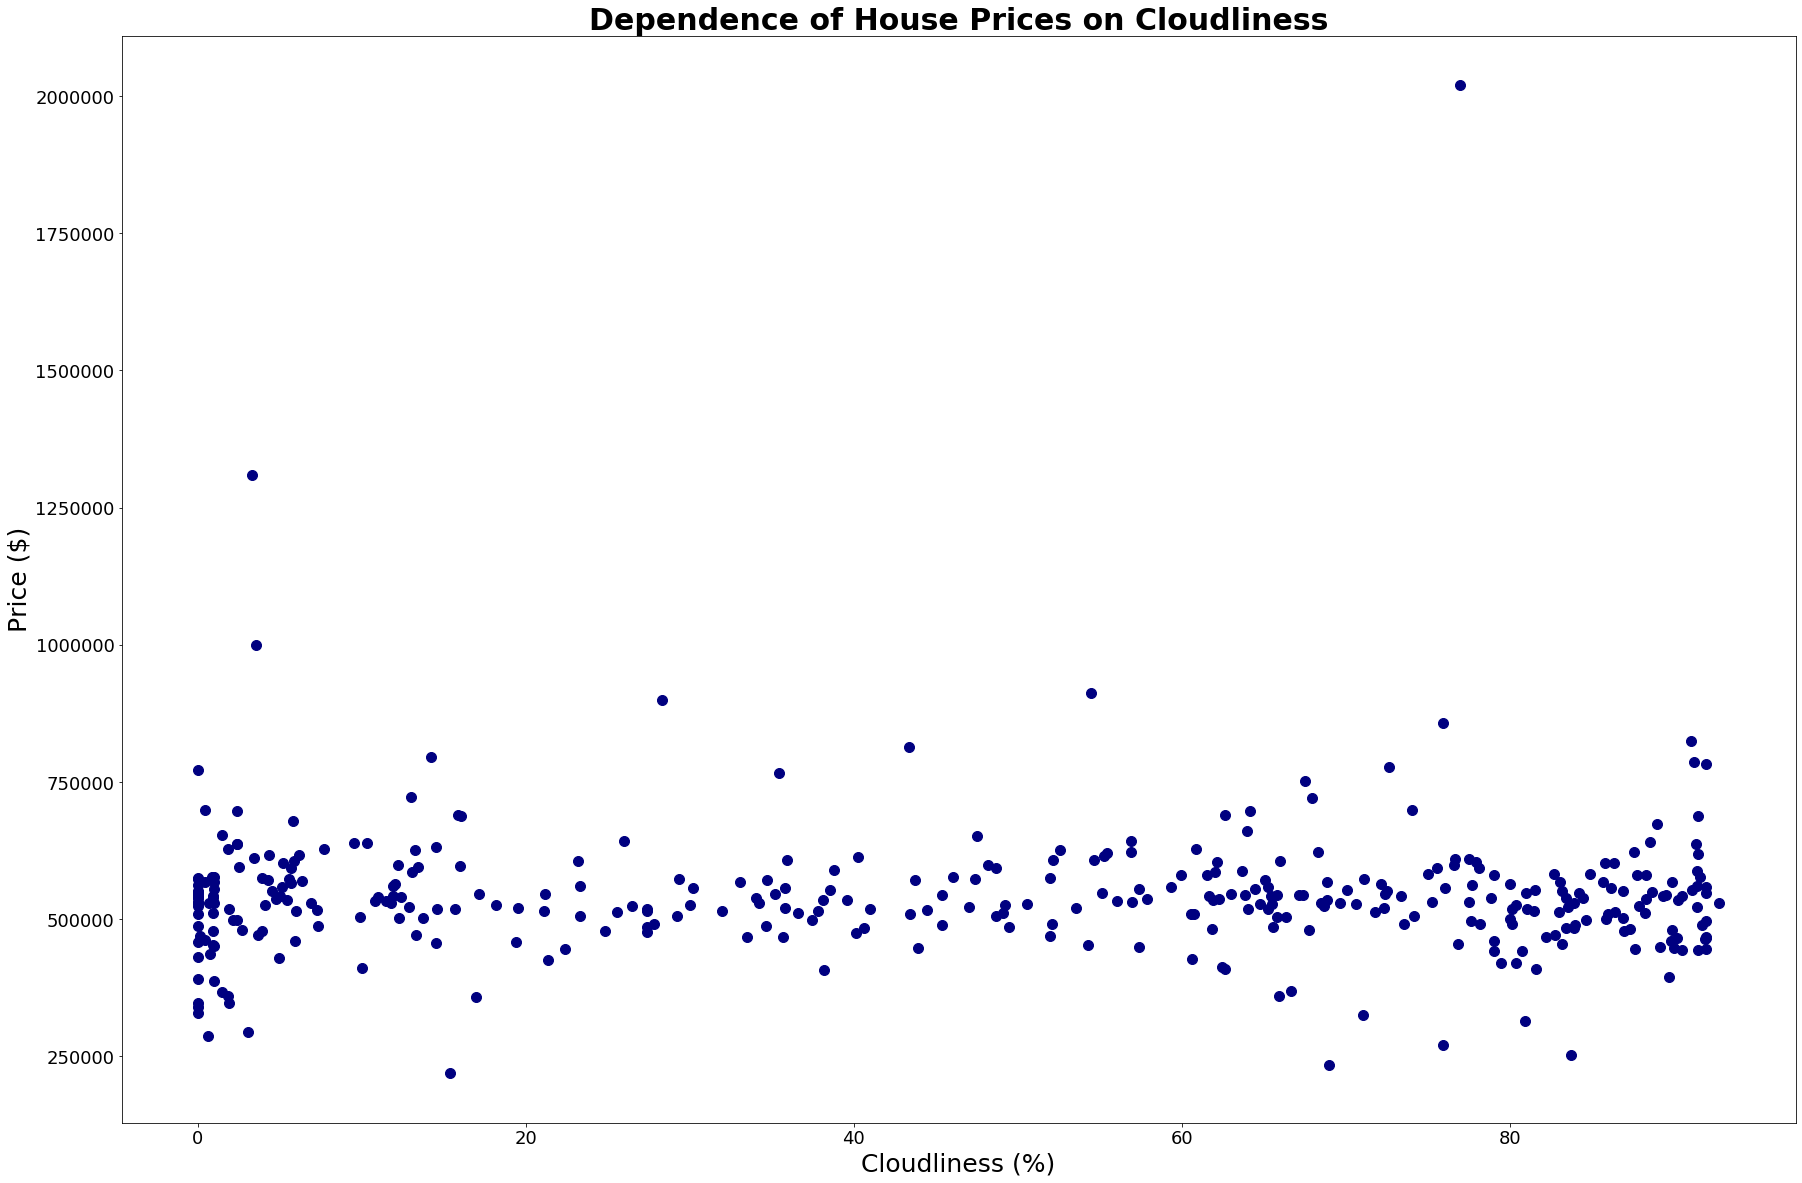

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [41]:
mergedtable.plot(x='Cloudliness', y='price', kind='scatter', color='navy', s=100)
x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cloudlinessvshouseprices.png')


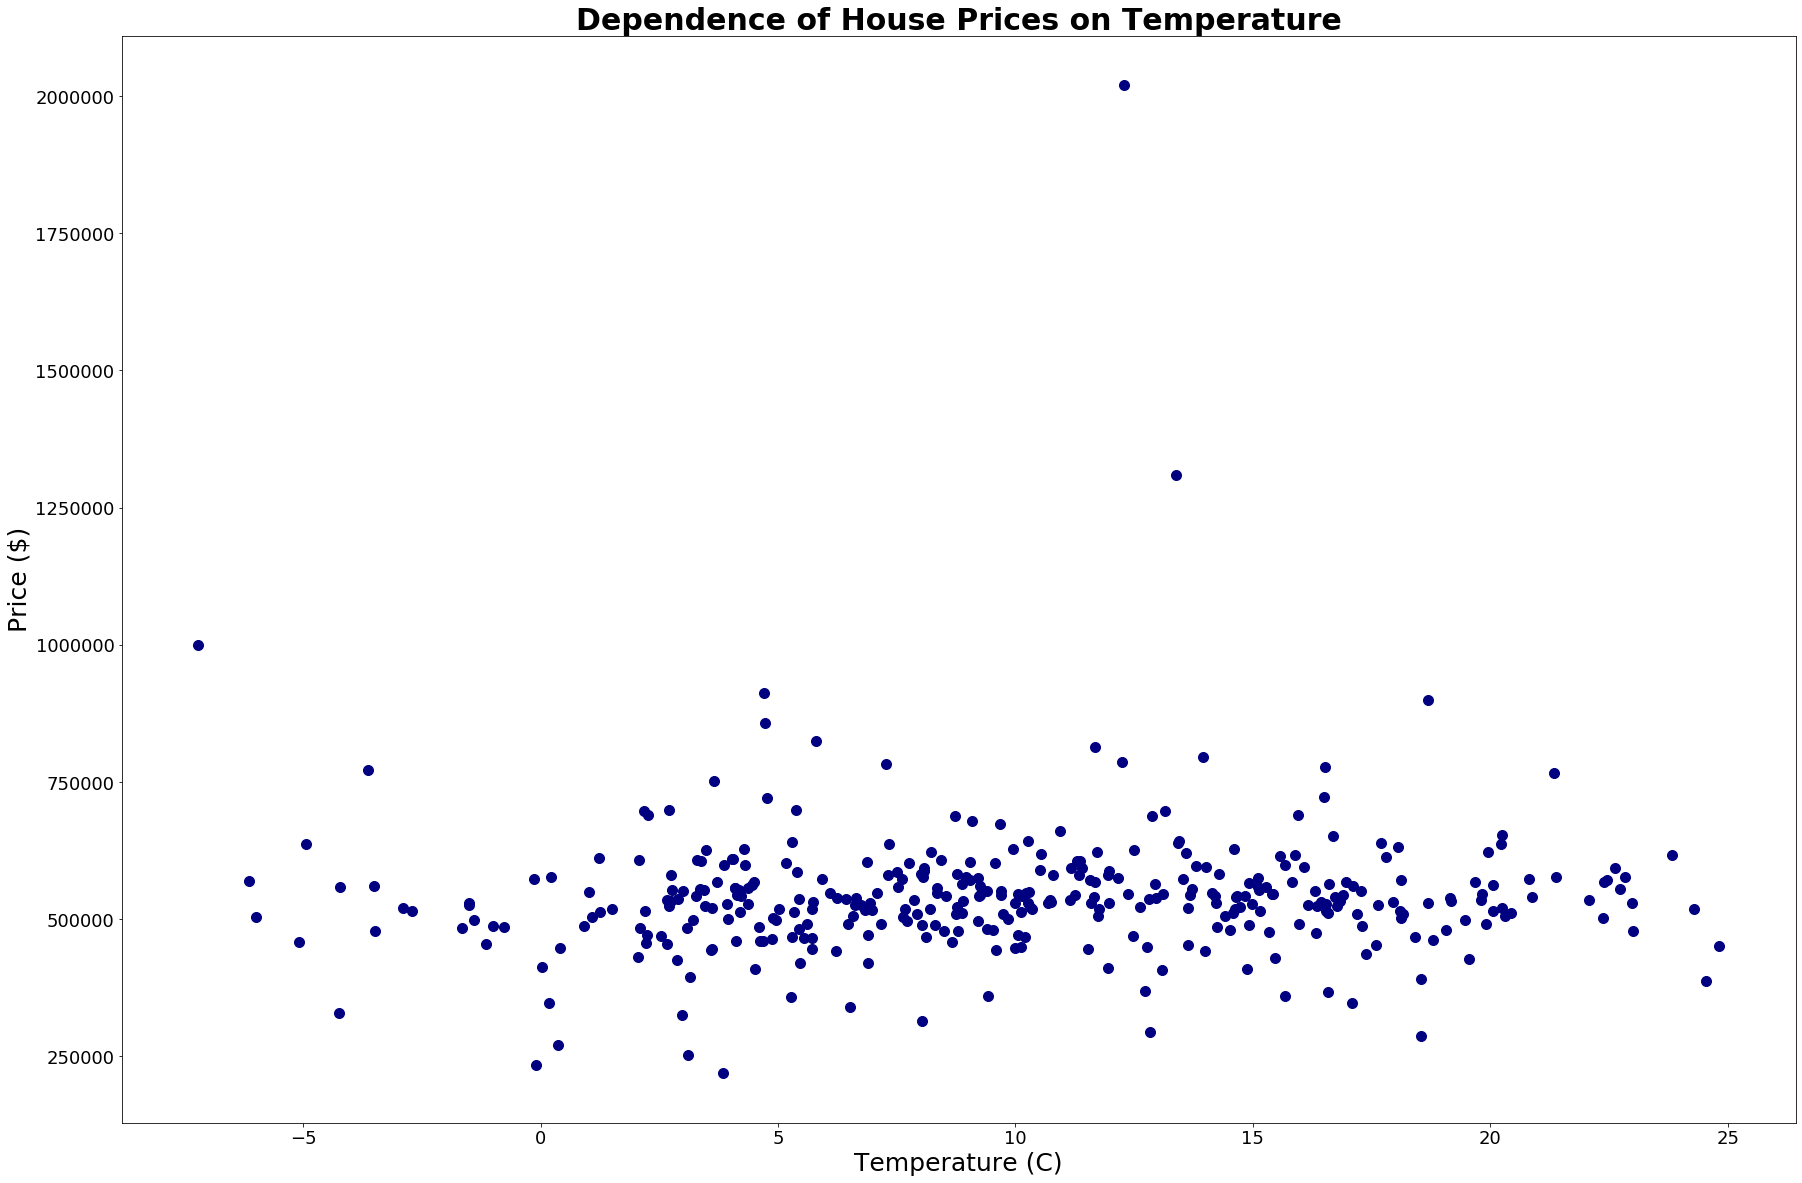

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [42]:
mergedtable.plot(x='Temperature (C)', y='price', kind='scatter', color='navy', s=100)

x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshouseprices.png')


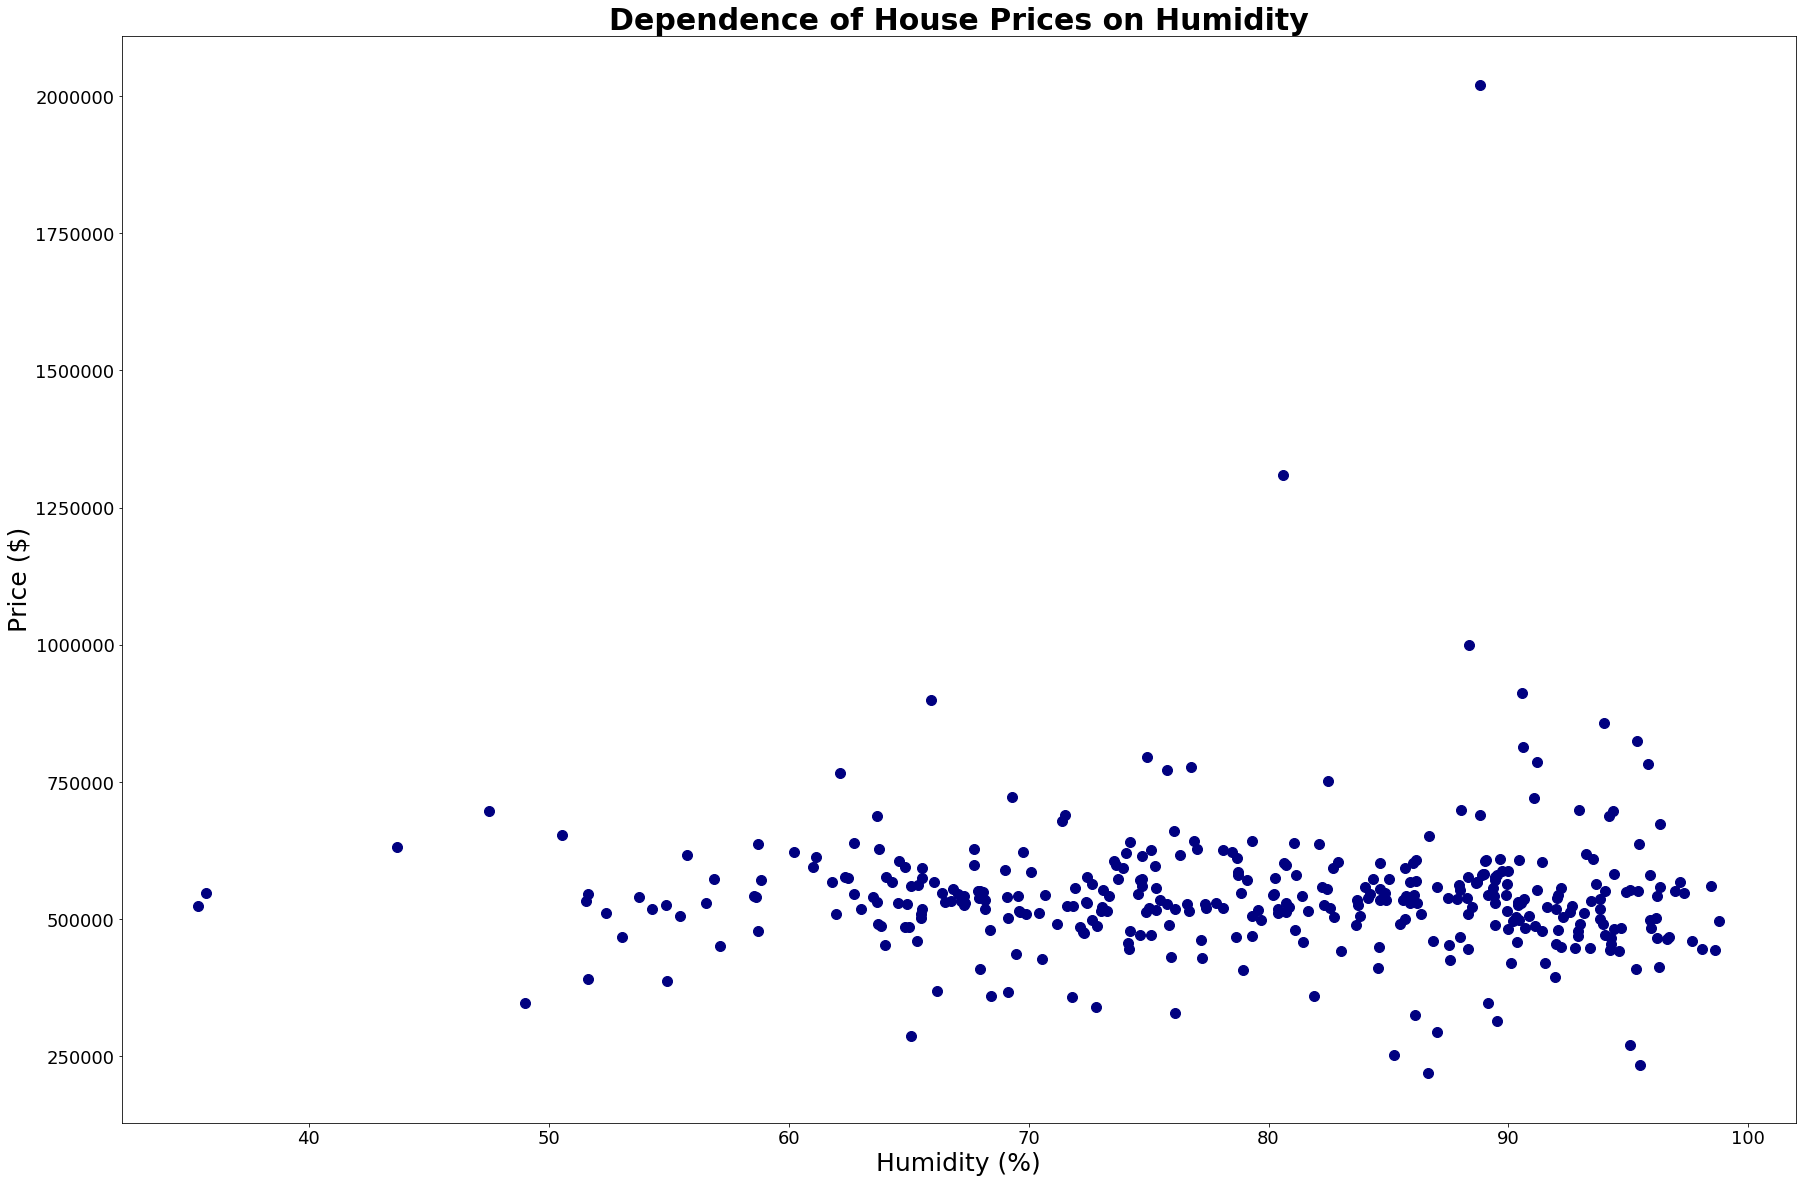

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [43]:
mergedtable.plot(x='Humidity', y='price', kind='scatter', color='navy', s=100)

x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshouseprices.png')


In [44]:
housesalescount = df.groupby('date').count()
housesalescount

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  sqft_basement  yr_built  \
date                                     ...                            
2014-05-02          67    67         67  ...             67        67   
2014-05-03           4     4          4  ...              4         4   
2014-05-04           5     5          5  ...              5         5   
2014-05-05          84    84         84  ...             84        84   
2014-05-06          83    83         83  ...             83        83   
...                ...   ...        ...  ...            ...       ...   
2015-05-13          31    31         31  ...             31        31   
2015-05-14          11    11         11  ...             11        11   
2015-05-15           1     1          1  ...              1         1   
2015-05-24           1     1          1  ...              1         1   
2015-05-27           1     1          1  ...              1         1   

            yr_renovated  zipcode  lat  long  sqft_living15  sqft_lot15  \
date                                                                      
2014-05-02            67       67   67    67             67          67   
2014-05-03             4        4    4     4              4           4   
2014-05-04             5        5    5     5              5           5   
2014-05-05            84       84   84    84             84          84   
2014-05-06            83       83   83    83             83          83   
...                  ...      ...  ...   ...            ...         ...   
2015-05-13            31       31   31    31             31          31   
2015-05-14            11       11   11    11             11          11   
2015-05-15             1        1    1     1              1           1   
2015-05-24             1        1    1     1              1           1   
2015-05-27             1        1    1     1              1           1   

            date(Y/M)  date(Y)  
date                            
2014-05-02         67       67  
2014-05-03          4        4  
2014-05-04          5        5  
2014-05-05         84       84  
2014-05-06         83       83  
...               ...      ...  
2015-05-13         31       31  
2015-05-14         11       11  
2015-05-15          1        1  
2015-05-24          1        1  
2015-05-27          1        1  

[372 rows x 22 columns]

In [45]:
merged2= pd. merge(housesalescount, weatherbydateymd, on="date", how="inner" )
merged2

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  lat  long  sqft_living15  \
date                                     ...                             
2014-05-02          67    67         67  ...   67    67             67   
2014-05-03           4     4          4  ...    4     4              4   
2014-05-04           5     5          5  ...    5     5              5   
2014-05-05          84    84         84  ...   84    84             84   
2014-05-06          83    83         83  ...   83    83             83   
...                ...   ...        ...  ...  ...   ...            ...   
2015-05-13          31    31         31  ...   31    31             31   
2015-05-14          11    11         11  ...   11    11             11   
2015-05-15           1     1          1  ...    1     1              1   
2015-05-24           1     1          1  ...    1     1              1   
2015-05-27           1     1          1  ...    1     1              1   

            sqft_lot15  date(Y/M)  date(Y)  Temperature (C)   Humidity  \
date                                                                     
2014-05-02          67         67       67        16.163522  54.875000   
2014-05-03           4          4        4        10.194961  78.625000   
2014-05-04           5          5        5         8.960943  89.458333   
2014-05-05          84         84       84        10.799583  89.541667   
2014-05-06          83         83       83        11.157323  83.708333   
...                ...        ...      ...              ...        ...   
2015-05-13          31         31       31         8.864440  93.166667   
2015-05-14          11         11       11         9.033814  91.416667   
2015-05-15           1          1        1        10.121395  84.625000   
2015-05-24           1          1        1        11.517940  88.333333   
2015-05-27           1          1        1        13.384792  80.583333   

            Cloudliness  Wind Speed  
date                                 
2014-05-02    18.208333    0.708333  
2014-05-03    82.208333    1.000000  
2014-05-04    91.625000    0.958333  
2014-05-05    88.333333    1.666667  
2014-05-06    38.125000    1.166667  
...                 ...         ...  
2015-05-13    88.250000    0.833333  
2015-05-14    77.958333    0.375000  
2015-05-15    57.375000    0.375000  
2015-05-24    87.666667    0.708333  
2015-05-27     3.291667    0.416667  

[372 rows x 26 columns]

In [46]:
salescountvsweatherdf = merged2[["id", "Temperature (C)", "Humidity", "Cloudliness", "Wind Speed"]]
salescountvsweatherdf=salescountvsweatherdf.rename(columns={"id" : "Average Number of Houses Sold"})
salescountvsweatherdf

Average Number of Houses Sold  Temperature (C)   Humidity  \
date                                                                    
2014-05-02                             67        16.163522  54.875000   
2014-05-03                              4        10.194961  78.625000   
2014-05-04                              5         8.960943  89.458333   
2014-05-05                             84        10.799583  89.541667   
2014-05-06                             83        11.157323  83.708333   
...                                   ...              ...        ...   
2015-05-13                             31         8.864440  93.166667   
2015-05-14                             11         9.033814  91.416667   
2015-05-15                              1        10.121395  84.625000   
2015-05-24                              1        11.517940  88.333333   
2015-05-27                              1        13.384792  80.583333   

            Cloudliness  Wind Speed  
date                                 
2014-05-02    18.208333    0.708333  
2014-05-03    82.208333    1.000000  
2014-05-04    91.625000    0.958333  
2014-05-05    88.333333    1.666667  
2014-05-06    38.125000    1.166667  
...                 ...         ...  
2015-05-13    88.250000    0.833333  
2015-05-14    77.958333    0.375000  
2015-05-15    57.375000    0.375000  
2015-05-24    87.666667    0.708333  
2015-05-27     3.291667    0.416667  

[372 rows x 5 columns]

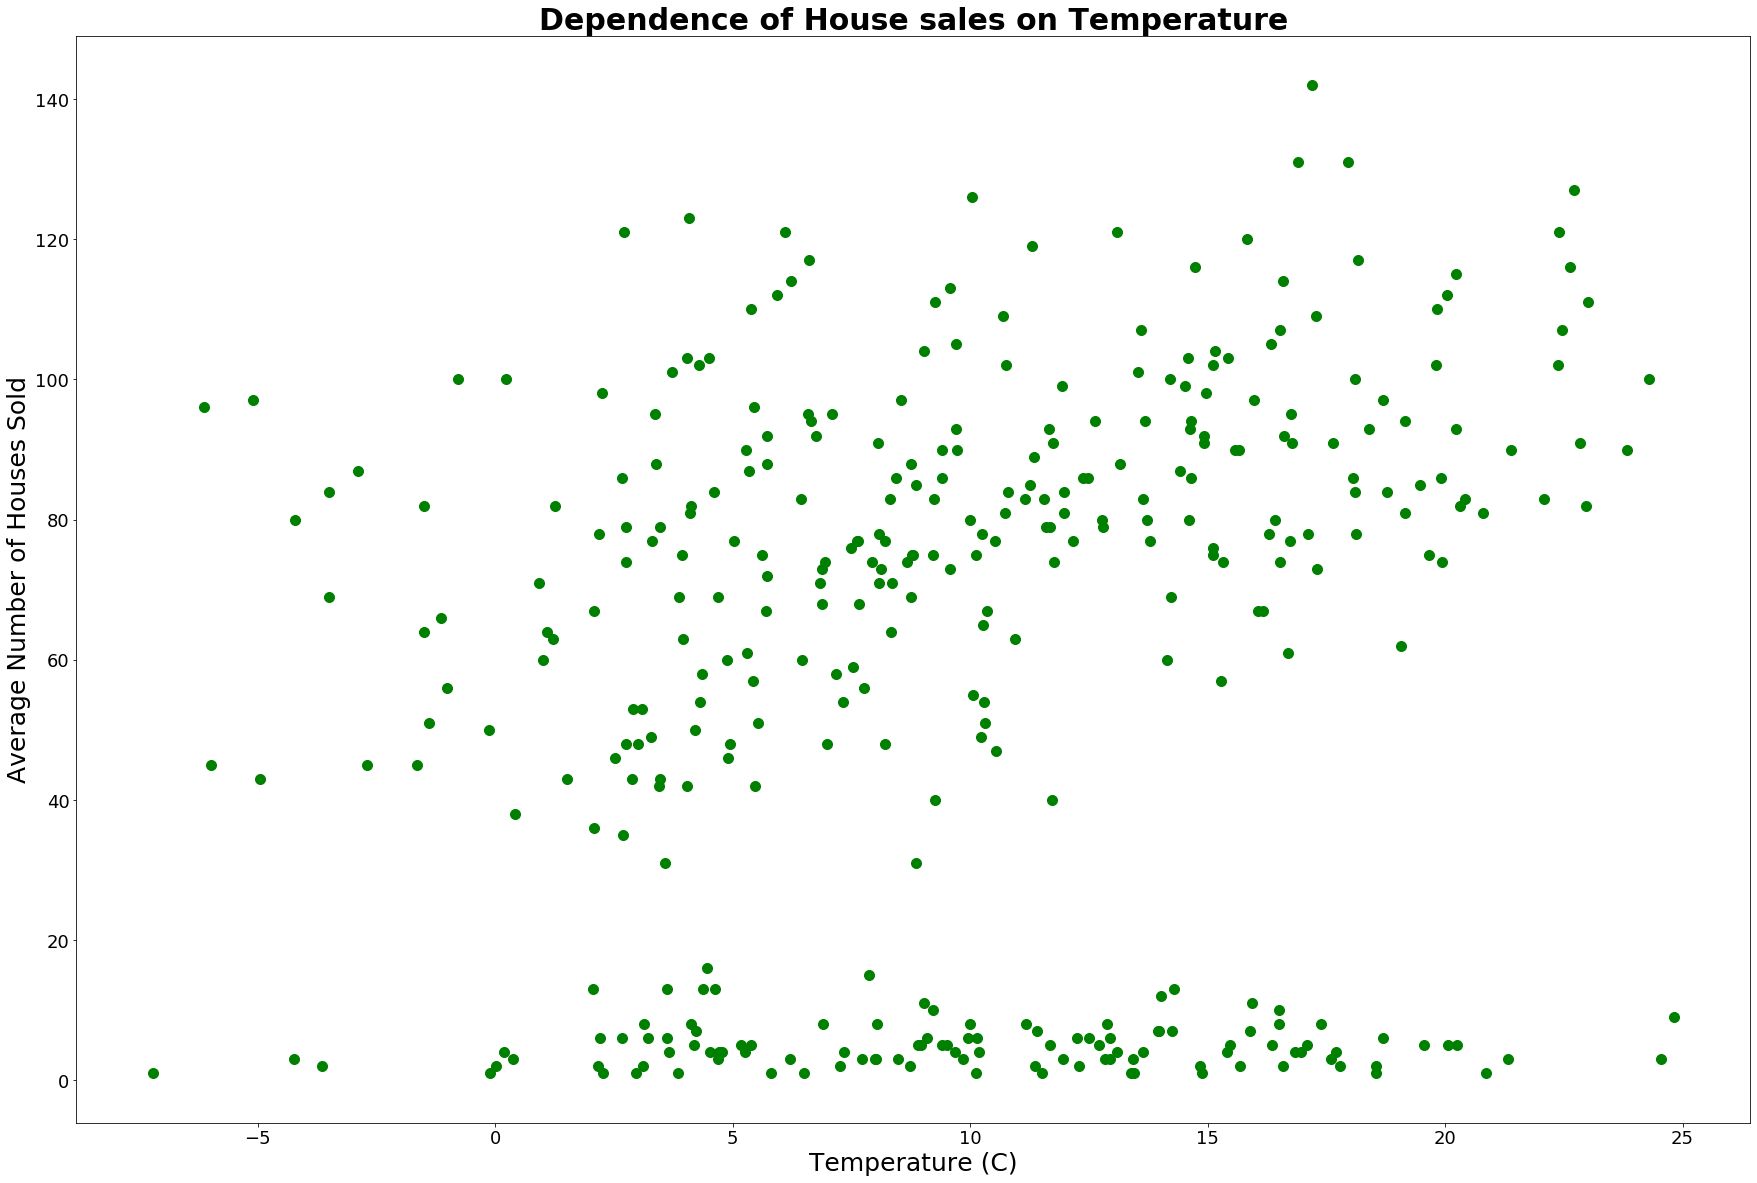

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [47]:
salescountvsweatherdf.plot(kind='scatter', x='Temperature (C)', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


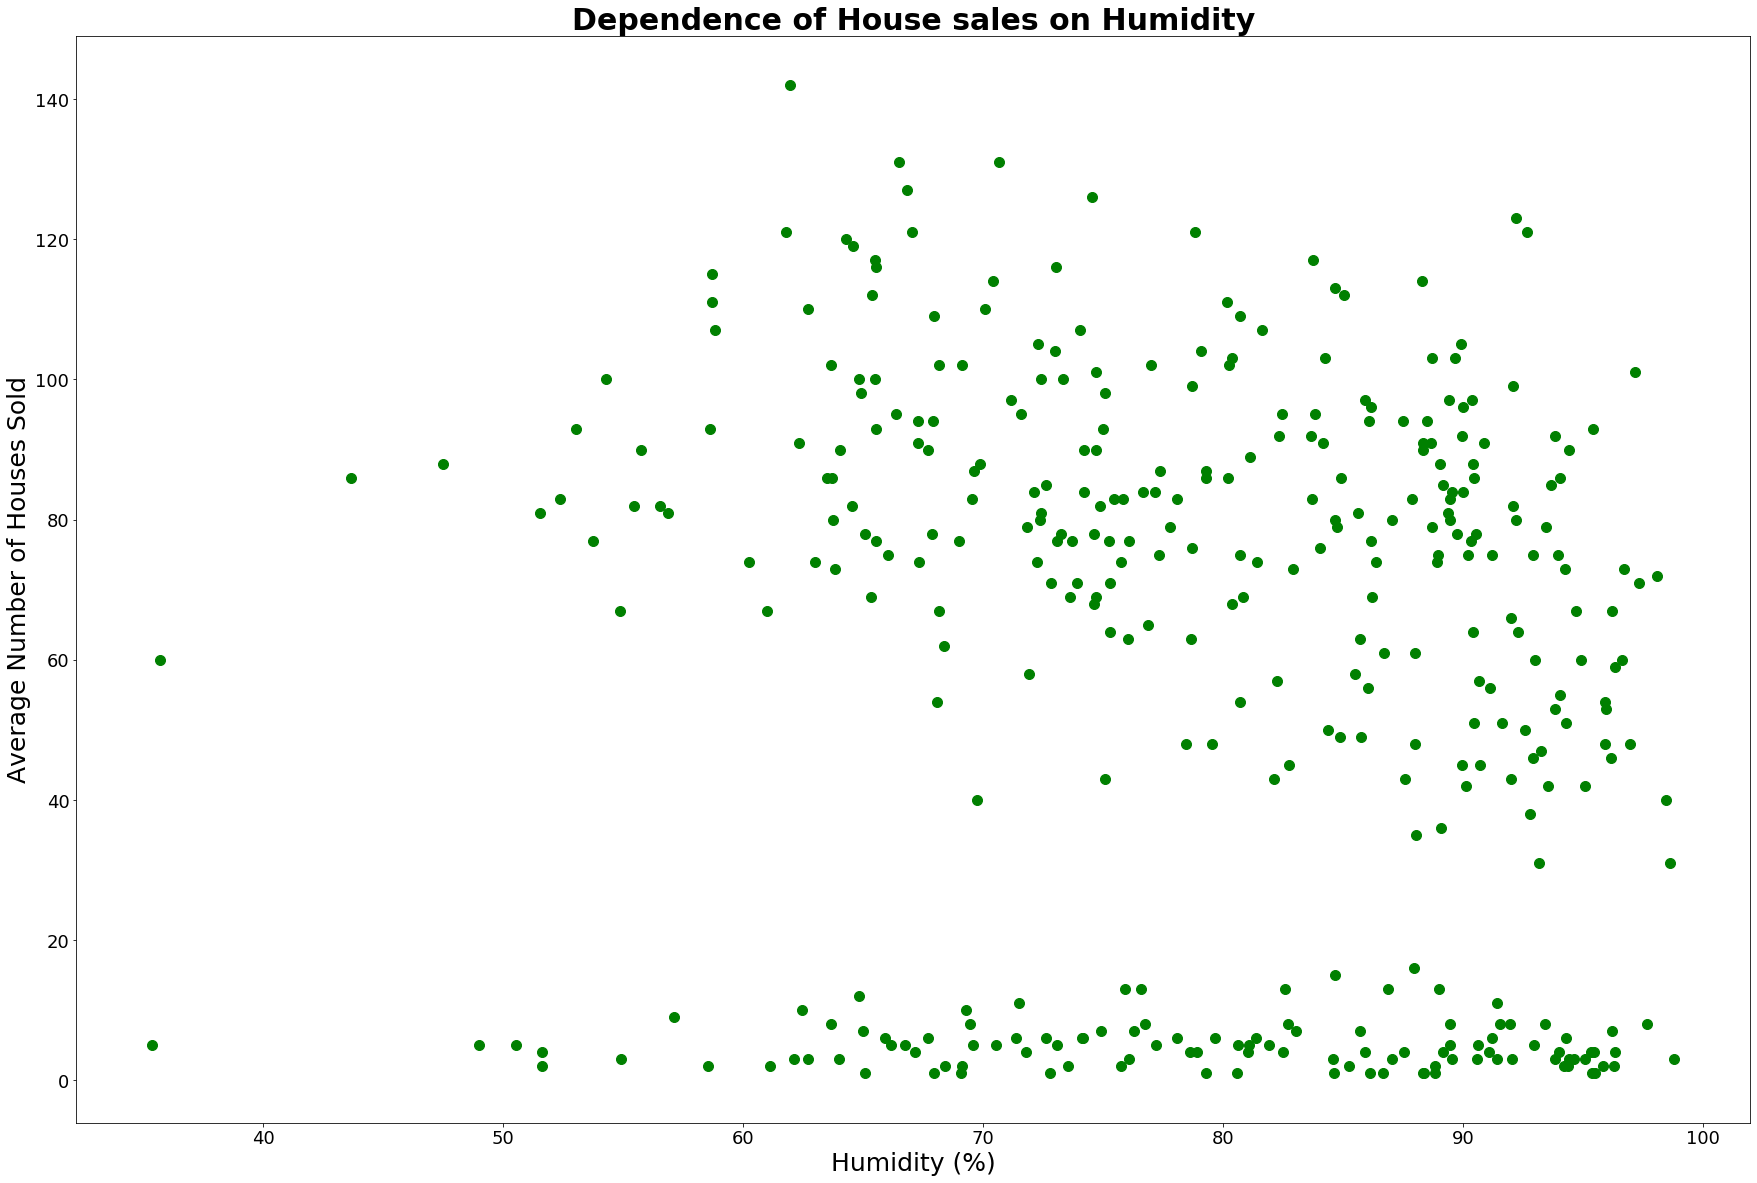

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [48]:
salescountvsweatherdf.plot(kind='scatter', x='Humidity', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


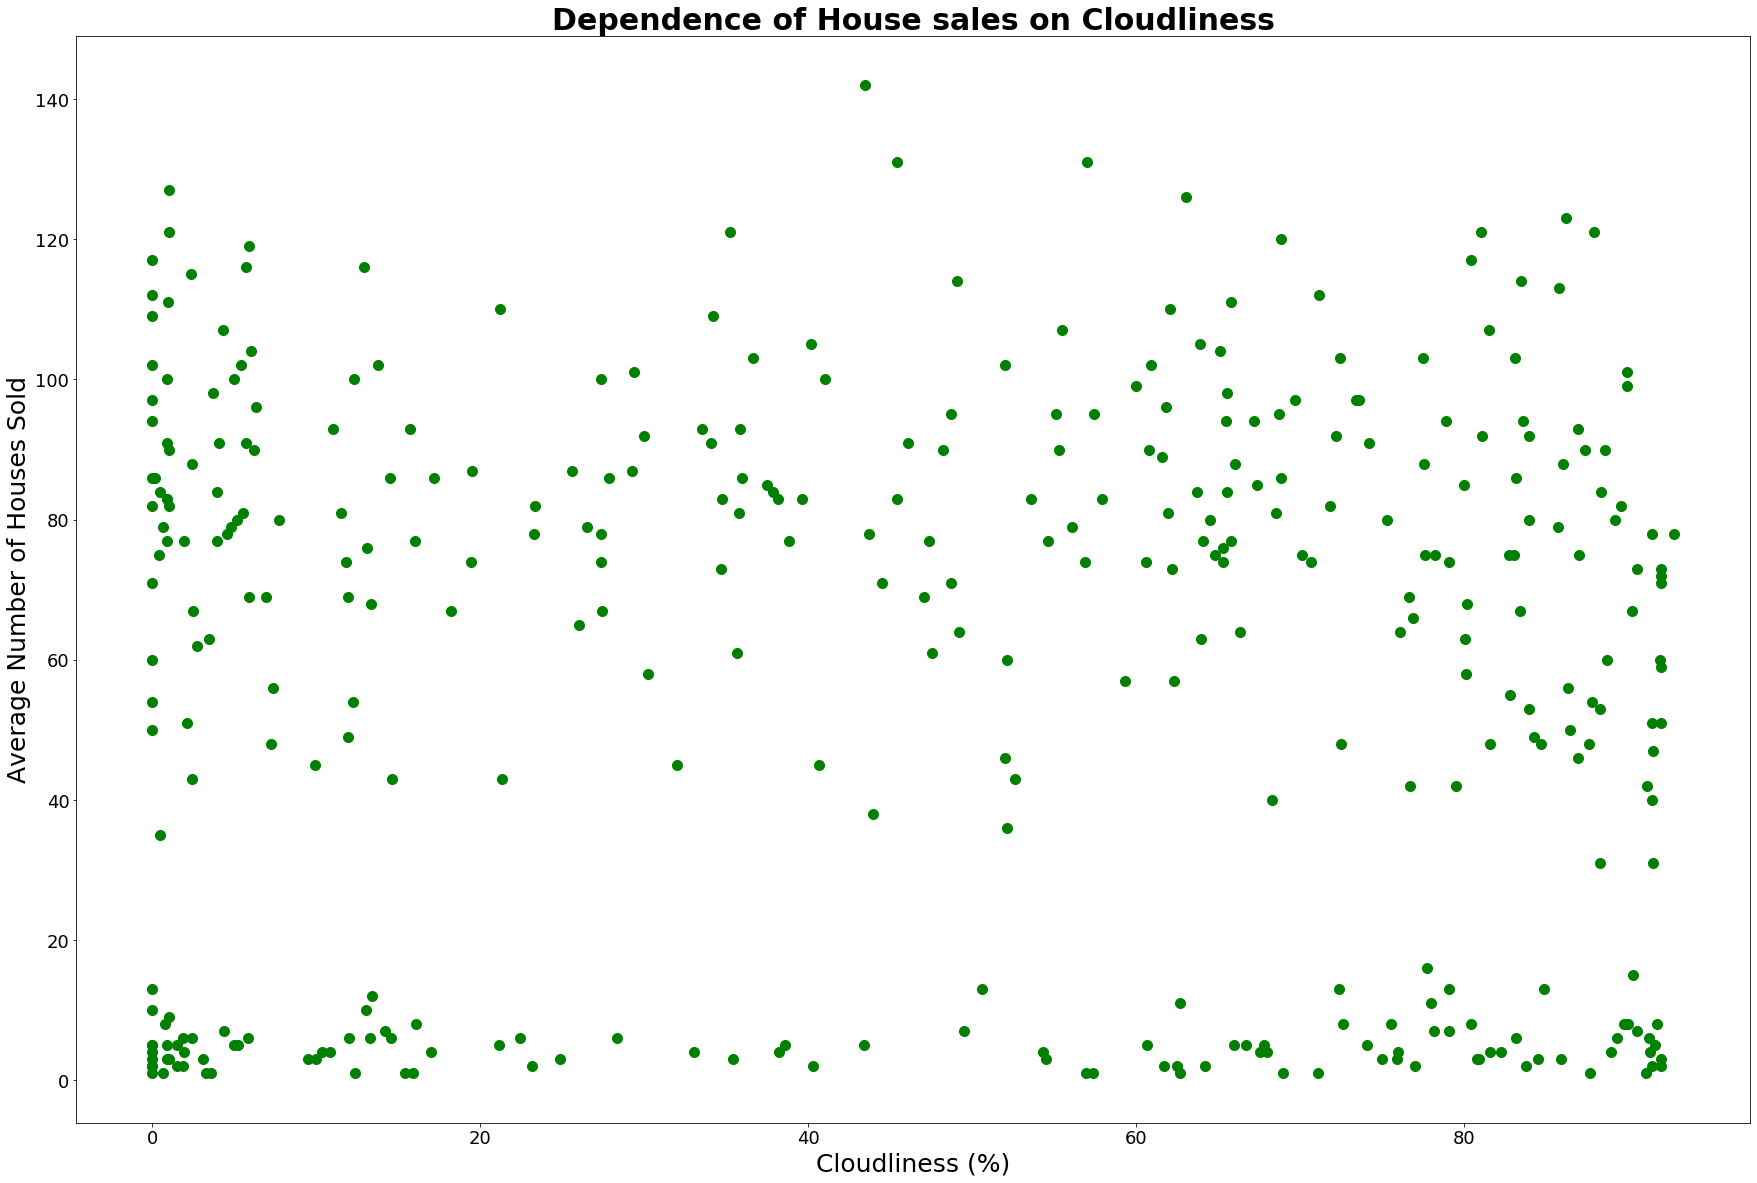

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [49]:
salescountvsweatherdf.plot(kind='scatter', x='Cloudliness', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')

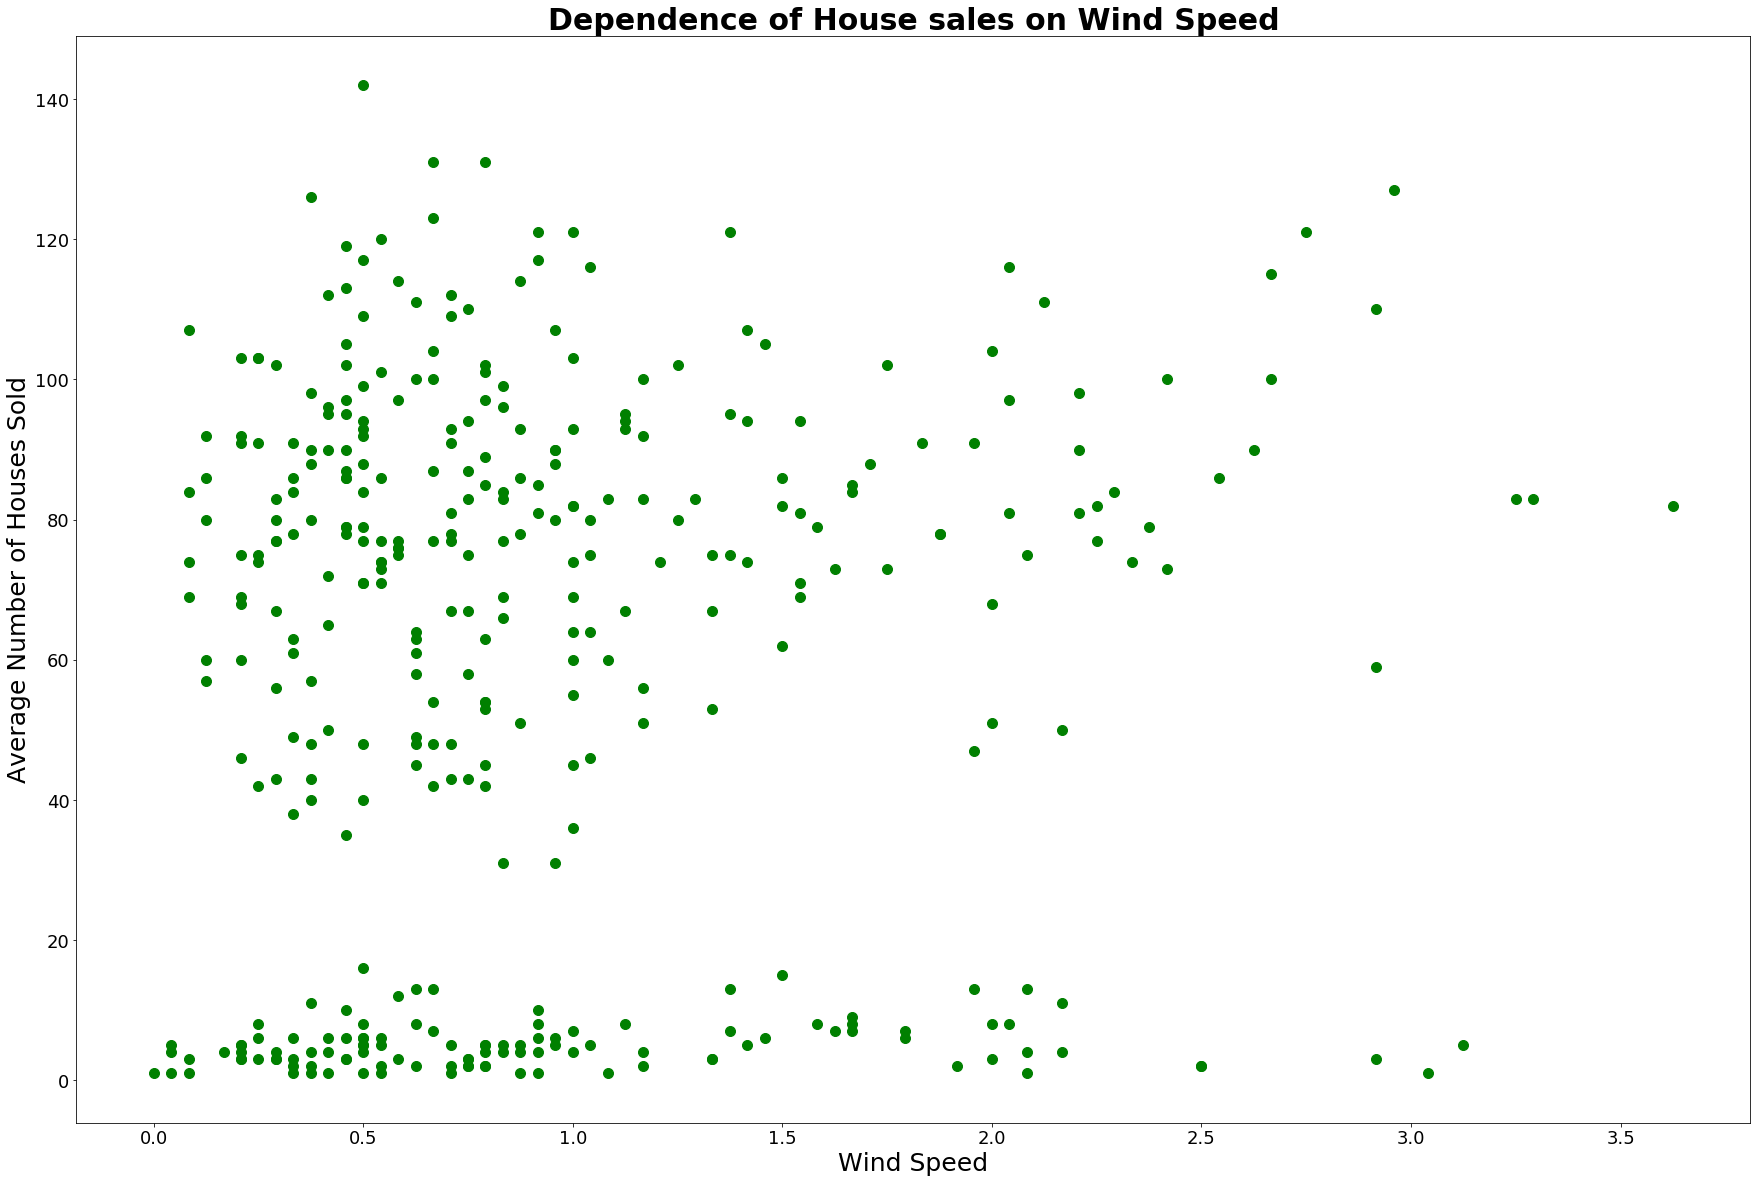

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [50]:
salescountvsweatherdf.plot(kind='scatter', x='Wind Speed', y='Average Number of Houses Sold', color='green', s=100)

x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Wind Speed", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Wind Speed", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('windspeedvshousesales.png')

In [51]:
salescountbymonth = df.groupby('date(Y/M)').count()
salescountbymonth = salescountbymonth[['id']]
salescountbymonth = salescountbymonth.rename(columns={'id':'Average Number of the Houses Sold'})
salescountbymonth

Average Number of the Houses Sold
date(Y/M)                                   
2014-05                                 1768
2014-06                                 2180
2014-07                                 2211
2014-08                                 1940
2014-09                                 1774
2014-10                                 1878
2014-11                                 1411
2014-12                                 1471
2015-01                                  978
2015-02                                 1250
2015-03                                 1875
2015-04                                 2231
2015-05                                  646

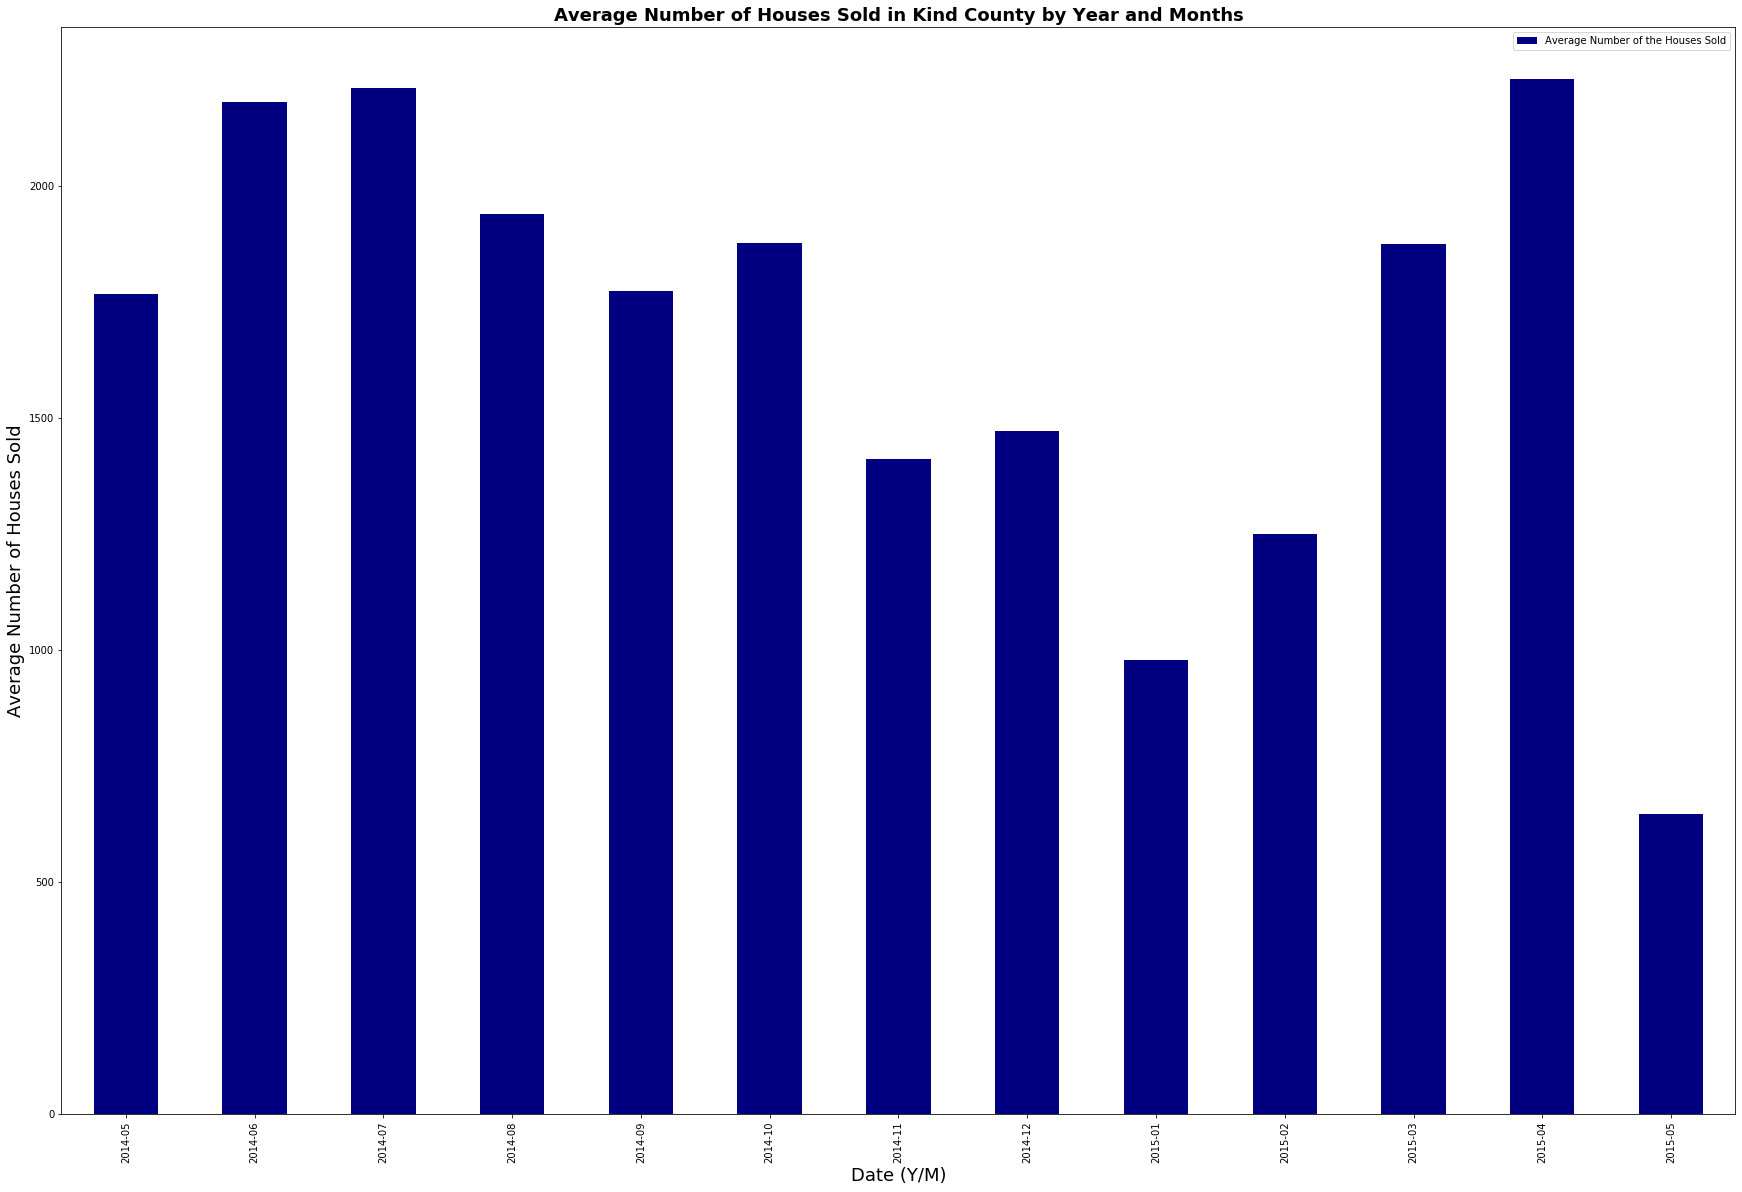

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [52]:
salescountbymonth.plot(kind='bar', y='Average Number of the Houses Sold', color='navy')

x_lim = len(salescountbymonth.index)
# Chart title
plt.title("Average Number of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housessoldbyyearandmonth.png')

In [53]:
averagehousepricebyyearandmonth = df.groupby('date(Y/M)').mean()
averagehousepricebyyearandmonth=averagehousepricebyyearandmonth[['price']]
averagehousepricebyyearandmonth

price
date(Y/M)               
2014-05    548166.600113
2014-06    558123.736239
2014-07    544892.161013
2014-08    536527.039691
2014-09    529315.868095
2014-10    539127.477636
2014-11    522058.861800
2014-12    524602.893270
2015-01    525963.251534
2015-02    507919.603200
2015-03    544057.683200
2015-04    561933.463021
2015-05    558193.095975

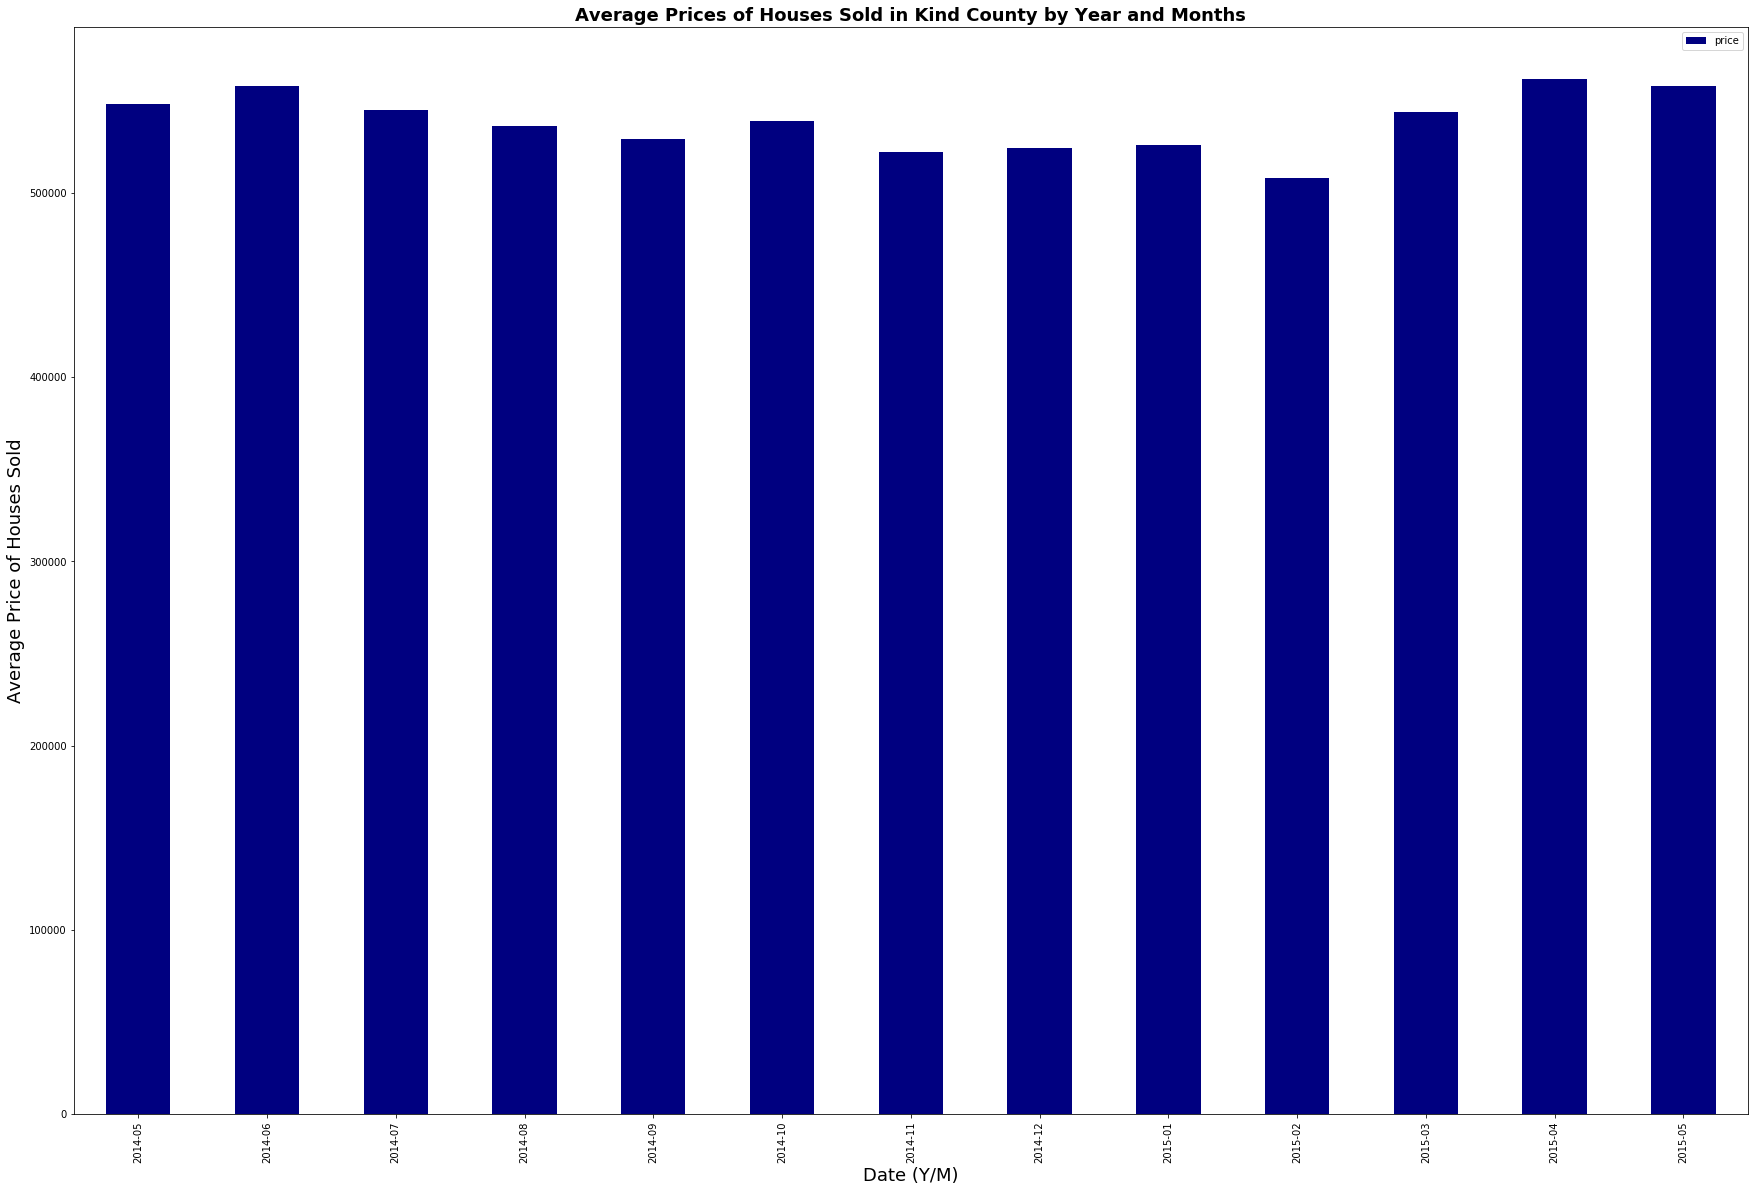

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [54]:
averagehousepricebyyearandmonth.plot(kind='bar', y='price', color='navy')

x_lim = len(averagehousepricebyyearandmonth.index)
# Chart title
plt.title("Average Prices of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Price of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesbyyearandmonth.png')

In [55]:
weatherdata.groupby('date(Y/M)').mean()

Temperature (C)   Humidity  Cloudliness  Wind Speed
date(Y/M)                                                     
2013-01           2.541290  76.581989    64.669355    1.198925
2013-02           6.016165  75.611607    76.558036    1.697917
2013-03           7.138878  66.061828    60.897849    1.041667
2013-04           9.459154  69.781944    58.947222    1.879167
2013-05          13.585724  52.876344    42.327957    1.248656
2013-06          16.259861  60.609722    49.747222    0.800000
2013-07          18.301708  57.524194     8.356183    0.666667
2013-08          17.912518  63.607527    39.805108    0.681452
2013-09          15.300842  80.112500    50.676389    1.115278
2013-10           8.487598  85.764785    35.830645    0.704301
2013-11           7.751019  77.690278    18.868056    1.052778
2013-12           2.949882  79.697581     7.888441    1.271505
2014-01           5.504302  86.306040    15.046980    1.448322
2014-02          -0.145985  83.986607    60.784226    1.186012
2014-03           4.549942  86.451613    65.055108    0.923387
2014-04           6.840869  78.173611    54.548611    0.770833
2014-05          13.414395  71.299731    46.129032    1.259409
2014-06          14.327004  73.752778    45.356944    1.083333
2014-07          19.891122  66.193767    23.678862    2.107046
2014-08          18.026412  72.879032    26.202957    0.750000
2014-09          14.508711  72.355556    34.181944    0.504167
2014-10          10.578193  86.837366    59.088710    0.647849
2014-11           3.356622  86.575000    55.147222    1.251389
2014-12           1.950354  89.362903    62.224462    1.044355
2015-01           2.992706  91.057718    51.088591    0.708725
2015-02           5.200498  86.285714    58.593750    0.668155
2015-03           6.285907  81.182796    52.931452    0.677419
2015-04           6.213240  78.016667    51.750000    0.695833
2015-05          12.044640  76.911290    40.752688    0.543011
2015-06          16.995892  59.127778    23.130556    0.912500
2015-07          20.634321  58.559140    29.389785    2.010753
2015-08          19.417782  62.408602    29.674731    2.073925
2015-09          14.832857  73.697222    45.833333    1.758333
2015-10          12.505920  85.044355    53.069892    1.466398
2015-11           5.656833  87.933333    58.822222    1.594444
2015-12           5.180198  89.267473    73.112903    2.182796
2016-01           3.830000  56.000000     1.000000    0.000000

In [56]:
weatherdata

date  Temperature (C)  Humidity  Cloudliness Weather Condition  \
0      2013-01-01            2.470        93            1             Clear   
1      2013-01-01            2.460        93            1             Clear   
2      2013-01-01            1.080        93           20            Clouds   
3      2013-01-01            0.800         0            1              Mist   
4      2013-01-01            0.400         0           75              Mist   
...           ...              ...       ...          ...               ...   
26272  2015-12-31            2.350        74            1              Rain   
26273  2015-12-31            4.050        41            1             Clear   
26274  2015-12-31            4.375        44            1             Clear   
26275  2015-12-31            4.700        48            1             Clear   
26276  2016-01-01            3.830        56            1             Clear   

       Wind Speed date(Y/M)  
0               1   2013-01  
1               0   2013-01  
2               0   2013-01  
3               0   2013-01  
4               0   2013-01  
...           ...       ...  
26272           1   2015-12  
26273           2   2015-12  
26274           1   2015-12  
26275           0   2015-12  
26276           0   2016-01  

[26277 rows x 7 columns]

In [57]:
housesalebyymcountzc=df.groupby(['zipcode', 'date(Y/M)']).count()
housesalebyymcountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  \
zipcode date(Y/M)                                                      
98039   2015-05     1     1      1         1          1            1   
98148   2015-01     1     1      1         1          1            1   
98109   2015-05     2     2      2         2          2            2   
98014   2015-05     2     2      2         2          2            2   
98024   2014-12     2     2      2         2          2            2   
...                ..   ...    ...       ...        ...          ...   
98034   2014-07    64    64     64        64         64           64   
98103   2014-06    65    65     65        65         65           65   
        2014-10    66    66     66        66         66           66   
        2014-07    73    73     73        73         73           73   
98052   2014-07    73    73     73        73         73           73   

                   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
zipcode date(Y/M)                                      ...                      
98039   2015-05           1       1           1     1  ...      1           1   
98148   2015-01           1       1           1     1  ...      1           1   
98109   2015-05           2       2           2     2  ...      2           2   
98014   2015-05           2       2           2     2  ...      2           2   
98024   2014-12           2       2           2     2  ...      2           2   
...                     ...     ...         ...   ...  ...    ...         ...   
98034   2014-07          64      64          64    64  ...     64          64   
98103   2014-06          65      65          65    65  ...     65          65   
        2014-10          66      66          66    66  ...     66          66   
        2014-07          73      73          73    73  ...     73          73   
98052   2014-07          73      73          73    73  ...     73          73   

                   sqft_basement  yr_built  yr_renovated  lat  long  \
zipcode date(Y/M)                                                     
98039   2015-05                1         1             1    1     1   
98148   2015-01                1         1             1    1     1   
98109   2015-05                2         2             2    2     2   
98014   2015-05                2         2             2    2     2   
98024   2014-12                2         2             2    2     2   
...                          ...       ...           ...  ...   ...   
98034   2014-07               64        64            64   64    64   
98103   2014-06               65        65            65   65    65   
        2014-10               66        66            66   66    66   
        2014-07               73        73            73   73    73   
98052   2014-07               73        73            73   73    73   

                   sqft_living15  sqft_lot15  date(Y)  
zipcode date(Y/M)                                      
98039   2015-05                1           1        1  
98148   2015-01                1           1        1  
98109   2015-05                2           2        2  
98014   2015-05                2           2        2  
98024   2014-12                2           2        2  
...                          ...         ...      ...  
98034   2014-07               64          64       64  
98103   2014-06               65          65       65  
        2014-10               66          66       66  
        2014-07               73          73       73  
98052   2014-07               73          73       73  

[904 rows x 21 columns]

In [58]:
housesalebyycountzc=df.groupby(['zipcode']).count()
housesalebyycountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode                                                                         
98039     50    50     50        50         50           50        50      50   
98148     57    57     57        57         57           57        57      57   
98024     81    81     81        81         81           81        81      81   
98010    100   100    100       100        100          100       100     100   
98102    105   105    105       105        105          105       105     105   
...      ...   ...    ...       ...        ...          ...       ...     ...   
98117    553   553    553       553        553          553       553     553   
98052    574   574    574       574        574          574       574     574   
98115    583   583    583       583        583          583       583     583   
98038    590   590    590       590        590          590       590     590   
98103    602   602    602       602        602          602       602     602   

         waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
zipcode                    ...                                        
98039            50    50  ...          50             50        50   
98148            57    57  ...          57             57        57   
98024            81    81  ...          81             81        81   
98010           100   100  ...         100            100       100   
98102           105   105  ...         105            105       105   
...             ...   ...  ...         ...            ...       ...   
98117           553   553  ...         553            553       553   
98052           574   574  ...         574            574       574   
98115           583   583  ...         583            583       583   
98038           590   590  ...         590            590       590   
98103           602   602  ...         602            602       602   

         yr_renovated  lat  long  sqft_living15  sqft_lot15  date(Y/M)  \
zipcode                                                                  
98039              50   50    50             50          50         50   
98148              57   57    57             57          57         57   
98024              81   81    81             81          81         81   
98010             100  100   100            100         100        100   
98102             105  105   105            105         105        105   
...               ...  ...   ...            ...         ...        ...   
98117             553  553   553            553         553        553   
98052             574  574   574            574         574        574   
98115             583  583   583            583         583        583   
98038             590  590   590            590         590        590   
98103             602  602   602            602         602        602   

         date(Y)  
zipcode           
98039         50  
98148         57  
98024         81  
98010        100  
98102        105  
...          ...  
98117        553  
98052        574  
98115        583  
98038        590  
98103        602  

[70 rows x 22 columns]

In [59]:
biasanalysis=mergedtable.dropna()
biasanalysis

Temperature (C)   Humidity  Cloudliness  Wind Speed            id  \
date                                                                            
2014-05-02        16.163522  54.875000    18.208333    0.708333  4.088342e+09   
2014-05-03        10.194961  78.625000    82.208333    1.000000  6.709662e+09   
2014-05-04         8.960943  89.458333    91.625000    0.958333  5.848658e+09   
2014-05-05        10.799583  89.541667    88.333333    1.666667  4.571210e+09   
2014-05-06        11.157323  83.708333    38.125000    1.166667  4.553568e+09   
...                     ...        ...          ...         ...           ...   
2015-05-13         8.864440  93.166667    88.250000    0.833333  4.625505e+09   
2015-05-14         9.033814  91.416667    77.958333    0.375000  6.159145e+09   
2015-05-15        10.121395  84.625000    57.375000    0.375000  7.923600e+09   
2015-05-24        11.517940  88.333333    87.666667    0.708333  5.101401e+09   
2015-05-27        13.384792  80.583333     3.291667    0.416667  9.106000e+09   

                   price  bedrooms  bathrooms  sqft_living      sqft_lot  ...  \
date                                                                      ...   
2014-05-02  5.261918e+05  3.402985   2.138060  2102.835821  15640.477612  ...   
2014-05-03  4.669700e+05  3.000000   1.812500  1620.000000   8901.000000  ...   
2014-05-04  5.766900e+05  3.200000   2.400000  2508.000000   7563.000000  ...   
2014-05-05  5.810577e+05  3.523810   2.193452  2257.845238  17966.309524  ...   
2014-05-06  5.341684e+05  3.493976   2.171687  2102.168675  12127.662651  ...   
...                  ...       ...        ...          ...           ...  ...   
2015-05-13  5.116239e+05  3.193548   2.088710  1922.322581   8165.096774  ...   
2015-05-14  6.038908e+05  3.818182   2.340909  2093.909091   9393.363636  ...   
2015-05-15  4.500000e+05  5.000000   2.000000  1870.000000   7344.000000  ...   
2015-05-24  4.455000e+05  2.000000   1.750000  1390.000000   6670.000000  ...   
2015-05-27  1.310000e+06  4.000000   2.250000  3750.000000   5000.000000  ...   

               grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                          
2014-05-02  7.835821  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  7.000000  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  8.400000  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  7.833333  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  7.650602  1769.638554     332.530120  1969.108434    193.373494   
...              ...          ...            ...          ...           ...   
2015-05-13  7.548387  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  7.909091  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  7.000000  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24  6.000000   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  8.000000  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05

In [60]:
numberofsalesdays=biasanalysis['Humidity'].count()
numberofsalesdays

372

In [61]:
weather=weatherbydateymd.reset_index()
weather

date  Temperature (C)   Humidity  Cloudliness  Wind Speed
0     2013-01-01         0.619583  61.958333    33.416667    0.250000
1     2013-01-02         0.534167  77.500000    12.291667    1.000000
2     2013-01-03         0.463750  54.166667    22.708333    2.291667
3     2013-01-04         1.745833  57.125000     1.000000    1.458333
4     2013-01-05         3.907366  83.333333    84.375000    1.750000
...          ...              ...        ...          ...         ...
1091  2015-12-28         2.579458  94.666667    89.125000    0.875000
1092  2015-12-29         2.798354  95.416667    87.041667    0.750000
1093  2015-12-30         0.159417  92.916667     6.375000    0.333333
1094  2015-12-31        -1.076479  85.333333     0.791667    0.500000
1095  2016-01-01         3.830000  56.000000     1.000000    0.000000

[1096 rows x 5 columns]

In [62]:
mask = (weather['date'] > '2014-05-01') & (weather['date'] <= '2015-05-27')
biasweather=pd.DataFrame(weather.loc[mask])
biasweather

date  Temperature (C)   Humidity  Cloudliness  Wind Speed
486  2014-05-02        16.163522  54.875000    18.208333    0.708333
487  2014-05-03        10.194961  78.625000    82.208333    1.000000
488  2014-05-04         8.960943  89.458333    91.625000    0.958333
489  2014-05-05        10.799583  89.541667    88.333333    1.666667
490  2014-05-06        11.157323  83.708333    38.125000    1.166667
..          ...              ...        ...          ...         ...
872  2015-05-23        12.481082  71.041667    35.708333    0.541667
873  2015-05-24        11.517940  88.333333    87.666667    0.708333
874  2015-05-25        11.540710  87.083333    77.416667    0.750000
875  2015-05-26        12.116251  82.458333    62.125000    0.625000
876  2015-05-27        13.384792  80.583333     3.291667    0.416667

[391 rows x 5 columns]

In [63]:
weatherdatadays= biasweather['Temperature (C)'].count()
weatherdatadays

391

In [64]:
abovezerodays=biasweather.loc[biasweather['Temperature (C)']>=0]
numberofabovezerodays=abovezerodays['Temperature (C)'].count()
numberofabovezerodays

369

In [65]:
abovezerosales=biasanalysis.loc[biasanalysis['Temperature (C)']>=0]
numberofabovezerosales=abovezerosales['price'].count()
numberofabovezerosales

351

In [66]:
belowzerodays=biasweather.loc[biasweather['Temperature (C)']<=0]
numberofbelowzerodays=belowzerodays['Temperature (C)'].count()
numberofbelowzerodays

22

In [67]:
belowzerosales=biasanalysis.loc[biasanalysis['Temperature (C)']<=0]
numberofbelowzerosalesdays=belowzerosales['price'].count()
numberofbelowzerosalesdays

21

In [68]:
abovefiftyhdays=biasweather.loc[biasweather['Humidity']>=50]
abovefiftyhumiditydays=abovezerodays['Humidity'].count()
abovefiftyhumiditydays

369

In [69]:
abovefiftyhsales=biasanalysis.loc[biasanalysis['Humidity']>=50]
abovefiftyhumiditysalesdays=abovefiftyhsales['Humidity'].count()
abovefiftyhumiditysalesdays

367

In [70]:
belowfiftyhdays=biasweather.loc[biasweather['Humidity']<=50]
belowfiftyhumiditydays=belowfiftyhdays['Humidity'].count()
belowfiftyhumiditydays

5

In [71]:
belowfiftyhsales=biasanalysis.loc[biasanalysis['Humidity']<=50]
belowfiftyhumiditysalesdays=belowfiftyhsales['Humidity'].count()
belowfiftyhumiditysalesdays                                  

5

In [72]:
belowthreewdays=biasweather.loc[biasweather['Wind Speed']<=3]
belowthreewinddays=belowthreewdays['Wind Speed'].count()
belowthreewinddays

386

In [73]:
belowthreewsales=biasanalysis.loc[biasanalysis['Wind Speed']<=3]
belowthreewindsalesdays=belowthreewsales['Wind Speed'].count()
belowthreewindsalesdays

367

In [74]:
abovethreewdays=biasweather.loc[biasweather['Wind Speed']>=3]
abovethreewinddays=abovethreewdays['Wind Speed'].count()
abovethreewinddays

5

In [75]:
abovethreewsales=biasanalysis.loc[biasanalysis['Wind Speed']>=3]
abovethreewindsalesdays=abovethreewsales['Wind Speed'].count()
abovethreewindsalesdays

5

In [76]:
Biasanalysistable=pd.DataFrame({'Number of days with weather data':weatherdatadays,
                               'Number of days in which sales has happened':numberofsalesdays,
                               'Number of days with temp above zero': numberofabovezerodays,
                               'Number of days with temp below zero':numberofbelowzerodays,
                               'Number of sales days with temp above zero':numberofabovezerosales,
                               'Number of sales days with temp below zero':numberofbelowzerosalesdays,
                               'Number of days with humidity above fifty':abovefiftyhumiditydays,
                               'Number of days with humidity below fifty':belowfiftyhumiditydays,
                               'Number of sales days with humidity above fifty':abovefiftyhumiditysalesdays,
                               'Number of sales days with humidity below fifty':belowfiftyhumiditysalesdays,
                               'Number of days with wind speed below three':belowthreewinddays,
                               'Number of days with wind speed above three':abovethreewinddays,
                               'Number of sales days with wind speed below three':belowthreewindsalesdays,
                               'Number of sales days with wind speed above three':abovethreewindsalesdays}, index=[0])
Biasanalysistable

Number of days with weather data  \
0                               391   

   Number of days in which sales has happened  \
0                                         372   

   Number of days with temp above zero  Number of days with temp below zero  \
0                                  369                                   22   

   Number of sales days with temp above zero  \
0                                        351   

   Number of sales days with temp below zero  \
0                                         21   

   Number of days with humidity above fifty  \
0                                       369   

   Number of days with humidity below fifty  \
0                                         5   

   Number of sales days with humidity above fifty  \
0                                             367   

   Number of sales days with humidity below fifty  \
0                                               5   

   Number of days with wind speed below three  \
0                                         386   

   Number of days with wind speed above three  \
0                                           5   

   Number of sales days with wind speed below three  \
0                                               367   

   Number of sales days with wind speed above three  
0                                                 5

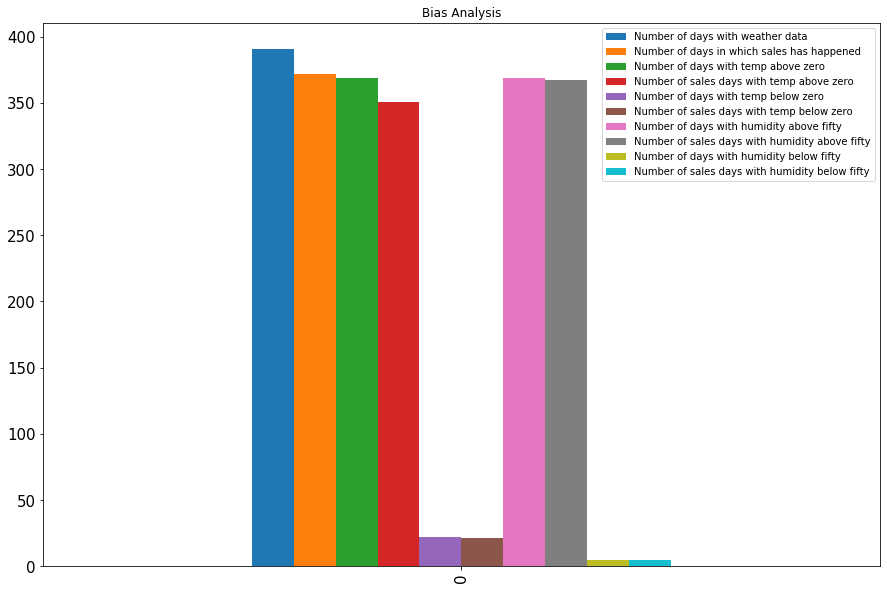

Current size: [30, 20]


<Figure size 2160x1440 with 0 Axes>

In [77]:
ax = Biasanalysistable[['Number of days with weather data','Number of days in which sales has happened',
                        'Number of days with temp above zero', 'Number of sales days with temp above zero',
                       'Number of days with temp below zero', 'Number of sales days with temp below zero',
                       'Number of days with humidity above fifty','Number of sales days with humidity above fifty',
                       'Number of days with humidity below fifty','Number of sales days with humidity below fifty',
                       ]].plot(kind='bar', title ="Bias Analysis", figsize=(15, 10), legend=True, fontsize=15)


plt.show()

print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('biasanalysis.png')

